#### SDK 클론 + 의존성 설치

In [1]:
%cd /content
!git clone https://github.com/ori-mrg/robotcar-dataset-sdk.git

# 기본 패키지
!pip -q install numpy opencv-python matplotlib pandas

/content
Cloning into 'robotcar-dataset-sdk'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 302 (delta 44), reused 38 (delta 38), pack-reused 241 (from 1)
Receiving objects: 100% (302/302), 67.54 MiB | 25.82 MiB/s, done.
Resolving deltas: 100% (119/119), done.


#### 구글 드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 데이터 경로 지정 & 구조 파악
- 압축해제

In [3]:
import os

# 1. 압축 파일 경로 (공백/특수문자 처리를 위해 변수로 지정)
zip_path = "/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/oxford_radar_robotcar_dataset_sample_medium.zip"

# 2. 압축 해제할 경로 (Colab 로컬 환경 추천)
# 예: /content/robotcar_data 폴더에 풀기
extract_path = "/content/robotcar_data"

# 폴더가 없으면 생성
os.makedirs(extract_path, exist_ok=True)

print(f"압축 해제를 시작합니다...\n소스: {zip_path}\n목표: {extract_path}")

# 3. 압축 해제 명령어 실행nㅁ
# -q: 로그 숨김 (Quiet mode, 파일이 많으면 로그가 너무 길어짐)
# -d: 저장할 폴더 지정
!unzip -q "{zip_path}" -d "{extract_path}"

print("압축 해제 완료!")

압축 해제를 시작합니다...
소스: /content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/oxford_radar_robotcar_dataset_sample_medium.zip
목표: /content/robotcar_data
압축 해제 완료!


In [ ]:
import os

# 1. 압축 파일 경로 (공백/특수문자 처리를 위해 변수로 지정)
zip_path = "/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/oxford_radar_robotcar_dataset_sample_large.zip"

# 2. 압축 해제할 경로 (Colab 로컬 환경 추천)
# 예: /content/robotcar_data 폴더에 풀기
extract_path = "/content/robotcar_data"

# 폴더가 없으면 생성
os.makedirs(extract_path, exist_ok=True)

print(f"압축 해제를 시작합니다...\n소스: {zip_path}\n목표: {extract_path}")

# 3. 압축 해제 명령어 실행nㅁ
# -q: 로그 숨김 (Quiet mode, 파일이 많으면 로그가 너무 길어짐)
# -d: 저장할 폴더 지정
!unzip -q "{zip_path}" -d "{extract_path}"

print("압축 해제 완료!")

In [4]:
# DATA_ROOT = "/content/robotcar_data/2019-01-10-14-36-48-radar-oxford-10k-partial"
DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large"

In [5]:
# (A) 최상위만 간단히
!ls -al "{DATA_ROOT}" | head -n 50

# (B) 2~3 depth 정도만 30줄 보기
!find "{DATA_ROOT}" -maxdepth 3 -type d | head -n 30

total 556
-rw------- 1 root root  14340 Jan 13 06:01 .DS_Store
drwx------ 2 root root   4096 Jan 13 11:21 gps
drwx------ 2 root root   4096 Jan 13 11:21 gt
drwx------ 2 root root   4096 Jan 13 11:21 lms_front
-rw------- 1 root root 118693 Aug  2  2019 lms_front.timestamps
drwx------ 2 root root   4096 Jan 13 11:21 lms_rear
-rw------- 1 root root 119168 Aug  2  2019 lms_rear.timestamps
drwx------ 2 root root   4096 Jan 13 11:21 mono_left
-rw------- 1 root root  40565 Aug  2  2019 mono_left.timestamps
drwx------ 2 root root   4096 Jan 13 11:21 mono_rear
-rw------- 1 root root  40565 Aug  2  2019 mono_rear.timestamps
drwx------ 2 root root   4096 Jan 13 11:21 mono_right
-rw------- 1 root root  40565 Aug  2  2019 mono_right.timestamps
drwx------ 2 root root   4096 Jan 13 11:21 radar
-rw------- 1 root root   9538 Aug  2  2019 radar.timestamps
drwx------ 2 root root   4096 Jan 13 11:21 stereo
-rw------- 1 root root  38171 Aug  2  2019 stereo.timestamps
drwx------ 2 root root   4096 Jan 13 11

In [6]:
!find "{DATA_ROOT}" -name "*.timestamps" | head -n 50

/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large/velodyne_right.timestamps
/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large/lms_rear.timestamps
/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large/lms_front.timestamps
/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large/mono_left.timestamps
/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large/mono_rear.timestamps
/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large/vel

#### 공통 유틸 (timestamps)

In [7]:
import os
import numpy as np

def load_timestamps(ts_path):
    ts = []
    with open(ts_path, "r") as f:
        for line in f:
            if not line.strip():
                continue
            ts.append(int(line.split()[0]))
    return np.array(ts, dtype=np.int64)

def nearest_ts(ts_array, t):
    idx = np.searchsorted(ts_array, t)
    if idx == 0:
        return ts_array[0]
    if idx >= len(ts_array):
        return ts_array[-1]
    before, after = ts_array[idx-1], ts_array[idx]
    return before if abs(t - before) <= abs(after - t) else after


#### SDK import

In [8]:
import sys
import os

SDK_ROOT = "/content/robotcar-dataset-sdk/python"

print("SDK exists:", os.path.exists(SDK_ROOT))
print("Files in SDK python dir:", os.listdir(SDK_ROOT))

if SDK_ROOT not in sys.path:
    sys.path.insert(0, SDK_ROOT)

import radar
import velodyne

print("radar module:", radar)
print("velodyne module:", velodyne)

SDK exists: True
Files in SDK python dir: ['transform.py', '.gitignore', 'build_pointcloud.py', 'camera_model.py', 'velodyne.py', 'play_radar.py', 'play_road_boundary.py', 'project_laser_into_camera.py', '__init__.py', 'play_images.py', 'radar.py', 'interpolate_poses.py', 'road_boundary.py', 'image.py', 'requirements.txt', 'README.md', 'play_velodyne.py']
radar module: <module 'radar' from '/content/robotcar-dataset-sdk/python/radar.py'>
velodyne module: <module 'velodyne' from '/content/robotcar-dataset-sdk/python/velodyne.py'>


In [9]:
!ls /content/robotcar-dataset-sdk/python

build_pointcloud.py   play_radar.py		    README.md
camera_model.py       play_road_boundary.py	    requirements.txt
image.py	      play_velodyne.py		    road_boundary.py
__init__.py	      project_laser_into_camera.py  transform.py
interpolate_poses.py  __pycache__		    velodyne.py
play_images.py	      radar.py


#### get_frame

In [10]:
import cv2
import glob

def get_frame(DATA_ROOT, t_query,
              cart_res=0.25,
              cart_pixel_width=600):

    # timestamps 로드
    ts_radar = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
    ts_velo  = load_timestamps(os.path.join(DATA_ROOT, "velodyne_left.timestamps"))
    ts_stereo= load_timestamps(os.path.join(DATA_ROOT, "stereo.timestamps"))

    t_radar  = nearest_ts(ts_radar, t_query)
    t_velo   = nearest_ts(ts_velo, t_query)
    t_stereo = nearest_ts(ts_stereo, t_query)

    # --------------------
    # Stereo images
    # --------------------
    left_img_path  = os.path.join(DATA_ROOT, "stereo/left",  f"{t_stereo}.png")
    right_img_path = os.path.join(DATA_ROOT, "stereo/right", f"{t_stereo}.png")

    left_img  = cv2.cvtColor(cv2.imread(left_img_path),  cv2.COLOR_BGR2RGB)
    right_img = cv2.cvtColor(cv2.imread(right_img_path), cv2.COLOR_BGR2RGB)

    # --------------------
    # Radar: polar -> cartesian
    # --------------------
    radar_png = os.path.join(DATA_ROOT, "radar", f"{t_radar}.png")
    timestamps, azimuths, valid, fft_data, radar_res = radar.load_radar(radar_png)

    radar_cart = radar.radar_polar_to_cartesian(
        azimuths, fft_data, radar_res,
        cart_resolution=cart_res,
        cart_pixel_width=cart_pixel_width,
        interpolate_crossover=True
    )

    # --------------------
    # Velodyne (LiDAR)
    # --------------------
    velo_bin = os.path.join(DATA_ROOT, "velodyne_left", f"{t_velo}.bin")
    points = velodyne.load_velodyne_binary(velo_bin)  # (N,4)

    return {
        "t_query": t_query,
        "t_stereo": int(t_stereo),
        "t_radar": int(t_radar),
        "t_velo": int(t_velo),
        "left_img": left_img,
        "right_img": right_img,
        "radar_cart": radar_cart,
        "velodyne_points": points
    }

#### 거리(Depth) 계산 함수 (스테레오 이용)

- minDisparity = 0: 최소 시차 (보통 0).
- numDisparities = 16 * 5 = 80: 탐색 범위.
> 이 값이 클수록 아주 가까운 물체까지 감지할 수 있지만 연산이 느려집니다. (80픽셀 정도의 차이까지 검사한다는 뜻)
- blockSize = 11: 비교 블록 크기. $11 \times 11$ 픽셀 영역을 한 덩어리로 보고 비교합니다. 값이 작으면 디테일해지지만 노이즈가 늘고, 크면 뭉개지지만 안정적입니다.
- uniquenessRatio = 10: 유사도가 10% 이상 차이 나지 않으면 무시(애매한 매칭 제거).
- speckleWindowSize = 100: 100픽셀 이하의 작은 노이즈 덩어리는 지워버림 (Speckle filtering).

In [11]:
import cv2
import numpy as np

def compute_depth_map(left_img, right_img):
    # 스테레오 매처 생성 (파라미터 튜닝 필요할 수 있음)
    stereo = cv2.StereoSGBM_create(
        minDisparity=0, numDisparities=16*5, blockSize=11,
        P1=8 * 3 * 11 ** 2, P2=32 * 3 * 11 ** 2,
        disp12MaxDiff=1, uniquenessRatio=10,
        speckleWindowSize=100, speckleRange=32
    )

    # Disparity 계산
    disparity = stereo.compute(left_img, right_img).astype(np.float32) / 16.0

    # 거리(Depth) 계산: Z = (f * B) / disparity
    # f: 초점 거리, B: 베이스라인 (RobotCar 데이터셋 스펙 확인 필요, 대략적인 값으로 예시)
    f = 983.4  # 예시 focal length (픽셀)
    B = 0.24   # 예시 baseline (미터)

    # 0으로 나누기 방지
    disparity[disparity <= 0] = 0.1
    depth_map = (f * B) / disparity

    return depth_map

#### 거리(Depth) 계산 함수 (Radar 이용)

In [12]:
# 레이더 거리 계산 헬퍼 함수
def get_radar_dist(radar_cart, angle_deg, cart_res=0.25, threshold=0.3):
    """
    레이더 Cartesian 이미지에서 특정 각도(angle_deg) 방향으로 탐색하여
    가장 가까운 물체(신호 강도가 threshold 이상인 픽셀)까지의 거리를 반환합니다.
    """
    h, w = radar_cart.shape[:2]
    cx, cy = w // 2, h // 2  # 차량 위치 (이미지 중심)

    # 각도를 라디안으로 변환
    # 이미지 좌표계: y축이 아래로 증가하므로, 전방(Up)은 -y 방향
    # angle_deg: 0도가 정면, 양수는 우측, 음수는 좌측 가정
    angle_rad = math.radians(angle_deg)

    # 방향 벡터 계산 (이미지 좌표계 기준: 전방이 -y)
    dir_x = math.sin(angle_rad)
    dir_y = -math.cos(angle_rad)

    max_range_pixels = min(cx, cy)

    # 차량 중심에서부터 밖으로 나가며 픽셀 확인 (차량 주변 노이즈 무시 위해 10픽셀부터 시작)
    for r in range(10, max_range_pixels):
        px = int(cx + r * dir_x)
        py = int(cy + r * dir_y)

        # 이미지 범위 체크
        if 0 <= px < w and 0 <= py < h:
            val = radar_cart[py, px]
            # 신호 강도가 임계값 이상이면 물체로 판단
            if val > threshold:
                return r * cart_res  # 픽셀 수 * 해상도(m/px) = 거리(m)
        else:
            break

    return float('inf') # 탐지된 물체 없음

#### YOLO 탐지 및 TTC 계산 로직

- EMA(지수 이동 평균) 필터를 적용하여 거리가 튀는 현상을 보정하고, 이 보정된 값을 기준으로 TTC 계산과 시각화가 이루어지도록 코드를 수정

In [13]:
import math
import numpy as np
import cv2

# ==========================================
# 4. 메인 파이프라인 (EMA 보정 + TTC + 3단계 경고)
# ==========================================
# 이전 프레임 정보를 저장할 전역 변수
prev_objects = {}  # { tracking_id: {'dist': float, 'center': (cx, cy), 'cls': int} }
prev_time = 0      # 이전 프레임의 타임스탬프 (microsec)

def process_and_draw(frame, model):
    global prev_objects, prev_time

    left_img = frame["left_img"]
    radar_cart = frame["radar_cart"]
    current_time_us = frame["t_stereo"]

    # 시간 차이 계산 (초 단위)
    if prev_time == 0:
        dt = 0.1 # 첫 프레임 임의 값
    else:
        dt = (current_time_us - prev_time) / 1e6
        if dt <= 0: dt = 0.1 # 예외 처리

    # 1. YOLO 객체 탐지
    results = model(left_img, verbose=False)

    draw_img = left_img.copy()
    img_h, img_w = draw_img.shape[:2]
    CAMERA_FOV = 90.0

    current_objects = {} # 현재 프레임 객체 저장용
    obj_id_counter = 0   # 임시 ID

    # [설정] EMA 계수 (0.0 ~ 1.0)
    # 0.4의 의미: 새로운 값 40%, 이전 값 60% 반영 (값이 튀는걸 막아줌)
    ALPHA = 0.4

    if results[0].boxes is not None:
        for det in results[0].boxes:
            x1, y1, x2, y2 = map(int, det.xyxy[0])
            cls = int(det.cls[0])
            conf = float(det.conf[0])

            if conf < 0.25: continue

            # 중심 좌표 및 각도 계산
            center_x = (x1 + x2) / 2
            center_y = (y1 + y2) / 2
            rel_x = (center_x - img_w / 2) / img_w
            obj_angle = rel_x * CAMERA_FOV

            # 2. 레이더 거리 측정 (Raw Data)
            raw_dist = get_radar_dist(radar_cart, obj_angle)

            # 3. 이전 프레임 매칭
            matched_id = None
            min_pos_diff = 100.0 # 픽셀 거리 매칭 허용 오차

            for pid, pdata in prev_objects.items():
                if pdata['cls'] == cls:
                    p_cx, p_cy = pdata['center']
                    dist_pixel = math.sqrt((center_x - p_cx)**2 + (center_y - p_cy)**2)

                    if dist_pixel < min_pos_diff:
                        min_pos_diff = dist_pixel
                        matched_id = pid

            # 4. [핵심] EMA 필터 적용 (거리 보정)
            # 기본값은 현재 측정된 raw_dist
            smoothed_dist = raw_dist

            if matched_id is not None:
                prev_dist_val = prev_objects[matched_id]['dist']

                # 이전 값과 현재 값이 모두 유효할 때만 EMA 적용
                if prev_dist_val != float('inf') and raw_dist != float('inf'):
                    # 공식: 보정값 = (현재값 * alpha) + (이전값 * (1-alpha))
                    smoothed_dist = (raw_dist * ALPHA) + (prev_dist_val * (1 - ALPHA))

            # 5. TTC 계산 (보정된 거리 사용)
            ttc = float('inf')

            if matched_id is not None:
                prev_dist_val = prev_objects[matched_id]['dist']

                if prev_dist_val != float('inf') and smoothed_dist != float('inf'):
                    # 상대 속도 계산 (보정된 거리 기준)
                    rel_speed = (prev_dist_val - smoothed_dist) / dt

                    if rel_speed > 0.1: # 가까워지는 중
                        ttc = smoothed_dist / rel_speed

            # 6. 현재 객체 정보 저장 (보정된 거리 저장!)
            current_objects[obj_id_counter] = {
                'dist': smoothed_dist,
                'center': (center_x, center_y),
                'cls': cls
            }
            obj_id_counter += 1

            # 7. 시각화 (보정된 거리 및 TTC 사용)
            # 화면에 표시할 때는 'smoothed_dist'를 사용합니다.
            if smoothed_dist < 100.0:
                color = (0, 255, 0) # 안전(초록)

                # 라벨 기본값
                label = f"{smoothed_dist:.1f}m"

                # TTC 표시
                if ttc < 100:
                    label += f" TTC:{ttc:.1f}s"

                # 1단계 : 주의(노랑) / 30m 이내거나 TTC 5초 미만
                if smoothed_dist < 20.0 or (0 < ttc < 5.0):
                    color = (0, 255, 255) # BGR 노랑

                # 2단계 : 위험(빨강) / 10m 이내거나 TTC 3초 미만
                is_danger = False
                if smoothed_dist < 10.0: is_danger = True
                if 0 < ttc < 3.0: is_danger = True

                if is_danger:
                    color = (0, 0, 255) # BGR 빨강
                    if ttc < 100:
                        label = f"WARN! {smoothed_dist:.1f}m TTC:{ttc:.1f}s"
                    else:
                        label = f"WARN! {smoothed_dist:.1f}m"

                # 그리기
                cv2.rectangle(draw_img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(draw_img, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # 상태 업데이트
    prev_objects = current_objects
    prev_time = current_time_us

    return draw_img

#### 시각화

In [14]:
import matplotlib.pyplot as plt

def visualize_frame(frame):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(frame["left_img"])
    plt.title("Stereo Left")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(frame["right_img"])
    plt.title("Stereo Right")
    plt.axis("off")
    plt.show()

    plt.figure(figsize=(5,5))
    plt.imshow(frame["radar_cart"], cmap="gray")
    plt.title("Radar Cartesian")
    plt.axis("off")
    plt.show()

    pts = frame["velodyne_points"]
    plt.figure(figsize=(6,6))
    plt.scatter(pts[:,0], pts[:,1], s=0.2)
    plt.axis("equal")
    plt.title("Velodyne BEV")
    plt.show()

#### 실행

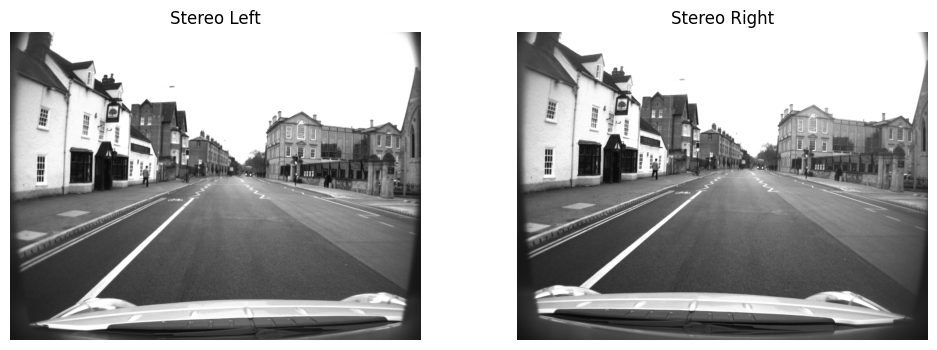

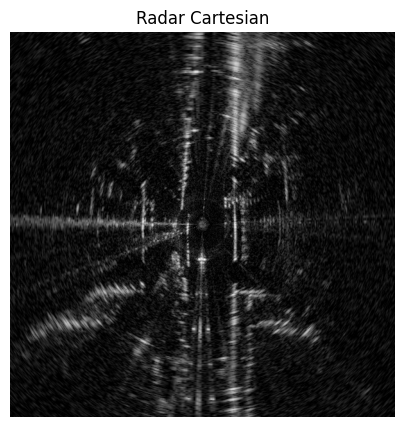

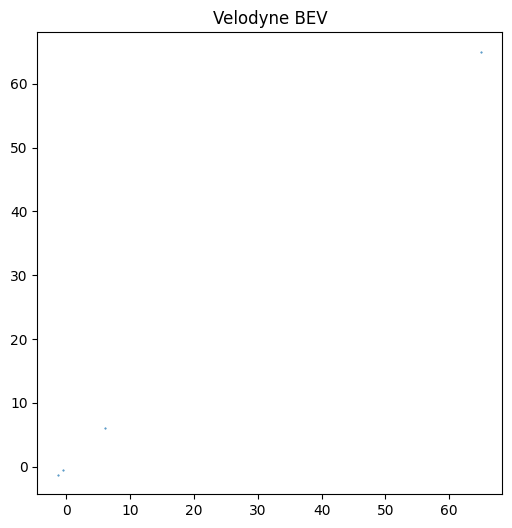

In [15]:
DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large"

ts0 = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))[0]
frame = get_frame(DATA_ROOT, ts0)
visualize_frame(frame)

#### YOLOv8 (Ultralytics) 설치 + 기본 모델 로드

In [16]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00


In [17]:
from ultralytics import YOLO

det_model = YOLO("yolov8s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#### 탐지 함수 (bbox/score/class 반환)

In [18]:
import numpy as np

# COCO 클래스 이름(ultralytics 기본에 포함)
COCO_NAMES = det_model.names

def detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left"):
    """
    use_img: "left" or "right" (stereo) / 필요시 mono로 바꾸려면 frame 키만 바꾸면 됨
    returns: list of dict {xyxy, conf, cls_id, cls_name}
    """
    img = frame["left_img"] if use_img == "left" else frame["right_img"]
    # Ultralytics는 RGB numpy array OK
    results = det_model.predict(img, conf=conf, iou=iou, max_det=max_det, verbose=False)

    dets = []
    r0 = results[0]
    if r0.boxes is None or len(r0.boxes) == 0:
        return dets

    boxes = r0.boxes
    for b in boxes:
        xyxy = b.xyxy[0].cpu().numpy().astype(float)  # (x1,y1,x2,y2)
        score = float(b.conf[0].cpu().numpy())
        cls_id = int(b.cls[0].cpu().numpy())
        cls_name = COCO_NAMES.get(cls_id, str(cls_id))

        dets.append({
            "xyxy": xyxy,
            "conf": score,
            "cls_id": cls_id,
            "cls_name": cls_name
        })
    return dets

#### 박스 시각화

In [19]:
import cv2

def draw_detections_rgb(img_rgb, dets, min_conf=0.25, show_label=True):
    """
    img_rgb: RGB numpy
    returns: annotated RGB numpy
    """
    img = img_rgb.copy()
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for d in dets:
        if d["conf"] < min_conf:
            continue
        x1, y1, x2, y2 = d["xyxy"]
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        cv2.rectangle(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

        if show_label:
            label = f'{d["cls_name"]} {d["conf"]:.2f}'
            cv2.putText(img_bgr, label, (x1, max(0, y1 - 8)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#### 실행: get_frame → detect → visualize

#### 클래스 필터링 (보행자/차량 위주)

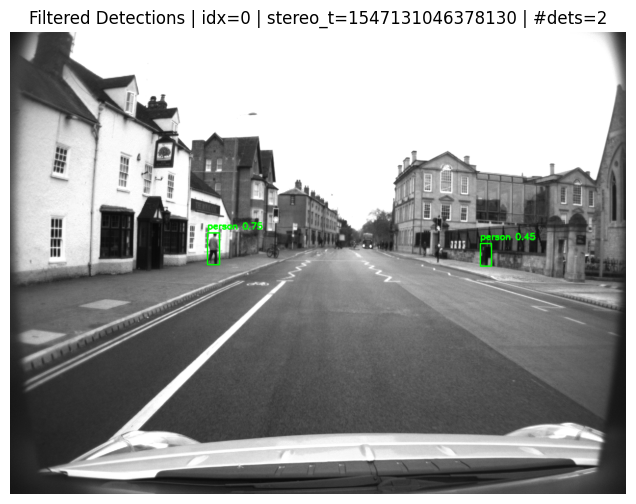

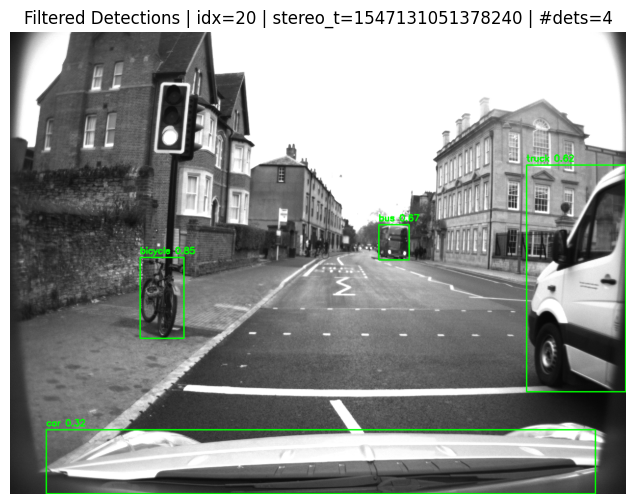

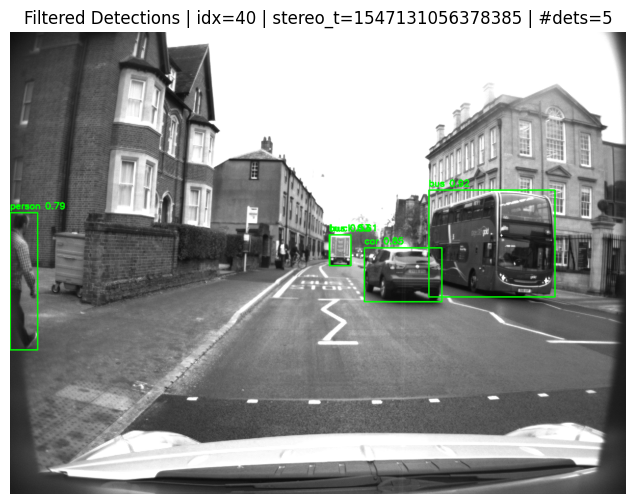

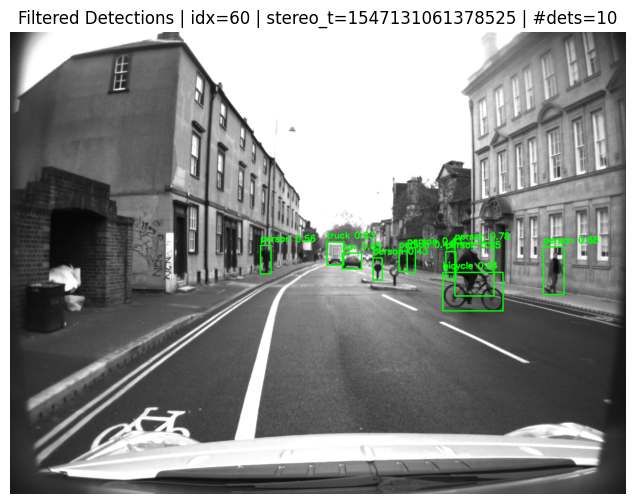

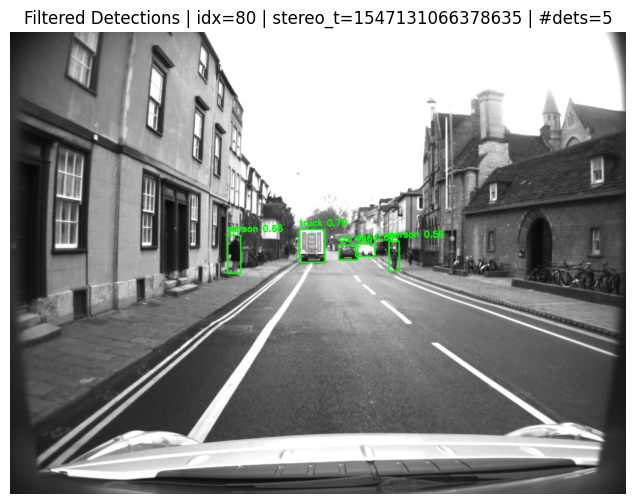

In [20]:
import os
import matplotlib.pyplot as plt

DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large"

radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

TARGET_CLASSES = {"person", "car", "bus", "truck", "motorcycle", "bicycle"}

def filter_dets(dets, target=TARGET_CLASSES, min_conf=0.30):
    return [d for d in dets if d["cls_name"] in target and d["conf"] >= min_conf]

indices = [0, 20, 40, 60, 80]

for idx in indices:
    t = int(radar_ts[idx])
    frame = get_frame(DATA_ROOT, t)

    dets = detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets_f = filter_dets(dets, min_conf=0.30)

    vis = draw_detections_rgb(frame["left_img"], dets_f, min_conf=0.30)

    plt.figure(figsize=(12,6))
    plt.imshow(vis)
    plt.title(
        f"Filtered Detections | idx={idx} | stereo_t={frame['t_stereo']} | #dets={len(dets_f)}"
    )
    plt.axis("off")
    plt.show()

In [21]:
# import os
# import random
# import matplotlib.pyplot as plt

# DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/Self-Driving-Car/robotcar_large_sample"
# radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

# # 랜덤으로 5개 timestamp 선택
# sample_ts = random.sample(list(radar_ts), 5)

# for t in sample_ts:
#     frame = get_frame(DATA_ROOT, int(t))

#     dets = detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left")
#     dets_f = filter_dets(dets, min_conf=0.30)

#     vis = draw_detections_rgb(frame["left_img"], dets_f, min_conf=0.30)

#     plt.figure(figsize=(12,6))
#     plt.imshow(vis)
#     plt.title(
#         f"Random frame | t_stereo={frame['t_stereo']} | #dets={len(dets_f)}"
#     )
#     plt.axis("off")
#     plt.show()

In [22]:
# import random
# import os
# import matplotlib.pyplot as plt

# DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/Self-Driving-Car/robotcar_large_sample"

# radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

# TARGET_CLASSES = {"person", "car", "bus", "truck", "motorcycle", "bicycle"}

# def filter_dets(dets, target=TARGET_CLASSES, min_conf=0.30):
#     return [d for d in dets if d["cls_name"] in target and d["conf"] >= min_conf]

# # 랜덤으로 5개 선택
# sample_ts = random.sample(list(radar_ts), 5)

# for t in sample_ts:
#     frame = get_frame(DATA_ROOT, int(t))

#     dets = detect_objects(frame, conf=0.25, iou=0.45, max_det=50, use_img="left")
#     dets_f = filter_dets(dets, min_conf=0.30)

#     vis = draw_detections_rgb(frame["left_img"], dets_f, min_conf=0.30)

#     plt.figure(figsize=(12,6))
#     plt.imshow(vis)
#     plt.title(
#         f"Filtered Detections | stereo_t={frame['t_stereo']} | #dets={len(dets_f)}"
#     )
#     plt.axis("off")
#     plt.show()

#### 거리 추정 출력 포맷

In [23]:
def dets_to_records(dets):
    records = []
    for d in dets:
        x1, y1, x2, y2 = d["xyxy"]
        records.append({
            "cls": d["cls_name"],
            "conf": d["conf"],
            "x1": float(x1), "y1": float(y1), "x2": float(x2), "y2": float(y2),

            # 다음 단계에서 채울 값들 (지금은 None)
            "stereo_dist_m": None,
            "radar_dist_m": None
        })
    return records

records = dets_to_records(dets_f)
records[:3]


[{'cls': 'truck',
  'conf': 0.7896105051040649,
  'x1': 601.646484375,
  'y1': 410.4156494140625,
  'x2': 654.325927734375,
  'y2': 478.79962158203125,
  'stereo_dist_m': None,
  'radar_dist_m': None},
 {'cls': 'person',
  'conf': 0.6649199724197388,
  'x1': 452.93328857421875,
  'y1': 422.146240234375,
  'x2': 479.70111083984375,
  'y2': 501.031005859375,
  'stereo_dist_m': None,
  'radar_dist_m': None},
 {'cls': 'car',
  'conf': 0.6144290566444397,
  'x1': 718.4886474609375,
  'y1': 440.163818359375,
  'x2': 758.5133056640625,
  'y2': 466.1895751953125,
  'stereo_dist_m': None,
  'radar_dist_m': None}]

#### Stereo 매칭(Disparity) 계산

In [24]:
import numpy as np
import cv2

def compute_disparity_sgbm(left_rgb, right_rgb):
    """
    left_rgb/right_rgb: RGB (H,W,3)
    returns: disparity float32 (pixel)  (H,W)  / invalid는 0 이하일 수 있음
    """
    left_gray  = cv2.cvtColor(left_rgb, cv2.COLOR_RGB2GRAY)
    right_gray = cv2.cvtColor(right_rgb, cv2.COLOR_RGB2GRAY)

    # SGBM 파라미터
    # numDisparities는 16의 배수
    min_disp = 0
    num_disp = 16 * 10  # 160
    block_size = 5

    matcher = cv2.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block_size,
        P1=8 * 1 * block_size * block_size,
        P2=32 * 1 * block_size * block_size,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    disp = matcher.compute(left_gray, right_gray).astype(np.float32) / 16.0
    return disp

#### (1) 로드 → (2) demosaic → (3) undistort → (4) disparity(SGBM) → (5) depth(m)

In [25]:
import os, sys
import cv2
import numpy as np

# ====== PATH ======
DATA_ROOT   = "/content/drive/MyDrive/Colab Notebooks/[멋쟁이사자_CV]/[멋사]프로젝트1_자율주행 객체탐지/2019-01-10-14-36-48-radar-oxford-10k-partial-large"
SDK_PY      = "/content/robotcar-dataset-sdk/python"
MODELS_DIR  = "/content/robotcar-dataset-sdk/models"

if SDK_PY not in sys.path:
    sys.path.insert(0, SDK_PY)

import camera_model

# ====== RobotCar: Bumblebee XB3 wide-baseline (left+right) ======
BASELINE_M = 0.24  # wide baseline = 24cm (left+right)  :contentReference[oaicite:5]{index=5}

def load_bayer_png_as_rgb(path):
    """
    RobotCar Bumblebee XB3: raw Bayer PNG, pattern=GBRG  :contentReference[oaicite:6]{index=6}
    """
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise FileNotFoundError(path)

    # 16-bit면 8-bit로 다운스케일(대략)
    if img.dtype == np.uint16:
        img = (img / 256).astype(np.uint8)

    # Bayer (1채널)
    if img.ndim == 2:
        rgb = cv2.cvtColor(img, cv2.COLOR_BayerGB2RGB)  # GBRG
        return rgb

    # 이미 3채널이면(BGR)
    if img.ndim == 3 and img.shape[2] == 3:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    raise ValueError(f"Unsupported image shape: {img.shape}, dtype={img.dtype}")

def read_first_stereo_timestamp():
    ts_path = os.path.join(DATA_ROOT, "stereo.timestamps")
    with open(ts_path, "r") as f:
        t = f.readline().split()[0]
    return t

def build_camera_models():
    # signature: (models_dir, images_dir) 라고 하셨으니 그대로 사용
    model_left  = camera_model.CameraModel(MODELS_DIR, os.path.join(DATA_ROOT, "stereo/left"))
    model_right = camera_model.CameraModel(MODELS_DIR, os.path.join(DATA_ROOT, "stereo/right"))
    return model_left, model_right

def compute_disparity_sgbm(left_rgb, right_rgb):
    left_gray  = cv2.cvtColor(left_rgb,  cv2.COLOR_RGB2GRAY)
    right_gray = cv2.cvtColor(right_rgb, cv2.COLOR_RGB2GRAY)

    # SGBM 기본 세팅(나중에 튜닝 가능)
    min_disp = 0
    num_disp = 16 * 10  # 160 (16의 배수)
    block    = 5

    sgbm = cv2.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block,
        P1=8 * block * block,
        P2=32 * block * block,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    disp = sgbm.compute(left_gray, right_gray).astype(np.float32) / 16.0
    return disp

def disparity_to_depth(disp, fx_px, baseline_m):
    depth = np.full_like(disp, np.nan, dtype=np.float32)
    valid = disp > 1.0
    depth[valid] = (fx_px * baseline_m) / disp[valid]
    return depth

# ====== RUN 1 FRAME ======
t = read_first_stereo_timestamp()
left_path  = os.path.join(DATA_ROOT, "stereo/left",  f"{t}.png")
right_path = os.path.join(DATA_ROOT, "stereo/right", f"{t}.png")

left_rgb  = load_bayer_png_as_rgb(left_path)
right_rgb = load_bayer_png_as_rgb(right_path)

model_left, model_right = build_camera_models()

# undistort
left_u  = model_left.undistort(left_rgb)
right_u = model_right.undistort(right_rgb)

# fx from CameraModel
fx = float(model_left.focal_length[0])  # (fx,fy) in pixels :contentReference[oaicite:7]{index=7}

disp  = compute_disparity_sgbm(left_u, right_u)
depth = disparity_to_depth(disp, fx, BASELINE_M)

print("timestamp:", t)
print("fx(px):", fx, "baseline(m):", BASELINE_M)
print("disp stats:", np.nanmin(disp), np.nanmax(disp))
print("depth stats (m):", np.nanmin(depth), np.nanmax(depth))


timestamp: 1547131046315627
fx(px): 983.044006 baseline(m): 0.24
disp stats: -1.0 159.0
depth stats (m): 1.48384 222.05229


#### bbox별 거리 추정 함수

In [26]:
import numpy as np

def bbox_depth_robust(depth_m, xyxy, inner=0.15, min_valid=50, clip_percent=(5, 95)):
    """
    depth_m: (H,W) float, invalid=nan
    xyxy: (x1,y1,x2,y2)
    inner: bbox 테두리 영향 줄이기 위해 안쪽 영역만 사용 (0.15~0.25 추천)
    min_valid: 유효 depth 픽셀 최소 개수
    clip_percent: depth 분포의 하위/상위 퍼센트 클리핑(이상치 제거)
    return: float distance(m) or None
    """
    h, w = depth_m.shape[:2]
    x1, y1, x2, y2 = map(float, xyxy)

    bw = x2 - x1
    bh = y2 - y1
    x1 = x1 + bw * inner
    x2 = x2 - bw * inner
    y1 = y1 + bh * inner
    y2 = y2 - bh * inner

    x1 = int(np.clip(x1, 0, w-1))
    x2 = int(np.clip(x2, 0, w))
    y1 = int(np.clip(y1, 0, h-1))
    y2 = int(np.clip(y2, 0, h))

    if x2 <= x1 or y2 <= y1:
        return None

    roi = depth_m[y1:y2, x1:x2]
    vals = roi[np.isfinite(roi)]
    if vals.size < min_valid:
        return None

    lo, hi = np.percentile(vals, clip_percent)
    vals = vals[(vals >= lo) & (vals <= hi)]
    if vals.size < max(10, min_valid // 3):
        return None

    return float(np.median(vals))

#### 탐지 결과(dets)에 stereo 거리 붙이기

In [27]:
def attach_radar_range_to_dets(dets, radar_polar, fx, cx,
                               stereo_ok_min=3.0, stereo_ok_max=120.0,
                               guided_window_m=20.0):
    out = []
    for d in dets:
        bearing = bbox_to_bearing_rad(d["xyxy"], fx, cx)
        s = d.get("stereo_dist_m", None)

        use_guided = (s is not None) and (stereo_ok_min <= s <= stereo_ok_max)

        if use_guided:
            r = radar_range_from_bearing(
                radar_polar, bearing,
                min_m=4.0, max_m=80.0,
                smooth_k=11, thr_quantile=0.98,  # guided에서도 조금 완화
                stereo_hint_m=s, window_m=guided_window_m
            )
        else:
            # stereo 힌트가 없거나 비정상이면 unguided로 매칭 늘리기
            r = radar_range_from_bearing(
                radar_polar, bearing,
                min_m=4.0, max_m=80.0,
                smooth_k=11, thr_quantile=0.98,
                stereo_hint_m=None
            )

        dd = dict(d)
        dd["bearing_rad"] = bearing
        dd["radar_dist_m"] = r
        out.append(dd)
    return out

#### 시각화: bbox + class + conf + stereo distance(m)

In [28]:
import cv2

def draw_dets_with_stereo_dist(img_rgb, dets, min_conf=0.30):
    img = img_rgb.copy()
    bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue

        x1, y1, x2, y2 = map(int, d["xyxy"])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), (0,255,0), 2)

        dist = d.get("stereo_dist_m", None)
        if dist is None:
            label = f'{d["cls_name"]} {d["conf"]:.2f} | dist: N/A'
        else:
            label = f'{d["cls_name"]} {d["conf"]:.2f} | {dist:.1f}m'

        cv2.putText(bgr, label, (x1, max(0, y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

#### get_frame → undistort → depth → detect → 거리 추정 → 오버레이

In [29]:
import numpy as np

def bbox_depth_robust(depth_m, xyxy, inner=0.15, min_valid=20, clip_percent=(5, 95)):
    """
    depth_m: (H,W) float32 depth in meters (invalid: 0, inf, nan 가능)
    xyxy: [x1,y1,x2,y2]
    inner: bbox 내부에서 테두리 제외 비율 (0.15면 15%씩 안쪽)
    min_valid: 유효 픽셀 최소 개수
    clip_percent: outlier 제거용 분위수 (5~95)
    """
    H, W = depth_m.shape[:2]
    x1, y1, x2, y2 = map(float, xyxy)

    x1 = int(max(0, min(W-1, x1)))
    x2 = int(max(0, min(W-1, x2)))
    y1 = int(max(0, min(H-1, y1)))
    y2 = int(max(0, min(H-1, y2)))

    if x2 <= x1 or y2 <= y1:
        return None

    bw = x2 - x1
    bh = y2 - y1

    ix1 = int(x1 + bw * inner)
    ix2 = int(x2 - bw * inner)
    iy1 = int(y1 + bh * inner)
    iy2 = int(y2 - bh * inner)

    ix1 = max(x1, min(W-1, ix1))
    ix2 = max(x1+1, min(W, ix2))
    iy1 = max(y1, min(H-1, iy1))
    iy2 = max(y1+1, min(H, iy2))

    patch = depth_m[iy1:iy2, ix1:ix2].astype(np.float32)
    if patch.size == 0:
        return None

    # 유효 depth만
    valid = patch[np.isfinite(patch) & (patch > 0)]
    if valid.size < min_valid:
        return None

    lo, hi = np.percentile(valid, clip_percent)
    valid2 = valid[(valid >= lo) & (valid <= hi)]
    if valid2.size < min_valid:
        return None

    return float(np.median(valid2))


def attach_stereo_range_to_dets(dets, depth_m, min_valid_m=2.0, max_valid_m=120.0):
    """
    dets(list[dict])에 stereo_dist_m를 붙여 반환
    - depth가 비정상(너무 작거나 너무 크면) None 처리
    """
    out = []
    for d in dets:
        dist = bbox_depth_robust(depth_m, d["xyxy"], inner=0.15, min_valid=20, clip_percent=(5,95))
        if dist is not None:
            if not (min_valid_m <= dist <= max_valid_m):
                dist = None
        dd = dict(d)
        dd["stereo_dist_m"] = dist
        out.append(dd)
    return out

#### 레이더 원본 가져오기

In [30]:
import numpy as np
import os

def load_radar_polar(DATA_ROOT, t_radar):
    radar_png = os.path.join(DATA_ROOT, "radar", f"{t_radar}.png")
    timestamps, azimuths, valid, fft_data, radar_res = radar.load_radar(radar_png)

    # radar_res 스칼라 확정
    radar_res = float(np.array(radar_res).squeeze())

    # 표준화: azimuths -> (N,), fft -> (N, R)
    azimuths = np.array(azimuths).squeeze()     # (400,1) -> (400,)
    fft = np.array(fft_data).squeeze()          # (400,3768,1) -> (400,3768)

    # 안전 확인
    if azimuths.ndim != 1:
        raise ValueError(f"azimuths should be 1D after squeeze, got {azimuths.shape}")
    if fft.ndim != 2:
        raise ValueError(f"fft should be 2D after squeeze, got {fft.shape}")

    return {
        "radar_png": radar_png,
        "azimuths": azimuths.astype(np.float32),   # (N,)
        "valid": np.array(valid).squeeze() if valid is not None else None,
        "fft": fft.astype(np.float32),             # (N,R)
        "radar_res": radar_res
    }

#### 카메라 bbox → bearing 추정

In [31]:
def get_fx_and_cx(model_left, img_w):
    # fx는 확정
    fx = float(model_left.focal_length[0])

    # cx는 모델 속성명이 SDK 버전에 따라 다를 수 있어요.
    # 없으면 이미지 중심으로 추정.
    cx = None
    for cand in ["principal_point", "center", "c", "pp"]:
        if hasattr(model_left, cand):
            v = getattr(model_left, cand)
            # principal_point가 (cx,cy) 형태인 경우가 흔함
            try:
                cx = float(v[0])
                break
            except Exception:
                pass

    if cx is None:
        cx = img_w / 2.0  # 추정

    return fx, cx

def bbox_to_bearing_rad(xyxy, fx, cx):
    x1, y1, x2, y2 = map(float, xyxy)
    u = (x1 + x2) / 2.0
    # pinhole 근사: theta = arctan((u - cx)/fx)
    return float(np.arctan2((u - cx), fx))

#### bearing → 레이더에서 거리 peak 뽑기

In [32]:
import numpy as np

def smooth_1d(x, k=11):
    x = np.asarray(x, dtype=np.float32).reshape(-1)
    if k <= 1:
        return x
    k = int(k) if int(k) % 2 == 1 else int(k) + 1
    pad = k // 2
    xp = np.pad(x, (pad, pad), mode="edge")
    kernel = np.ones(k, dtype=np.float32) / k
    return np.convolve(xp, kernel, mode="valid")


def _radar_peak_in_window(prof_full, radar_res, lo_m, hi_m, smooth_k, thr_quantile):
    r0 = int(max(0, lo_m / radar_res))
    r1 = int(min(len(prof_full), hi_m / radar_res))
    prof = prof_full[r0:r1]
    if prof.size < 10:
        return None

    prof_s = smooth_1d(prof, k=smooth_k)
    thr = float(np.quantile(prof_s, thr_quantile))
    mask = prof_s >= thr
    if not np.any(mask):
        return None

    first = int(np.argmax(mask))
    return float((r0 + first) * radar_res)


def radar_range_from_bearing(
    radar_polar,
    bearing_rad,
    # 기본 unguided 범위
    min_m=4.0,
    max_m=80.0,
    smooth_k=11,
    thr_quantile=0.99,

    # stereo guided 옵션
    stereo_hint_m=None,
    window_m=20.0,
    guided_thr_quantile=0.98
):
    azimuths = radar_polar["azimuths"]
    fft = radar_polar["fft"]
    radar_res = radar_polar["radar_res"]
    valid = radar_polar["valid"]

    # 가장 가까운 azimuth index
    diff = np.angle(np.exp(1j * (azimuths - bearing_rad)))
    idx = int(np.argmin(np.abs(diff)))

    # invalid azimuth면 주변 valid 대체
    if valid is not None and len(valid) == len(azimuths) and (not bool(valid[idx])):
        for d in [1,2,3,4,5]:
            for j in [idx-d, idx+d]:
                if 0 <= j < len(valid) and bool(valid[j]):
                    idx = j
                    break

    prof_full = np.asarray(fft[idx], dtype=np.float32).reshape(-1)  # (R,)

    # 1) stereo guided 시도
    if stereo_hint_m is not None and np.isfinite(stereo_hint_m):
        lo = max(min_m, float(stereo_hint_m) - float(window_m))
        hi = min(max_m, float(stereo_hint_m) + float(window_m))
        if hi > lo:
            d1 = _radar_peak_in_window(
                prof_full, radar_res, lo, hi,
                smooth_k=smooth_k,
                thr_quantile=guided_thr_quantile
            )
            if d1 is not None:
                return d1

    # 2) guided 실패 or stereo 없음 → unguided fallback
    return _radar_peak_in_window(
        prof_full, radar_res, min_m, max_m,
        smooth_k=smooth_k,
        thr_quantile=thr_quantile
    )

#### dets에 radar 거리 붙이고 stereo와 비교

In [33]:
def attach_radar_range_to_dets(dets, radar_polar, fx, cx):
    out = []
    for d in dets:
        bearing = bbox_to_bearing_rad(d["xyxy"], fx, cx)

        s = d.get("stereo_dist_m", None)  # stereo 힌트
        r = radar_range_from_bearing(
            radar_polar, bearing,
            stereo_hint_m=s,
            window_m=15.0,     # 필요하면 10~25로 조절
        )

        dd = dict(d)
        dd["bearing_rad"] = bearing
        dd["radar_dist_m"] = r
        out.append(dd)
    return out

def attach_radar_range_to_dets_radar_only(dets, radar_polar, fx, cx):
    out = []
    for d in dets:
        bearing = bbox_to_bearing_rad(d["xyxy"], fx, cx)
        r = radar_range_from_bearing(
            radar_polar, bearing,
            min_m=4.0, max_m=80.0,
            smooth_k=11, thr_quantile=0.99,
            stereo_hint_m=None  # <- 완전 레이더-only
        )
        dd = dict(d)
        dd["bearing_rad"] = bearing
        dd["radar_dist_m"] = r
        out.append(dd)
    return out


def compare_stereo_radar(dets):
    """
    붙여놓은 stereo 거리와 radar 거리를 비교해서 품질을 보는 평가용 함수”입니다.
    """
    rows = []
    for d in dets:
        s = d.get("stereo_dist_m", None)
        r = d.get("radar_dist_m", None)
        if s is None or r is None:
            err = None
        else:
            err = float(abs(s - r))
        rows.append({
            "cls": d.get("cls_name"),
            "conf": d.get("conf"),
            "stereo_m": s,
            "radar_m": r,
            "abs_err_m": err
        })
    return rows

#### stereo 거리 오버레이

In [34]:
def attach_stereo_range_to_dets(dets, depth_m, min_valid_m=2.0, max_valid_m=120.0):
    out = []
    for d in dets:
        dist = bbox_depth_robust(depth_m, d["xyxy"], inner=0.15, min_valid=50, clip_percent=(5,95))
        if dist is not None:
            if not (min_valid_m <= dist <= max_valid_m):
                dist = None  # 비정상 값 제거
        dd = dict(d)
        dd["stereo_dist_m"] = dist
        out.append(dd)
    return out

#### radar 거리 오버레이

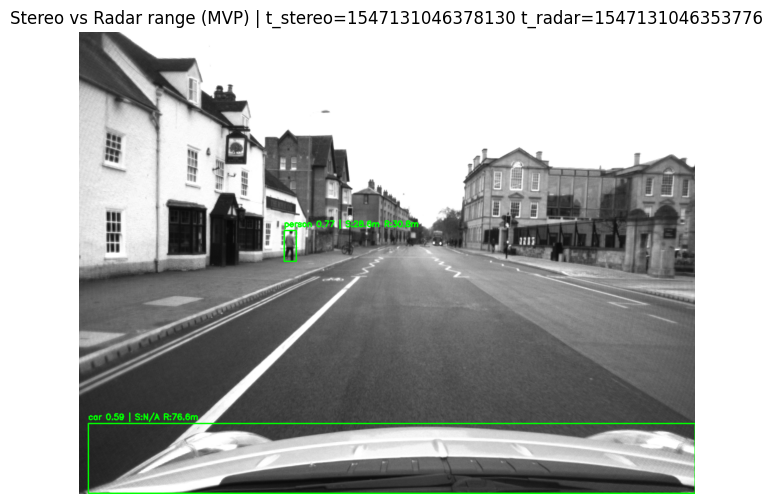

Rows with both stereo & radar: 1


[{'cls': 'person',
  'conf': 0.7703012228012085,
  'stereo_m': 28.59764289855957,
  'radar_m': 30.844800800085068,
  'abs_err_m': 2.2471579015254974}]

In [35]:
import matplotlib.pyplot as plt
import cv2
import os

def draw_dets_with_stereo_radar(img_rgb, dets, min_conf=0.30):
    img = img_rgb.copy()
    bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue
        x1, y1, x2, y2 = map(int, d["xyxy"])

        s = d.get("stereo_dist_m", None)
        r = d.get("radar_dist_m", None)

        cv2.rectangle(bgr, (x1,y1), (x2,y2), (0,255,0), 2)

        s_txt = "N/A" if s is None else f"{s:.1f}m"
        r_txt = "N/A" if r is None else f"{r:.1f}m"
        label = f'{d["cls_name"]} {d["conf"]:.2f} | S:{s_txt} R:{r_txt}'

        cv2.putText(bgr, label, (x1, max(0, y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0,255,0), 2)

    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# ====== 1) 프레임 로드 ======
t0 = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))[0]
frame = get_frame(DATA_ROOT, int(t0))

# ====== 2) stereo undistort + depth (03 결과 재사용) ======
left_rgb  = frame["left_img"]
right_rgb = frame["right_img"]
left_u  = model_left.undistort(left_rgb)
right_u = model_right.undistort(right_rgb)

disp  = compute_disparity_sgbm(left_u, right_u)
depth = disparity_to_depth(disp, fx, BASELINE_M)

# ====== 3) detect (02 결과 재사용) ======
dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
try:
    dets = filter_dets(dets, min_conf=0.30)
except Exception:
    dets = [d for d in dets if d["conf"] >= 0.30]

# ====== 4) stereo 거리 붙이기 (03) ======
dets = attach_stereo_range_to_dets(dets, depth)

# ====== 5) radar polar 로드 + radar 거리 붙이기 (04) ======
radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])

img_h, img_w = left_u.shape[:2]
fx_local, cx_local = get_fx_and_cx(model_left, img_w)

dets = attach_radar_range_to_dets(dets, radar_polar, fx_local, cx_local)

# ====== 6) 시각화 ======
vis = draw_dets_with_stereo_radar(left_u, dets, min_conf=0.30)
plt.figure(figsize=(12,6))
plt.imshow(vis)
plt.title(f"Stereo vs Radar range (MVP) | t_stereo={frame['t_stereo']} t_radar={frame['t_radar']}")
plt.axis("off")
plt.show()

# 비교표(상위 10개)
rows = compare_stereo_radar(dets)
rows_sorted = sorted([r for r in rows if r["abs_err_m"] is not None], key=lambda x: x["abs_err_m"])
print("Rows with both stereo & radar:", len(rows_sorted))
rows_sorted[:10]

### 센서 퓨전(Sensor Fusion) 메인 파이프라인

[설명] 코드에 있는 run_pipeline_once 함수는 내부적으로 다음 과정을 거칩니다:

- Stereo 계산: 거리(stereo_dist_m)를 잽니다.

- Radar 계산: 거리(radar_dist_m)를 잽니다.

- 퓨전 (선택): choose_range_m 함수를 통해 `"둘 중 더 믿을만한 값" 하나를 골라서 dist_m에 넣습니다.`

- 그리기: 그 선택된 값(dist_m)을 화면(vis)에 그립니다.

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# =========================
# 1) Utils: IoU + Matching
# =========================
def iou_xyxy(a, b):
    ax1, ay1, ax2, ay2 = map(float, a)
    bx1, by1, bx2, by2 = map(float, b)
    ix1, iy1 = max(ax1, bx1), max(ay1, by1)
    ix2, iy2 = min(ax2, bx2), min(ay2, by2)
    iw, ih = max(0.0, ix2 - ix1), max(0.0, iy2 - iy1)
    inter = iw * ih
    area_a = max(0.0, (ax2 - ax1)) * max(0.0, (ay2 - ay1))
    area_b = max(0.0, (bx2 - bx1)) * max(0.0, (by2 - by1))
    union = area_a + area_b - inter + 1e-6
    return inter / union


def match_prev_det(curr, prev_list, iou_thr=0.30): # 이전 거리를 가져옵니다
    best = None
    best_iou = 0.0
    for p in prev_list:
        # class 같을 때 우선 매칭
        if p.get("cls_id", None) != curr.get("cls_id", None):
            continue
        i = iou_xyxy(curr["xyxy"], p["xyxy"])
        if i > best_iou:
            best_iou = i
            best = p
    if best_iou >= iou_thr:
        return best, best_iou
    return None, best_iou

# =========================
# 2) Range 선택 (Stereo 우선, 없으면 Radar)
# 센서 선택 (Sensor Fusion Strategy)
# =========================
def choose_range_m(d, stereo_ok=(2.0, 80.0), radar_ok=(4.0, 80.0)): # 현재 거리 확정(선택 필요 stereo/radar)
    s = d.get("stereo_dist_m", None)
    r = d.get("radar_dist_m", None)

    if s is not None and np.isfinite(s) and (stereo_ok[0] <= s <= stereo_ok[1]):
        return float(s), "stereo"
    if r is not None and np.isfinite(r) and (radar_ok[0] <= r <= radar_ok[1]):
        return float(r), "radar"
    return None, None

# =========================
# 3) TTC + Risk level
# =========================
def risk_level(dist_m, vrel_mps, ttc_s,
               danger_ttc=2.0, caution_ttc=4.0,
               danger_dist=6.0, caution_dist=12.0):
    if dist_m is None:
        return "UNKNOWN"
    if vrel_mps is None or vrel_mps <= 0:
        # 접근 중 아님(멀어지거나 정지)
        # dist 기반으로만 가까움 경고는 유지할 수도 있음
        if dist_m < danger_dist:
            return "DANGER"
        if dist_m < caution_dist:
            return "CAUTION"
        return "SAFE"

    # 접근 중이면 TTC 우선 판단
    if (ttc_s is not None and ttc_s < danger_ttc) or (dist_m < danger_dist):
        return "DANGER"
    if (ttc_s is not None and ttc_s < caution_ttc) or (dist_m < caution_dist):
        return "CAUTION"
    return "SAFE"

def attach_ttc_to_dets(dets, curr_time_s, prev_dets, prev_time_s,
                       iou_thr=0.30, vrel_min=0.10):
    out = []
    dt = None if prev_time_s is None else max(1e-3, float(curr_time_s - prev_time_s))

    for d in dets:
        dist_m, src = choose_range_m(d)

        vrel = None
        ttc  = None
        matched_iou = None

        if dt is not None and dist_m is not None:
            p, miou = match_prev_det(d, prev_dets, iou_thr=iou_thr)
            matched_iou = float(miou)
            if p is not None:
                prev_dist_m, _ = choose_range_m(p)
                if prev_dist_m is not None:
                    vrel = (prev_dist_m - dist_m) / dt  # >0이면 접근
                    if vrel > vrel_min:
                        ttc = dist_m / vrel

        dd = dict(d)
        dd["dist_m"] = dist_m
        dd["dist_src"] = src
        dd["vrel_mps"] = vrel
        dd["ttc_s"] = ttc
        dd["match_iou"] = matched_iou
        dd["risk"] = risk_level(dist_m, vrel, ttc)
        out.append(dd)

    return out

# =========================
# 4) Draw with risk color
# =========================
def draw_with_risk(img_rgb, dets, min_conf=0.30):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)

    for d in dets:
        if d.get("conf", 1.0) < min_conf:
            continue

        x1, y1, x2, y2 = map(int, d["xyxy"])
        risk = d.get("risk", "UNKNOWN")

        # BGR 색상
        if risk == "DANGER":
            color = (0, 0, 255)        # 빨강
        elif risk == "CAUTION":
            color = (0, 255, 255)      # 노랑
        elif risk == "SAFE":
            color = (0, 255, 0)        # 초록
        else:
            color = (180, 180, 180)    # 회색

        dist = d.get("dist_m", None)
        ttc  = d.get("ttc_s", None)
        src  = d.get("dist_src", None)

        if dist is None:
            label = f'{d["cls_name"]} {d["conf"]:.2f} | dist N/A'
        else:
            if ttc is not None and np.isfinite(ttc) and ttc < 99:
                label = f'{d["cls_name"]} {d["conf"]:.2f} | {dist:.1f}m({src}) | TTC {ttc:.1f}s'
            else:
                label = f'{d["cls_name"]} {d["conf"]:.2f} | {dist:.1f}m({src})'

        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)
        cv2.putText(bgr, label, (x1, max(0, y1 - 8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# =========================
# 5) Control decision (로그용)
# =========================
def decide_control(dets): # 제어기 (Control Logic) 역할
    # 가장 위험한 객체 하나 기준으로 제어 신호 결정
    danger = [d for d in dets if d.get("risk") == "DANGER"]
    caution = [d for d in dets if d.get("risk") == "CAUTION"]

    if len(danger) > 0:
        # TTC가 더 짧은 것 우선
        danger_sorted = sorted(danger, key=lambda x: (x.get("ttc_s") is None, x.get("ttc_s", 1e9)))
        top = danger_sorted[0]
        return {
            "brake": True,
            "throttle": 0.0,
            "level": "DANGER",
            "target": (top.get("cls_name"), top.get("dist_m"), top.get("ttc_s"))
        }

    if len(caution) > 0:
        caution_sorted = sorted(caution, key=lambda x: (x.get("ttc_s") is None, x.get("ttc_s", 1e9)))
        top = caution_sorted[0]
        return {
            "brake": False,
            "throttle": 0.3,   # 감속 느낌(임시)
            "level": "CAUTION",
            "target": (top.get("cls_name"), top.get("dist_m"), top.get("ttc_s"))
        }

    return {"brake": False, "throttle": 1.0, "level": "SAFE", "target": None}

# =========================
# 6) One-step Pipeline
# =========================
# 카메라 모델은 한 번만 만들고 재사용(속도/일관성)
model_left, model_right = build_camera_models()

def run_pipeline_once(DATA_ROOT, t_query, det_conf=0.25, det_iou=0.45, min_conf=0.30,
                      prev_state=None):
    """
    prev_state: {"prev_dets":..., "prev_time_s":...}
    return: vis_img_rgb, dets_with_ttc, new_state, control
    """

    # (A) 센서 프레임 로드 (stereo/radar/velo timestamp 포함)
    frame = get_frame(DATA_ROOT, int(t_query))

    # (B) Stereo undistort + depth
    left_rgb = frame["left_img"]
    right_rgb = frame["right_img"]

    left_u  = model_left.undistort(left_rgb)
    right_u = model_right.undistort(right_rgb)

    fx = float(model_left.focal_length[0])
    H, W = left_u.shape[:2]
    fx2, cx = get_fx_and_cx(model_left, W)  # fx는 동일, cx 확보

    disp  = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)  # meters, invalid=nan

    # (C) YOLO detect
    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=det_conf, iou=det_iou, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=min_conf)

    # (D) Stereo 거리 attach
    dets = attach_stereo_range_to_dets(dets, depth_m=depth, min_valid_m=2.0, max_valid_m=120.0)

    # (E) Radar 거리 attach (bearing 기반)
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # (F) TTC 계산 (prev_state 필요)
    curr_time_s = float(frame["t_stereo"]) / 1e6  # microsec -> sec 가정 (노트북 주석과 동일)
    prev_dets = [] if prev_state is None else prev_state.get("prev_dets", [])
    prev_time_s = None if prev_state is None else prev_state.get("prev_time_s", None)

    dets_ttc = attach_ttc_to_dets(dets, curr_time_s, prev_dets, prev_time_s,
                                  iou_thr=0.30, vrel_min=0.10)

    # (G) Overlay
    vis = draw_with_risk(left_u, dets_ttc, min_conf=min_conf)

    # (H) Control decision (로그)
    control = decide_control(dets_ttc)

    new_state = {"prev_dets": dets_ttc, "prev_time_s": curr_time_s}
    return vis, dets_ttc, new_state, control, frame

# =========================
# 7) Run demo: 연속 N프레임
# =========================
# DATA_ROOT는 현재 노트북에서 쓰는 경로로 맞춰주세요.
# (이미 위쪽에서 DATA_ROOT를 새로 잡으셨으면 그 값을 그대로 사용하시면 됩니다.)

# N = 10  # 확인할 프레임 수
# step = 1  # radar.timestamps index 간격

# radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
# start_idx = 0

# state = None
# for k in range(N):
#     t = int(radar_ts[start_idx + k*step])
#     vis, dets_ttc, state, control, frame = run_pipeline_once(DATA_ROOT, t, det_conf=0.25, det_iou=0.45, min_conf=0.30, prev_state=state)

#     print(f"[{k}] t_query={t} | stereo_t={frame['t_stereo']} radar_t={frame['t_radar']} -> control:", control)

#     plt.figure(figsize=(12,6))
#     plt.imshow(vis)
#     plt.title(f"YOLO + Stereo/Radar Range + TTC | k={k} | control={control['level']}")
#     plt.axis("off")
#     plt.show()


In [38]:
print(f"전체 데이터 개수: {len(radar_ts)}")

전체 데이터 개수: 502


### 레이더(좌) VS 스테레오(우)

- 본넷(Bonnet) 제외: y2 좌표(박스 밑바닥)가 이미지의 맨 아래쪽(하위 5~10% 영역)에 닿아 있으면 **"이건 내 차 본넷이다"**라고 판단하고 과감히 버리는 필터를 추가

- 색상 로직 확정: 거리(dist)에 따라 색상을 강제했습니다.

  - ~ 10m 미만: 빨강 (WARNING)
  
  - 10m ~ 20m: 노랑 (CAUTION)

  - 20m 이상: 초록 (SAFE)

- 클래스 이름 및 신뢰도 비율 표시: 바운딩 박스 라벨에 **클래스 이름(예: car, bus 등)과 신뢰도(Confidence)**를 포함하도록 수정했습니다.

> 예시: [Radar] car(0.95) SAFE 15.2m

- 본넷 필터링 유지: is_bonnet 함수와 attach_info_dual 내 필터링 로직은 그대로 유지하여 자차 본넷이 인식되는 것을 방지했습니다.

- 위험도 색상 로직 유지: 10m/20m 기준 위험도 색상 변경 로직(get_risk_color_and_label)도 그대로 적용했습니다.

- 코드 안정성: d.get("cls_name", "Object")와 d.get("conf", 0.0)를 사용하여 값이 없을 경우 에러를 방지했습니다.

In [71]:
import os, glob
import cv2
import numpy as np
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_fixed")
os.makedirs(DUAL_DIR, exist_ok=True)

# ==========================================
# 2. 본넷 필터링 및 위험도 계산 함수
# ==========================================
def is_bonnet(d, img_h):
    """
    박스의 바닥(y2)이 이미지 최하단에 너무 가까우면 본넷으로 간주하고 True 반환
    """
    x1, y1, x2, y2 = map(int, d['xyxy'])

    # 이미지 높이의 90% 지점보다 아래에 박스 끝이 걸치면 본넷으로 판단
    bonnet_line = img_h * 0.90

    if y2 > bonnet_line:
        return True
    return False

def get_risk_color_and_label(dist, mode_name, cls_name="Obj", conf=0.0): # cls_name, conf 추가
    """
    사용자 요청 로직: 10m / 20m 기준 색상 + 클래스 이름 및 비율 표시
    """
    if dist is None or np.isnan(dist) or np.isinf(dist):
        return None, None # 값이 없으면 그리지 않음

    # 기본: 20m 밖 (초록)
    color = (0, 255, 0)
    status = "SAFE"

    # 20m 이내 (노랑)
    if dist < 20.0:
        color = (0, 255, 255) # Yellow
        status = "CAUTION"

    # 10m 이내 (빨강)
    if dist < 10.0:
        color = (0, 0, 255)   # Red
        status = "WARN"

    # 라벨에 클래스 이름 및 신뢰도 포함 (예: [Radar] car(0.95) SAFE 15.2m)
    label = f"[{mode_name}] {cls_name}({conf:.2f}) {status} {dist:.1f}m"
    return color, label

# ==========================================
# 3. 듀얼 TTC 계산 및 정보 부착
# ==========================================
def attach_info_dual(dets, curr_time_s, prev_dets, prev_time_s, img_h, iou_thr=0.30):
    out = []
    dt = None if prev_time_s is None else max(1e-3, float(curr_time_s - prev_time_s))

    for d in dets:
        # [수정 1] 본넷 필터링: 본넷이면 리스트에 넣지 않고 건너뜀
        if is_bonnet(d, img_h):
            continue

        # 1. 거리값 가져오기
        r_dist = d.get("radar_dist_m")
        s_dist = d.get("stereo_dist_m")

        r_ttc, s_ttc = None, None

        # 2. TTC 계산 (이전 프레임 매칭)
        if dt is not None:
            prev_d, _ = match_prev_det(d, prev_dets, iou_thr)
            if prev_d is not None:
                # Radar TTC
                if r_dist and prev_d.get("R_dist"):
                    v = (prev_d["R_dist"] - r_dist) / dt
                    if v > 0.1: r_ttc = r_dist / v

                # Stereo TTC
                if s_dist and prev_d.get("S_dist"):
                    v = (prev_d["S_dist"] - s_dist) / dt
                    if v > 0.1: s_ttc = s_dist / v

        dd = dict(d)
        dd["R_dist"] = r_dist
        dd["R_ttc"] = r_ttc
        dd["S_dist"] = s_dist
        dd["S_ttc"] = s_ttc
        out.append(dd)

    return out

# ==========================================
# 4. 그리기 함수 (분할 모드)
# ==========================================
def draw_sensor_mode(img_rgb, dets, mode="Radar"):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        ttc = d.get(f"{prefix}_ttc")
        cls_name = d.get("cls_name", "Object") # 클래스 이름 가져오기
        conf = d.get("conf", 0.0) # 신뢰도 가져오기

        # [수정 2] 색상 로직 적용 (10m/20m) + 클래스 이름/비율 전달
        color, base_label = get_risk_color_and_label(dist, mode, cls_name, conf)

        if color is None: continue # 거리 없으면 안 그림

        # 라벨에 TTC 추가
        if ttc is not None:
            label = f"{base_label} (TTC {ttc:.1f}s)"
        else:
            label = base_label

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        # 텍스트 배경 박스 (가독성 향상)
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
        cv2.rectangle(bgr, (x1, y1 - 25), (x1 + w, y1), color, -1)
        # 텍스트 (흰색 또는 검은색으로 대비)
        text_color = (0, 0, 0) if (color == (0, 255, 255) or color == (0, 255, 0)) else (255, 255, 255)
        cv2.putText(bgr, label, (x1, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 2)

    return bgr

# ==========================================
# 5. 메인 루프 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
ts_list = radar_ts[0:1800:1] # 1800장

print(f"▶ 본넷 제거 & 로직 수정된 영상 생성 시작 ({len(ts_list)}장)...")

state = None
for k, t in enumerate(ts_list):
    # (A) 파이프라인 기본 실행 (YOLO, 거리계산)
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    # Depth & YOLO
    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)

    # 거리 Attach
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)
    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # (B) 듀얼 정보 부착 (여기서 본넷 필터링 수행됨)
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    # ★ is_bonnet 함수가 내부에서 호출되어 본넷 박스는 제거됨
    dets_dual = attach_info_dual(dets, curr_time_s, prev_dets, prev_time_s, img_h=left_u.shape[0])

    # (C) 그리기 (좌: Radar, 우: Stereo)
    vis_radar = draw_sensor_mode(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_mode(left_u, dets_dual, mode="Stereo")

    vis_combined = np.hstack([vis_radar, vis_stereo])

    # 상단 텍스트
    cv2.putText(vis_combined, "LEFT: Radar Logic", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(vis_combined, "RIGHT: Stereo Logic", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}

▶ 본넷 제거 & 로직 수정된 영상 생성 시작 (252장)...


#### 동영상 변환 및 생성

- -vf "scale=1280:-2": 가로를 1280px로 줄임 (세로는 비율에 맞춰 자동설정, -2는 짝수 보정)
- crf 28: 압축 품질 (기본 23 -> 28로 올리면 화질은 살짝 낮아지고 용량은 확 줄어듦)

In [72]:
# ==========================================
# 6. 동영상 변환 (사이즈 축소 + 용량 최적화)
# ==========================================
mp4_path = os.path.join(OUT_DIR, "Final_Fixed_Comparison_Small.mp4")

# FPS 설정 (분석용이면 10, 부드러운거 원하면 30)
fps = 10

# ffmpeg 명령어 설명:
# -vf "scale=1280:-2": 가로를 1280px로 줄임 (세로는 비율에 맞춰 자동설정, -2는 짝수 보정)
# -crf 28: 압축 품질 (기본 23 -> 28로 올리면 화질은 살짝 낮아지고 용량은 확 줄어듦)
"""
보고서 및 발표용 영상 설정값
scale=1920:-2
crf=21
fps=10
"""
!ffmpeg -y -framerate {fps} -i {DUAL_DIR}/frame_%04d.png \
  -vf "scale=1600:-2" \
  -c:v libx264 -pix_fmt yuv420p -crf 23 -movflags +faststart {mp4_path}

print(f"✅ 용량 최적화 영상 생성 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

### EMA 적용 + 경고음 추가

- TTC(충돌 시간) 계산도 "튀는 값"이 아닌 "부드러운 값(Smoothed)"을 기준으로 계산하도록 변경하여 TTC가 99s -> 2s -> 50s 처럼 미친듯이 변하는 것도 막음

- WARN (10m 이내): "삐~~~~" (1000Hz 고음) - 즉시 브레이크 밟아야 하는 위급한 소리

- CAUTION (20m 이내): "웅~~~~" (500Hz 중저음) - 주의를 주는 소리

- SAFE (20m 밖):

In [75]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile # 오디오 생성용 라이브러리
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_audio")
os.makedirs(DUAL_DIR, exist_ok=True)

# FPS 설정 (10프레임 = 0.1초마다 갱신)
FPS = 10
EMA_ALPHA = 0.3

# ==========================================
# 2. 오디오 생성 함수 (새로 추가됨!)
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    """
    주파수(Hz)와 시간(초)을 입력받아 소리 데이터를 만듭니다.
    frequency=0 이면 무음입니다.
    """
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)

    if frequency == 0:
        audio = np.zeros_like(t)
    else:
        # 사인파(Sine Wave) 생성
        audio = volume * np.sin(2 * np.pi * frequency * t)

    return audio

# ==========================================
# 3. 본넷 필터링 및 위험도 판단
# ==========================================
def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    bonnet_line = img_h * 0.90
    if y2 > bonnet_line: return True
    return False

def get_risk_color_and_label(dist, mode_name, cls_name="Obj", conf=0.0):
    if dist is None or np.isnan(dist) or np.isinf(dist):
        return None, None, 0 # 0: SAFE

    color = (0, 255, 0)
    status = "SAFE"
    risk_level = 0 # 0:Safe, 1:Caution, 2:Warn

    if dist < 20.0:
        color = (0, 255, 255)
        status = "CAUTION"
        risk_level = 1

    if dist < 10.0:
        color = (0, 0, 255)
        status = "WARN"
        risk_level = 2

    label = f"[{mode_name}] {cls_name}({conf:.2f}) {status} {dist:.1f}m"
    return color, label, risk_level

# ==========================================
# 4. EMA 및 정보 부착 (Risk Level 반환 추가)
# ==========================================
def attach_info_dual_ema(dets, curr_time_s, prev_dets, prev_time_s, img_h, iou_thr=0.30):
    out = []
    max_risk_frame = 0 # 현재 프레임에서 가장 높은 위험도 저장

    dt = None if prev_time_s is None else max(1e-3, float(curr_time_s - prev_time_s))

    for d in dets:
        if is_bonnet(d, img_h): continue

        r_raw = d.get("radar_dist_m")
        s_raw = d.get("stereo_dist_m")
        r_smooth, s_smooth = r_raw, s_raw

        # EMA 적용
        prev_d = None
        if dt is not None:
            prev_d, _ = match_prev_det(d, prev_dets, iou_thr)
            if prev_d is not None:
                prev_r = prev_d.get("R_dist")
                if r_raw is not None and prev_r is not None:
                    r_smooth = EMA_ALPHA * r_raw + (1 - EMA_ALPHA) * prev_r
                prev_s = prev_d.get("S_dist")
                if s_raw is not None and prev_s is not None:
                    s_smooth = EMA_ALPHA * s_raw + (1 - EMA_ALPHA) * prev_s

        # TTC 계산
        r_ttc, s_ttc = None, None
        if prev_d is not None and dt is not None:
            if r_smooth is not None and prev_d.get("R_dist") is not None:
                v = (prev_d["R_dist"] - r_smooth) / dt
                if v > 0.1: r_ttc = r_smooth / v
            if s_smooth is not None and prev_d.get("S_dist") is not None:
                v = (prev_d["S_dist"] - s_smooth) / dt
                if v > 0.1: s_ttc = s_smooth / v

        # 위험도 체크 (오디오 생성을 위해 가장 위험한 등급 확인)
        # Radar나 Stereo 둘 중 하나라도 위험하면 소리 나게 설정
        _, _, r_lvl = get_risk_color_and_label(r_smooth, "R")
        _, _, s_lvl = get_risk_color_and_label(s_smooth, "S")

        current_obj_risk = max(r_lvl, s_lvl) # 둘 중 더 위험한 것 선택
        max_risk_frame = max(max_risk_frame, current_obj_risk) # 전체 프레임 중 최고 위험도 갱신

        dd = dict(d)
        dd["R_dist"] = r_smooth
        dd["R_ttc"] = r_ttc
        dd["S_dist"] = s_smooth
        dd["S_ttc"] = s_ttc
        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수
# ==========================================
def draw_sensor_mode(img_rgb, dets, mode="Radar"):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        ttc = d.get(f"{prefix}_ttc")
        cls_name = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        color, base_label, _ = get_risk_color_and_label(dist, mode, cls_name, conf)

        if color is None: continue

        if ttc is not None:
            label = f"{base_label} (TTC {ttc:.1f}s)"
        else:
            label = base_label

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
        cv2.rectangle(bgr, (x1, y1 - 25), (x1 + w, y1), color, -1)

        text_color = (0, 0, 0) if (color == (0, 255, 255) or color == (0, 255, 0)) else (255, 255, 255)
        cv2.putText(bgr, label, (x1, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 2)

    return bgr

# ==========================================
# 6. 메인 루프 (영상 + 오디오 동시 생성)
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
ts_list = radar_ts[0:1800:1] # 1800장

print(f"▶ [Sound ON] 경고음 포함 영상 생성 시작 ({len(ts_list)}장)...")

audio_buffer = [] # 소리 조각들을 모을 리스트
state = None

for k, t in enumerate(ts_list):
    # (A) 파이프라인
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)

    dets = attach_stereo_range_to_dets(dets, depth_m=depth)
    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # (B) 정보 부착 & 이번 프레임의 위험도(max_risk) 확인
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_dual, max_risk = attach_info_dual_ema(dets, curr_time_s, prev_dets, prev_time_s, img_h=left_u.shape[0])

    # (C) ★ 오디오 생성 (0.1초 분량) ★
    # max_risk: 0(안전), 1(주의), 2(위험)
    if max_risk == 2:   # WARN -> 1000Hz (높은 삐~)
        tone = generate_tone(1000, 1.0/FPS, volume=0.5)
    elif max_risk == 1: # CAUTION -> 500Hz (낮은 웅~)
        tone = generate_tone(500, 1.0/FPS, volume=0.3)
    else:               # SAFE -> 무음
        tone = generate_tone(0, 1.0/FPS)

    audio_buffer.append(tone)

    # (D) 그리기 및 저장
    vis_radar = draw_sensor_mode(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_mode(left_u, dets_dual, mode="Stereo")
    vis_combined = np.hstack([vis_radar, vis_stereo])

    cv2.putText(vis_combined, "LEFT: Radar (EMA)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(vis_combined, "RIGHT: Stereo (EMA)", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}

▶ [Sound ON] 경고음 포함 영상 생성 시작 (252장)...


#### 동영상 변환

In [76]:
# ==========================================
# 7. 오디오 저장 및 영상 합치기
# ==========================================
# 1) 오디오 파일(.wav) 저장
full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "warning_sound.wav")
# wavfile.write를 위해 float(-1~1) -> int16 범위로 변환
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)
print(f"✅ 오디오 생성 완료: {wav_path}")

# 2) 영상 + 오디오 합치기
mp4_path = os.path.join( OUT_DIR, "Final_Video_With_Audio.mp4")

!ffmpeg -y -framerate {FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 소리나는 영상 생성 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

###  EMA+경고음+물리적 크기 검증(Cross-Check)추가

- 💡 해결 로직: "멀리 있는 건 작게 보인다"
카메라 원근법에 의해, 가까이 있는 차는 절대 작게 보일 수 없습니다. 따라서 센서가 "이거 5m 앞이야!(위험)"라고 해도, 바운딩 박스가 너무 작다면(예: 높이 40픽셀 미만) 그건 센서 오류입니다. 이 경우 강제로 SAFE 처리하면 됩니다.

- 🛠 수정된 기능
거리 50m 이상: 무조건 초록색(SAFE) 처리 (사용자 요청).

- 박스 크기 필터: 거리가 가깝다고 나왔는데 박스가 너무 작으면, 센서 오류로 간주하고 SAFE 처리 (오경보 방지).

In [77]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_final_v2")
os.makedirs(DUAL_DIR, exist_ok=True)

FPS = 10
EMA_ALPHA = 0.3

# ★ 오경보 방지용 임계값 설정 ★
SAFE_DISTANCE_LIMIT = 50.0  # 50m 밖은 무조건 SAFE
MIN_BOX_HEIGHT_FOR_WARN = 40 # 박스 높이가 40픽셀보다 작은데 가깝다고 하면 무시 (SAFE 처리)

# ==========================================
# 2. 오디오 생성 함수
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0:
        return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

# ==========================================
# 3. 필터링 및 위험도 판단 (수정됨)
# ==========================================
def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

def get_risk_color_and_label_safe(dist, mode_name, cls_name="Obj", conf=0.0, box_h=100):
    """
    [수정] 박스 크기와 거리를 교차 검증하여 오경보를 차단합니다.
    """
    # 1. 값이 없거나 이상하면 SAFE 처리
    if dist is None or np.isnan(dist) or np.isinf(dist):
        return (0, 255, 0), f"[{mode_name}] {cls_name} N/A", 0

    # 2. ★사용자 요청: 50m 밖은 무조건 SAFE★
    if dist >= SAFE_DISTANCE_LIMIT:
        return (0, 255, 0), f"[{mode_name}] {cls_name}({conf:.2f}) SAFE {dist:.1f}m", 0

    # 3. ★오경보 방지: 거리는 가깝다고(20m이내) 나왔는데, 박스가 너무 작으면 SAFE 강제★
    # (가까운 차는 절대 작을 수 없다는 물리 법칙 이용)
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN:
        # 센서값은 튀었지만 시각적으로 멀리 있음 -> SAFE로 강제 변환
        return (0, 255, 0), f"[{mode_name}] {cls_name}({conf:.2f}) SAFE {dist:.1f}m(Err)", 0

    # 4. 정상적인 위험도 판단
    color = (0, 255, 0)
    status = "SAFE"
    risk_level = 0

    if dist < 20.0:
        color = (0, 255, 255) # Yellow
        status = "CAUTION"
        risk_level = 1

    if dist < 10.0:
        color = (0, 0, 255)   # Red
        status = "WARN"
        risk_level = 2

    label = f"[{mode_name}] {cls_name}({conf:.2f}) {status} {dist:.1f}m"
    return color, label, risk_level

# ==========================================
# 4. EMA 및 정보 부착
# ==========================================
def attach_info_dual_ema(dets, curr_time_s, prev_dets, prev_time_s, img_h, iou_thr=0.30):
    out = []
    max_risk_frame = 0
    dt = None if prev_time_s is None else max(1e-3, float(curr_time_s - prev_time_s))

    for d in dets:
        if is_bonnet(d, img_h): continue

        # 박스 높이 계산 (오경보 필터링용)
        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        # EMA 처리
        r_raw = d.get("radar_dist_m")
        s_raw = d.get("stereo_dist_m")
        r_smooth, s_smooth = r_raw, s_raw

        prev_d = None
        if dt is not None:
            prev_d, _ = match_prev_det(d, prev_dets, iou_thr)
            if prev_d is not None:
                if r_raw and prev_d.get("R_dist"):
                    r_smooth = EMA_ALPHA * r_raw + (1 - EMA_ALPHA) * prev_d["R_dist"]
                if s_raw and prev_d.get("S_dist"):
                    s_smooth = EMA_ALPHA * s_raw + (1 - EMA_ALPHA) * prev_d["S_dist"]

        # TTC 계산
        r_ttc, s_ttc = None, None
        if prev_d and dt:
            if r_smooth and prev_d.get("R_dist"):
                v = (prev_d["R_dist"] - r_smooth) / dt
                if v > 0.1: r_ttc = r_smooth / v
            if s_smooth and prev_d.get("S_dist"):
                v = (prev_d["S_dist"] - s_smooth) / dt
                if v > 0.1: s_ttc = s_smooth / v

        # 위험도 체크 (여기서 box_h를 넘겨서 오경보인지 확인)
        _, _, r_lvl = get_risk_color_and_label_safe(r_smooth, "R", box_h=box_h)
        _, _, s_lvl = get_risk_color_and_label_safe(s_smooth, "S", box_h=box_h)

        max_risk_frame = max(max_risk_frame, max(r_lvl, s_lvl))

        dd = dict(d)
        dd["R_dist"] = r_smooth
        dd["R_ttc"] = r_ttc
        dd["S_dist"] = s_smooth
        dd["S_ttc"] = s_ttc
        dd["box_h"] = box_h # 높이 정보 저장
        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수
# ==========================================
def draw_sensor_mode(img_rgb, dets, mode="Radar"):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        ttc = d.get(f"{prefix}_ttc")
        cls_name = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)
        box_h = d.get("box_h", 50)

        # [수정된 함수 호출]
        color, base_label, _ = get_risk_color_and_label_safe(dist, mode, cls_name, conf, box_h)

        # 값이 없으면 건너뜀
        if dist is None or np.isnan(dist): continue

        if ttc is not None:
            label = f"{base_label} (TTC {ttc:.1f}s)"
        else:
            label = base_label

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
        cv2.rectangle(bgr, (x1, y1 - 25), (x1 + w, y1), color, -1)

        text_color = (0, 0, 0) if color == (0, 255, 255) or color == (0, 255, 0) else (255, 255, 255)
        cv2.putText(bgr, label, (x1, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 2)

    return bgr

# ==========================================
# 6. 메인 루프 (오디오 + 오경보 방지)
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
ts_list = radar_ts[0:1800:1]

print(f"▶ 오경보 필터링(50m/박스크기) + 경고음 적용 ({len(ts_list)}장)...")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    # (A) 파이프라인
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)

    dets = attach_stereo_range_to_dets(dets, depth_m=depth)
    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # (B) 정보 부착 (오경보 필터링 적용됨)
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_dual, max_risk = attach_info_dual_ema(dets, curr_time_s, prev_dets, prev_time_s, img_h=left_u.shape[0])

    # (C) 오디오 생성 (위험도가 2일때만 삐- 소리)
    if max_risk == 2:
        tone = generate_tone(1000, 1.0/FPS, volume=0.5)
    elif max_risk == 1:
        tone = generate_tone(500, 1.0/FPS, volume=0.3)
    else:
        tone = generate_tone(0, 1.0/FPS) # 무음

    audio_buffer.append(tone)

    # (D) 그리기
    vis_radar = draw_sensor_mode(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_mode(left_u, dets_dual, mode="Stereo")
    vis_combined = np.hstack([vis_radar, vis_stereo])

    cv2.putText(vis_combined, "LEFT: Radar (Smart Filter)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(vis_combined, "RIGHT: Stereo (Smart Filter)", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}


▶ 오경보 필터링(50m/박스크기) + 경고음 적용 (252장)...


#### 영상 변환

In [78]:
# ==========================================
# 7. 오디오 + 영상 병합
# ==========================================
full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "smart_warning_sound.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_Smart_Safety_System.mp4")

!ffmpeg -y -framerate {FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 최종 완성: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

### 칼만 필터+물리적 크기+ 오디오 경고 + 오경보 방지 로직 결합(EMA 제외)

- "정지 물체 무시(Static Object Suppression)"
- `MIN_APPROACH_SPEED = 1.0`: 나에게 다가오는 속도가 1.0m/s (약 3.6km/h) 미만이면 경고를 울리지 않습니다.

- STATIC 표시: 정지해 있는 물체(자전거 등)는 라벨이 SAFE 5.2m 대신 **STATIC 5.2m**라고 뜨면서 초록색으로 표시됩니다.

In [81]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_dynamic_safe")
os.makedirs(DUAL_DIR, exist_ok=True)

FPS = 10

# ★ 핵심 설정값 ★
SAFE_DISTANCE_LIMIT = 30.0   # 30m 밖은 무조건 SAFE
MIN_BOX_HEIGHT_FOR_WARN = 40 # 박스가 너무 작으면 SAFE
MIN_APPROACH_SPEED = 1.0     # 1.0 m/s (시속 3.6km) 이상으로 다가올 때만 경고! (그 이하는 정지 물체 취급)

# ==========================================
# 2. 칼만 필터 (속도 추정의 핵심)
# ==========================================
class SimpleKalmanFilter:
    def __init__(self, initial_dist, dt=0.1):
        self.x = np.array([initial_dist, 0.0]) # [거리, 속도]
        self.P = np.eye(2) * 100.0
        self.F = np.array([[1, dt], [0, 1]])
        self.H = np.array([1, 0])
        self.R = 5.0
        self.Q = np.array([[0.1, 0], [0, 0.1]])

    def predict(self, dt):
        self.F[0, 1] = dt
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[0]

    def update(self, z):
        if z is None or np.isnan(z): return self.x[0]
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, self.H.T) / S
        y = z - np.dot(self.H, self.x)
        self.x = self.x + K * y
        self.P = np.dot((np.eye(2) - np.outer(K, self.H)), self.P)
        return self.x[0]

    def get_velocity(self):
        return self.x[1] # 음수면 다가오는 것, 양수면 멀어지는 것

# ==========================================
# 3. 유틸리티 (오디오, 본넷)
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0: return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

# ==========================================
# 4. ★ 핵심 로직: 정지 물체 SAFE 처리 ★
# ==========================================
def get_risk_dynamic(dist, velocity, mode_name, cls_name="Obj", conf=0.0, box_h=100):
    """
    거리뿐만 아니라 '속도(Velocity)'를 보고 위험도를 판단합니다.
    """
    # 1. 값이 없으면 SAFE
    if dist is None or np.isnan(dist) or np.isinf(dist):
        return (0, 255, 0), f"[{mode_name}] {cls_name} N/A", 0

    # 2. 오경보 필터 (50m 밖 or 박스 너무 작음)
    if dist >= SAFE_DISTANCE_LIMIT:
        return (0, 255, 0), f"[{mode_name}] {cls_name}({conf:.2f}) SAFE {dist:.1f}m", 0
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN:
        return (0, 255, 0), f"[{mode_name}] {cls_name}({conf:.2f}) SAFE {dist:.1f}m(Err)", 0

    # 3. ★ 정지 물체 필터링 (속도 체크) ★
    # velocity가 -1.0 보다 커야 함 (즉, -0.5, 0, +2 등은 접근 안 함)
    # 접근 속도(Approach Speed) = -velocity
    approach_speed = -velocity

    if approach_speed < MIN_APPROACH_SPEED:
        # 가깝지만(예: 5m), 다가오는 속도가 1m/s도 안 됨 -> 정지한 자전거/벽
        return (0, 255, 0), f"[{mode_name}] {cls_name} STATIC {dist:.1f}m", 0

    # 4. 진짜 위험 상황 (가깝고 + 다가오는 중)
    if dist < 10.0:
        return (0, 0, 255), f"[{mode_name}] {cls_name} WARN {dist:.1f}m", 2
    if dist < 20.0:
        return (0, 255, 255), f"[{mode_name}] {cls_name} CAUTION {dist:.1f}m", 1

    return (0, 255, 0), f"[{mode_name}] {cls_name} SAFE {dist:.1f}m", 0

# ==========================================
# 5. 파이프라인 (속도 정보 전달)
# ==========================================
def attach_info_dual_kalman_dynamic(dets, curr_time_s, prev_dets, prev_time_s, img_h, iou_thr=0.30):
    out = []
    max_risk_frame = 0
    dt = 0.1
    if prev_time_s and curr_time_s:
        dt = float(curr_time_s - prev_time_s)
        if dt <= 0: dt = 0.1

    for d in dets:
        if is_bonnet(d, img_h): continue

        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        # KF 가져오기 및 업데이트
        prev_d, _ = match_prev_det(d, prev_dets, iou_thr)

        # Radar KF
        r_raw = d.get("radar_dist_m")
        kf_r = prev_d["kf_radar"] if (prev_d and "kf_radar" in prev_d) else SimpleKalmanFilter(r_raw if r_raw else 50.0, dt)
        kf_r.predict(dt)
        r_kalman = kf_r.update(r_raw)
        r_vel = kf_r.get_velocity() # ★ 속도 추출

        # Stereo KF
        s_raw = d.get("stereo_dist_m")
        kf_s = prev_d["kf_stereo"] if (prev_d and "kf_stereo" in prev_d) else SimpleKalmanFilter(s_raw if s_raw else 50.0, dt)
        kf_s.predict(dt)
        s_kalman = kf_s.update(s_raw)
        s_vel = kf_s.get_velocity() # ★ 속도 추출

        # TTC 계산
        r_ttc = (r_kalman / -r_vel) if r_vel < -0.1 else None
        s_ttc = (s_kalman / -s_vel) if s_vel < -0.1 else None

        # ★ 위험도 판단에 '속도(vel)'를 함께 넘김 ★
        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        _, _, r_lvl = get_risk_dynamic(r_kalman, r_vel, "R", cls, conf, box_h)
        _, _, s_lvl = get_risk_dynamic(s_kalman, s_vel, "S", cls, conf, box_h)

        max_risk_frame = max(max_risk_frame, max(r_lvl, s_lvl))

        dd = dict(d)
        dd["R_dist"] = r_kalman
        dd["S_dist"] = s_kalman
        dd["R_vel"] = r_vel   # 속도 정보 저장
        dd["S_vel"] = s_vel
        dd["R_ttc"] = r_ttc
        dd["S_ttc"] = s_ttc
        dd["box_h"] = box_h
        dd["kf_radar"] = kf_r
        dd["kf_stereo"] = kf_s

        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 6. 그리기 함수
# ==========================================
def draw_sensor_mode(img_rgb, dets, mode="Radar"):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        vel = d.get(f"{prefix}_vel") # 속도 가져옴
        ttc = d.get(f"{prefix}_ttc")
        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)
        box_h = d.get("box_h", 50)

        # 위험도 색상 (속도 반영)
        color, base_label, _ = get_risk_dynamic(dist, vel, mode, cls, conf, box_h)

        if dist is None or np.isnan(dist): continue

        # 라벨에 속도/TTC 표시
        info = []
        if vel is not None and abs(vel) > 0.1: info.append(f"V:{vel:.1f}m/s")
        if ttc is not None: info.append(f"TTC:{ttc:.1f}s")

        extra_txt = " | ".join(info)
        if extra_txt: label = f"{base_label} [{extra_txt}]"
        else: label = base_label

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1) # 폰트 작게
        cv2.rectangle(bgr, (x1, y1 - 20), (x1 + w, y1), color, -1)

        text_color = (0, 0, 0) if color == (0, 255, 255) or color == (0, 255, 0) else (255, 255, 255)
        cv2.putText(bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1)

    return bgr

# ==========================================
# 7. 메인 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
ts_list = radar_ts[0:1800:1]

print(f"▶ [Static Object Filter] 정지 물체 무시 + 칼만 필터 ({len(ts_list)}장)...")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)

    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # 칼만 적용 + 속도 기반 위험도 판단
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_dual, max_risk = attach_info_dual_kalman_dynamic(dets, curr_time_s, prev_dets, prev_time_s, img_h=left_u.shape[0])

    if max_risk == 2:   tone = generate_tone(1000, 1.0/FPS, volume=0.5)
    elif max_risk == 1: tone = generate_tone(500, 1.0/FPS, volume=0.3)
    else:               tone = generate_tone(0, 1.0/FPS)
    audio_buffer.append(tone)

    vis_radar = draw_sensor_mode(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_mode(left_u, dets_dual, mode="Stereo")
    vis_combined = np.hstack([vis_radar, vis_stereo])

    cv2.putText(vis_combined, "L: Radar (Dynamic)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(vis_combined, "R: Stereo (Dynamic)", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}


▶ [Static Object Filter] 정지 물체 무시 + 칼만 필터 (252장)...


#### 영상 변환

In [82]:
 full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "dynamic_sound.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_Dynamic_Safety.mp4")
!ffmpeg -y -framerate {FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 정지물체 필터링 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

###Final_Dynamic_Safety.mp4의 [아쉬운 점]

스테레오에서 레이더와 다르게 버스를 위험하다고 탐지함(영상 5초 부근)

[유력원인]
- 민무늬 벽" 문제 (Textureless Region) - ★ 가장 큰 원인
스테레오 비전의 약점:

- 스테레오 카메라는 **왼쪽 눈과 오른쪽 눈의 그림을 비교(매칭)**해서 거리를 잰다고 했죠?

- 이때 무늬나 패턴이 있어야 매칭이 잘 됩니다.

- 그런데 버스 뒷면이나 옆면은 거대한 단색(빨강, 파랑 등) 페인트로 칠해진 민무늬인 경우가 많습니다.

- 결과: 컴퓨터는 "왼쪽의 빨간 점이 오른쪽의 어느 빨간 점인지" 헷갈려합니다. 그래서 깊이 값이 깨지거나(NaN), 노이즈가 생겨 엉뚱한 거리를 계산하는 경우가 많습니다.

### 칼만+Gating + Persistence 적용

> 기존 칼만 필터 클래스를 업그레이드하고, 메인 루프에 지속성 검사를 추가

#### "Radar Point Jitter(레이더 포인트 튐)" 또는 "Outlier(이상치)" 현상

레이더가 버스의 '뒷면(26m)'을 찍다가 순간적으로 반사가 튀어서 '뒷바퀴 휠하우스'나 '도로면의 잡음(19m)'을 잡아버리면, 물리적으로 불가능한 속도로 거리가 확 줄어듭니다. (0.1초 만에 7m가 줄어들면 시속 250km/h로 후진했다는 뜻이므로 물리적 오류입니다.)

이를 해결하는 가장 강력한 방법은 **[물리적 한계 필터(Gating)]**와 **[경고 지속성 검사(Persistence Check)]**를 추가하는 것입니다.

---

#### 해결 솔루션 2단계

- 물리적 게이팅 (Physics Gating):

"0.1초 만에 5m 이상 거리가 변했다? 이건 오류다." 하고 측정값을 버리고 예측값만 사용합니다.

- 경고 지속성 (Warning Persistence):

"한 프레임만 19m라고 떴다고 바로 경고 울리지 마."

"최소 3프레임 연속(0.3초)으로 위험해야 경고음 울려." (사람의 인지 반응 속도 고려)

이 두 가지를 적용하면 26m -> 19m로 튀는 순간 "에러네 무시해" 하고 넘어가므로 SAFE가 유지됩니다.


----
#### `get_base_risk` 함수 변경 -> 했지만 판단을 오판단을 하여서 철회.


```
def get_base_risk(dist, velocity, mode_name, cls_name="Obj", conf=0.0, box_h=100):
    # 1. 예외 처리 (값 없음 / 50m 밖 / 박스 작음)
    if dist is None or np.isnan(dist) or np.isinf(dist): return 0, "N/A"
    if dist >= SAFE_DISTANCE_LIMIT: return 0, "SAFE"
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN: return 0, "SAFE(Err)"

    # 2. 정지 물체 필터링 (다가오지 않으면 무조건 SAFE)
    approach_speed = -velocity
    if approach_speed < MIN_APPROACH_SPEED: return 0, "STATIC"

    # 3. TTC(충돌시간) 계산
    # 다가오는 속도가 있을 때만 계산 (0으로 나누기 방지)
    ttc = float('inf')
    if approach_speed > 0.1:
        ttc = dist / approach_speed

    # =========================================================
    # ★ 위험 등급 결정 로직 (Distance + TTC 퓨전) ★
    # =========================================================
    
    # [Level 2: WARN - 빨강] 즉시 브레이크 필요
    # 조건 A: 거리가 10m 이내 (너무 가까움)
    # 조건 B: 거리가 20m 이내인데, TTC가 2.0초 미만 (너무 빨리 다가옴)
    if dist < 10.0:
        return 2, "WARN"
    if dist < 20.0 and ttc < 2.0:
        return 2, f"WARN(TTC{ttc:.1f}s)"

    # [Level 1: CAUTION - 노랑] 주의 필요
    # 조건: 거리가 20m 이내 (TTC는 넉넉함)
    if dist < 20.0:
        return 1, "CAUTION"

    # 그 외는 안전
    return 0, "SAFE"
```
> 이전 코드로 롤백

In [85]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_final_v3")
os.makedirs(DUAL_DIR, exist_ok=True)

FPS = 10

# ★ 오경보 방지 설정 ★
SAFE_DISTANCE_LIMIT = 50.0
MIN_BOX_HEIGHT_FOR_WARN = 40
MIN_APPROACH_SPEED = 1.0

# ★ [NEW] 튀는 값 잡는 설정 ★
MAX_JUMP_PER_FRAME = 3.0    # 0.1초에 3m 이상(시속 108km급) 거리가 변하면 에러로 간주
WARNING_PERSISTENCE = 3     # 최소 3프레임 연속으로 위험해야 진짜 경고 (Debounce)

# ==========================================
# 2. 칼만 필터 (Gating 기능 추가)
# ==========================================
class GatedKalmanFilter:
    def __init__(self, initial_dist, dt=0.1):
        self.x = np.array([initial_dist, 0.0]) # [거리, 속도]
        self.P = np.eye(2) * 100.0
        self.F = np.array([[1, dt], [0, 1]])
        self.H = np.array([1, 0])
        self.R = 5.0
        self.Q = np.array([[0.1, 0], [0, 0.1]])
        self.missed_frames = 0 # 연속으로 측정 놓친 횟수

    def predict(self, dt):
        self.F[0, 1] = dt
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[0]

    def update(self, z):
        # 1. 값이 없으면 예측값 유지
        if z is None or np.isnan(z):
            self.missed_frames += 1
            return self.x[0]

        # 2. ★ Gating (물리적 한계 검사) ★
        # 예측된 위치와 측정된 위치의 차이가 너무 크면(예: 7m 점프), 측정값 무시
        predicted_dist = self.x[0]
        jump = abs(z - predicted_dist)

        # 초기 상태가 아니면서(P가 안정화됨), 점프가 너무 크면 Outlier 처리
        if self.missed_frames < 5 and jump > MAX_JUMP_PER_FRAME:
            # "이건 노이즈야! 무시해!" -> 업데이트 안 함 (Predict 값 사용)
            self.missed_frames += 1
            return predicted_dist

        # 3. 정상 업데이트
        self.missed_frames = 0
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, self.H.T) / S
        y = z - np.dot(self.H, self.x)
        self.x = self.x + K * y
        self.P = np.dot((np.eye(2) - np.outer(K, self.H)), self.P)

        return self.x[0]

    def get_velocity(self):
        return self.x[1]

# ==========================================
# 3. 유틸리티 (오디오, 본넷, 기본위험도)
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0: return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

def get_base_risk(dist, velocity, mode_name, cls_name="Obj", conf=0.0, box_h=100):
    # 1. 기본 필터링 (값 없음, 50m 밖, 박스 작음)
    if dist is None or np.isnan(dist) or np.isinf(dist): return 0, "N/A"
    if dist >= SAFE_DISTANCE_LIMIT: return 0, "SAFE"
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN: return 0, "SAFE(Err)"

    # 2. 정지 물체 필터링
    approach_speed = -velocity
    if approach_speed < MIN_APPROACH_SPEED: return 0, "STATIC"

    # 3. 위험 등급
    if dist < 10.0: return 2, "WARN"
    if dist < 20.0: return 1, "CAUTION"
    return 0, "SAFE"

# ==========================================
# 4. 파이프라인 (Gating + Persistence 적용)
# ==========================================
# ★ 객체별 연속 위험 횟수 저장소
risk_persistence = {} # {track_id: count}

def attach_info_final(dets, curr_time_s, prev_dets, prev_time_s, img_h, iou_thr=0.30):
    global risk_persistence
    out = []
    max_risk_frame = 0
    dt = 0.1
    if prev_time_s and curr_time_s:
        dt = float(curr_time_s - prev_time_s)
        if dt <= 0: dt = 0.1

    # 이번 프레임에 존재하는 ID 추적
    current_ids = []

    for d in dets:
        if is_bonnet(d, img_h): continue

        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        # 매칭 및 KF 업데이트
        prev_d, _ = match_prev_det(d, prev_dets, iou_thr)

        # 트래커 ID 관리 (매칭되면 기존 ID, 없으면 새 ID - 간단 해시 사용)
        if prev_d and "track_id" in prev_d:
            track_id = prev_d["track_id"]
        else:
            track_id = hash(f"{x1}{y1}{curr_time_s}") # 임시 ID 생성
        current_ids.append(track_id)

        # --- Radar KF ---
        r_raw = d.get("radar_dist_m")
        # 기존 KF가 있으면 가져오고, 없으면 새로 만듦 (GatedKalmanFilter 사용)
        kf_r = prev_d["kf_radar"] if (prev_d and "kf_radar" in prev_d) else GatedKalmanFilter(r_raw if r_raw else 50.0, dt)
        kf_r.predict(dt)
        r_kalman = kf_r.update(r_raw) # ★ 여기서 3m 이상 튀는 값 무시됨
        r_vel = kf_r.get_velocity()

        # --- Stereo KF ---
        s_raw = d.get("stereo_dist_m")
        kf_s = prev_d["kf_stereo"] if (prev_d and "kf_stereo" in prev_d) else GatedKalmanFilter(s_raw if s_raw else 50.0, dt)
        kf_s.predict(dt)
        s_kalman = kf_s.update(s_raw)
        s_vel = kf_s.get_velocity()

        # TTC
        r_ttc = (r_kalman / -r_vel) if r_vel < -0.1 else None
        s_ttc = (s_kalman / -s_vel) if s_vel < -0.1 else None

        # --- ★ 핵심: 경고 지속성 검사 (Persistence Check) ---
        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        # 1. 순간적인 위험도 계산
        r_risk_raw, r_txt = get_base_risk(r_kalman, r_vel, "R", cls, conf, box_h)
        s_risk_raw, s_txt = get_base_risk(s_kalman, s_vel, "S", cls, conf, box_h)
        curr_obj_risk = max(r_risk_raw, s_risk_raw)

        # 2. 카운터 누적 (위험하면 +1, 안전하면 0 리셋)
        if track_id not in risk_persistence:
            risk_persistence[track_id] = 0

        if curr_obj_risk > 0:
            risk_persistence[track_id] += 1
        else:
            risk_persistence[track_id] = 0 # 안전해지면 즉시 리셋 (또는 서서히 감소)

        # 3. 최종 위험도 결정 (N 프레임 이상 연속이어야 인정)
        final_risk = 0
        if risk_persistence[track_id] >= WARNING_PERSISTENCE:
            final_risk = curr_obj_risk

        # 4. 시각화 텍스트 정리 (필터링 중이면 (P) 표시)
        if curr_obj_risk > 0 and final_risk == 0:
            status_txt = "WAIT.." # 위험 감지됐으나 대기중
            color = (0, 255, 255) # 노랑
        elif final_risk == 2:
            status_txt = "WARN"
            color = (0, 0, 255)
        elif final_risk == 1:
            status_txt = "CAUTION"
            color = (0, 255, 255)
        elif "STATIC" in r_txt or "STATIC" in s_txt:
            status_txt = "STATIC"
            color = (0, 255, 0)
        else:
            status_txt = "SAFE"
            color = (0, 255, 0)

        max_risk_frame = max(max_risk_frame, final_risk)

        dd = dict(d)
        dd["R_dist"] = r_kalman
        dd["S_dist"] = s_kalman
        dd["R_vel"] = r_vel
        dd["S_vel"] = s_vel
        dd["R_ttc"] = r_ttc
        dd["S_ttc"] = s_ttc
        dd["box_h"] = box_h
        dd["kf_radar"] = kf_r
        dd["kf_stereo"] = kf_s
        dd["track_id"] = track_id
        dd["vis_color"] = color
        dd["vis_txt"] = f"{cls} {status_txt} {r_kalman:.1f}m" # 대표로 Radar 표시

        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수
# ==========================================
def draw_sensor_final(img_rgb, dets, mode="Radar"):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        vel = d.get(f"{prefix}_vel")
        ttc = d.get(f"{prefix}_ttc")

        # 위에서 계산된 최종 색상/텍스트 사용
        color = d.get("vis_color", (0, 255, 0))
        # 모드에 맞게 텍스트 재조합
        status_txt = d.get("vis_txt").split(" ")[1] # SAFE, WARN 등 추출
        label = f"[{mode}] {status_txt} {dist:.1f}m"

        if dist is None or np.isnan(dist): continue

        info = []
        if vel is not None and abs(vel) > 0.1: info.append(f"V:{vel:.1f}m/s")
        if ttc is not None: info.append(f"TTC:{ttc:.1f}s")
        if info: label += " [" + " ".join(info) + "]"

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(bgr, (x1, y1 - 20), (x1 + w, y1), color, -1)

        text_color = (0, 0, 0) if color == (0, 255, 255) or color == (0, 255, 0) else (255, 255, 255)
        cv2.putText(bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1)

    return bgr

# ==========================================
# 6. 메인 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
ts_list = radar_ts[0:1800:1]

print(f"▶ [Final v3] Gating(튀는값 무시) + Persistence(연속체크) 적용 ({len(ts_list)}장)...")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)

    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # 파이프라인 실행
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_dual, max_risk = attach_info_final(dets, curr_time_s, prev_dets, prev_time_s, img_h=left_u.shape[0])

    if max_risk == 2:   tone = generate_tone(1000, 1.0/FPS, volume=0.5)
    elif max_risk == 1: tone = generate_tone(500, 1.0/FPS, volume=0.3)
    else:               tone = generate_tone(0, 1.0/FPS)
    audio_buffer.append(tone)

    vis_radar = draw_sensor_final(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_final(left_u, dets_dual, mode="Stereo")
    vis_combined = np.hstack([vis_radar, vis_stereo])

    cv2.putText(vis_combined, "L: Radar (Anti-Jitter)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(vis_combined, "R: Stereo (Anti-Jitter)", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}

▶ [Final v3] Gating(튀는값 무시) + Persistence(연속체크) 적용 (252장)...


#### 영상 변환(수정전)

In [84]:

full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "final_v3_sound.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_AntiJitter_System.mp4")
!ffmpeg -y -framerate {FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 튀는 현상 완벽 차단: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

#### 영상 변환(수정후)

- 변환하고나서 오히려 사람(2초부근)을 빨간색, 오토바이(23초 부근)를 위험으로 판단함. -> 코드 롤백함

In [86]:
# TTC 로직을 명시적으로 추가
full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "final_v3_sound_2.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_AntiJitter_System_2.mp4")
!ffmpeg -y -framerate {FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 튀는 현상 완벽 차단: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

### TTC 제거 (칼만 방식은 그대로)

- 클래스 & 확률 표시: 바운딩 박스 라벨이 [Radar] Car(0.98) WARN 8.5m 형식으로 표시.

- 검은색 제목: 좌측 상단 "L: Radar...", "R: Stereo..." 글씨를 **검은색(Black)** 으로 변경

- TTC 제거 (거리 중심):

- 복잡한 TTC 계산을 로직과 시각화에서 모두 뺌.

- 이제 **오직 거리(10m/20m)** 와 **정지 상태 여부(속도)** 로만 위험을 판단

In [87]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_final_v4")
os.makedirs(DUAL_DIR, exist_ok=True)

# 오경보 방지 설정
SAFE_DISTANCE_LIMIT = 50.0
MIN_BOX_HEIGHT_FOR_WARN = 40
MIN_APPROACH_SPEED = 1.0     # 이 속도 미만이면 "정지 물체"로 간주

# 튀는 값 잡는 설정
MAX_JUMP_PER_FRAME = 3.0
WARNING_PERSISTENCE = 3

# ==========================================
# 2. 칼만 필터 (Gating) - 속도 계산용 유지
# ==========================================
class GatedKalmanFilter:
    def __init__(self, initial_dist, dt=0.1):
        self.x = np.array([initial_dist, 0.0]) # [거리, 속도]
        self.P = np.eye(2) * 100.0
        self.F = np.array([[1, dt], [0, 1]])
        self.H = np.array([1, 0])
        self.R = 5.0
        self.Q = np.array([[0.1, 0], [0, 0.1]])
        self.missed_frames = 0

    def predict(self, dt):
        self.F[0, 1] = dt
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[0]

    def update(self, z):
        if z is None or np.isnan(z):
            self.missed_frames += 1
            return self.x[0]

        predicted_dist = self.x[0]
        jump = abs(z - predicted_dist)

        # Gating: 갑자기 3m 이상 튀면 무시
        if self.missed_frames < 5 and jump > MAX_JUMP_PER_FRAME:
            self.missed_frames += 1
            return predicted_dist

        self.missed_frames = 0
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, self.H.T) / S
        y = z - np.dot(self.H, self.x)
        self.x = self.x + K * y
        self.P = np.dot((np.eye(2) - np.outer(K, self.H)), self.P)

        return self.x[0]

    def get_velocity(self):
        return self.x[1]

# ==========================================
# 3. 유틸리티 (오디오, 본넷, 위험도)
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0: return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

def get_base_risk(dist, velocity, mode_name, cls_name="Obj", conf=0.0, box_h=100):
    # 1. 예외 처리
    if dist is None or np.isnan(dist) or np.isinf(dist): return 0, "N/A"
    if dist >= SAFE_DISTANCE_LIMIT: return 0, "SAFE"
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN: return 0, "SAFE(Err)"

    # 2. 정지 물체 필터링 (가깝지만 다가오지 않음 -> 안전)
    approach_speed = -velocity
    if approach_speed < MIN_APPROACH_SPEED: return 0, "STATIC"

    # 3. ★ 위험 등급 (TTC 제거, 오직 거리 기준) ★
    if dist < 10.0: return 2, "WARN"    # 10m 이내: 위험
    if dist < 20.0: return 1, "CAUTION" # 20m 이내: 주의

    return 0, "SAFE"

# ==========================================
# 4. 파이프라인
# ==========================================
risk_persistence = {}

def attach_info_final(dets, curr_time_s, prev_dets, prev_time_s, img_h, iou_thr=0.30):
    global risk_persistence
    out = []
    max_risk_frame = 0
    dt = 0.1
    if prev_time_s and curr_time_s:
        dt = float(curr_time_s - prev_time_s)
        if dt <= 0: dt = 0.1

    for d in dets:
        if is_bonnet(d, img_h): continue
        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        prev_d, _ = match_prev_det(d, prev_dets, iou_thr)

        if prev_d and "track_id" in prev_d:
            track_id = prev_d["track_id"]
        else:
            track_id = hash(f"{x1}{y1}{curr_time_s}")

        # KF Update
        r_raw = d.get("radar_dist_m")
        kf_r = prev_d["kf_radar"] if (prev_d and "kf_radar" in prev_d) else GatedKalmanFilter(r_raw if r_raw else 50.0, dt)
        kf_r.predict(dt)
        r_kalman = kf_r.update(r_raw)
        r_vel = kf_r.get_velocity()

        s_raw = d.get("stereo_dist_m")
        kf_s = prev_d["kf_stereo"] if (prev_d and "kf_stereo" in prev_d) else GatedKalmanFilter(s_raw if s_raw else 50.0, dt)
        kf_s.predict(dt)
        s_kalman = kf_s.update(s_raw)
        s_vel = kf_s.get_velocity()

        # Risk Calculation (TTC 제거됨)
        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        r_risk_raw, r_txt = get_base_risk(r_kalman, r_vel, "R", cls, conf, box_h)
        s_risk_raw, s_txt = get_base_risk(s_kalman, s_vel, "S", cls, conf, box_h)
        curr_obj_risk = max(r_risk_raw, s_risk_raw)

        if track_id not in risk_persistence: risk_persistence[track_id] = 0
        if curr_obj_risk > 0: risk_persistence[track_id] += 1
        else: risk_persistence[track_id] = 0

        final_risk = 0
        if risk_persistence[track_id] >= WARNING_PERSISTENCE:
            final_risk = curr_obj_risk

        # Color & Text Setting
        if curr_obj_risk > 0 and final_risk == 0:
            status_txt = "WAIT.."
            color = (0, 255, 255)
        elif final_risk == 2:
            status_txt = "WARN"
            color = (0, 0, 255)
        elif final_risk == 1:
            status_txt = "CAUTION"
            color = (0, 255, 255)
        elif "STATIC" in r_txt or "STATIC" in s_txt:
            status_txt = "STATIC"
            color = (0, 255, 0)
        else:
            status_txt = "SAFE"
            color = (0, 255, 0)

        max_risk_frame = max(max_risk_frame, final_risk)

        dd = dict(d)
        dd["R_dist"] = r_kalman
        dd["S_dist"] = s_kalman
        dd["R_vel"] = r_vel
        dd["S_vel"] = s_vel
        dd["box_h"] = box_h
        dd["kf_radar"] = kf_r
        dd["kf_stereo"] = kf_s
        dd["track_id"] = track_id
        dd["vis_color"] = color

        # ★ 수정된 라벨 포맷 (TTC 제거, 클래스/확률 포함)
        # 예: Car(0.95) WARN 8.5m
        dd["vis_txt"] = f"{cls}({conf:.2f}) {status_txt} {r_kalman:.1f}m"

        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수
# ==========================================
def draw_sensor_final(img_rgb, dets, mode="Radar"):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        vel = d.get(f"{prefix}_vel")

        color = d.get("vis_color", (0, 255, 0))

        # vis_txt 예시: "car(0.95) SAFE 45.2m"
        base_label = d.get("vis_txt")
        # 현재 센서(mode)에 맞는 거리값으로 교체
        # 문자열 조작 대신 새로 구성
        cls_info = base_label.split(" ")[0] # "car(0.95)"
        status = base_label.split(" ")[1]   # "SAFE"

        # 최종 라벨: [Radar] Car(0.95) SAFE 45.2m
        label = f"[{mode}] {cls_info} {status} {dist:.1f}m"

        if dist is None or np.isnan(dist): continue

        # 추가 정보: 속도만 표시 (TTC 제거됨)
        info = []
        if vel is not None and abs(vel) > 0.1: info.append(f"V:{vel:.1f}m/s")
        if info: label += " [" + " ".join(info) + "]"

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(bgr, (x1, y1 - 20), (x1 + w, y1), color, -1)

        # 텍스트 색상 (배경에 따라 가독성 조정)
        text_color = (0, 0, 0) if color == (0, 255, 255) or color == (0, 255, 0) else (255, 255, 255)
        cv2.putText(bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1)

    return bgr

# ==========================================
# 6. 메인 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

# 프레임 샘플링 (1800장)
start_idx = 0
step = 1
end_idx = min(start_idx + 1800, len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

# 실제 FPS 자동 계산
dt_list = []
for i in range(len(ts_list)-1):
    diff = (ts_list[i+1] - ts_list[i]) / 1e6
    if diff > 0: dt_list.append(diff)
avg_dt = np.mean(dt_list)
REAL_FPS = 1.0 / avg_dt

print(f"▶ [최종 수정] 거리 중심(TTC제거) + 검은색 제목 + 클래스표시 ({len(ts_list)}장)")
print(f"▶ 실제 재생 속도: {REAL_FPS:.2f} FPS")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)

    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # 파이프라인
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_dual, max_risk = attach_info_final(dets, curr_time_s, prev_dets, prev_time_s, img_h=left_u.shape[0])

    if max_risk == 2:   tone = generate_tone(1000, 1.0/REAL_FPS, volume=0.5)
    elif max_risk == 1: tone = generate_tone(500, 1.0/REAL_FPS, volume=0.3)
    else:               tone = generate_tone(0, 1.0/REAL_FPS)
    audio_buffer.append(tone)

    vis_radar = draw_sensor_final(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_final(left_u, dets_dual, mode="Stereo")
    vis_combined = np.hstack([vis_radar, vis_stereo])

    # ★ 수정됨: 글씨 검은색 (0,0,0)으로 변경
    cv2.putText(vis_combined, f"L: Radar ({REAL_FPS:.1f} FPS)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    cv2.putText(vis_combined, f"R: Stereo ({REAL_FPS:.1f} FPS)", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}

▶ [최종 수정] 거리 중심(TTC제거) + 검은색 제목 + 클래스표시 (252장)
▶ 실제 재생 속도: 4.00 FPS


#### 영상 변환

In [91]:

full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "final_sound.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_Result_v4.mp4")

# ==========================================
# ★ FPS 설정 변경 (여기서 숫자를 바꾸세요!)
# ==========================================
# REAL_FPS 대신 원하는 속도를 입력하세요.
# - 10: 2배속 느낌 (적당함)
# - 20: 4배속 느낌 (부드러움)
# - 30: 6배속 느낌 (아주 빠름)
TARGET_FPS = 8

print(f"▶ 영상을 {TARGET_FPS} FPS로 변환합니다. (기존: {REAL_FPS:.2f} FPS)")

# -framerate 뒤에 {TARGET_FPS}를 넣습니다.
!ffmpeg -y -framerate {TARGET_FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

## 횡방향 필터 적용

- IN-LANE (위험): 물체의 중심이 화면 **중앙(내 진행로)**에 위치함 $\rightarrow$ 거리 가까우면 WARN
- OFF-ROAD (무시): 물체의 중심이 화면 **가장자리(인도, 갓길)**에 위치함 $\rightarrow$ 가까워도 SAFE

> 기존 코드에 `is_in_my_lane` 함수를 추가하여, 화면 가장자리에 있는 물체는 과감하게 무시하도록 수정했습니다.

In [39]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_final_v5")
os.makedirs(DUAL_DIR, exist_ok=True)

# ★ 오경보 방지 설정 ★
SAFE_DISTANCE_LIMIT = 50.0
MIN_BOX_HEIGHT_FOR_WARN = 40
MIN_APPROACH_SPEED = 0.5
"""
MIN_APPROACH_SPEED = 0.1 (아주 예민함)
MIN_APPROACH_SPEED = 0.5 (보행자 수준)
MIN_APPROACH_SPEED = 1.0 (기본값, 추천 ⭐)
- 성인이 빠르게 걷거나 자전거가 서행하는 속도(시속 3.6km) 이상일 때만 경고합니
MIN_APPROACH_SPEED = 3.0 (둔감함)
- 의미: 시속 10.8km 이상으로 꽤 빠르게 달려들어야만 경고합니다.
"""
# ★ [NEW] 횡방향(옆) 필터 설정 ★
# 화면 가로폭의 중앙 50%(0.5)만 "내 차선"으로 인정
# 이 값이 작을수록(0.3) 더 좁게 보고, 클수록(0.8) 옆까지 다 봅니다.
LANE_WIDTH_RATIO = 0.3

# 튀는 값 잡는 설정
MAX_JUMP_PER_FRAME = 3.0
WARNING_PERSISTENCE = 3

# ==========================================
# 2. 칼만 필터 (유지)
# ==========================================
class GatedKalmanFilter:
    def __init__(self, initial_dist, dt=0.1):
        self.x = np.array([initial_dist, 0.0]) # [거리, 속도]
        self.P = np.eye(2) * 100.0
        self.F = np.array([[1, dt], [0, 1]])
        self.H = np.array([1, 0])
        self.R = 5.0
        self.Q = np.array([[0.1, 0], [0, 0.1]])
        self.missed_frames = 0

    def predict(self, dt):
        self.F[0, 1] = dt
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[0]

    def update(self, z):
        if z is None or np.isnan(z):
            self.missed_frames += 1
            return self.x[0]

        predicted_dist = self.x[0]
        jump = abs(z - predicted_dist)

        if self.missed_frames < 5 and jump > MAX_JUMP_PER_FRAME:
            self.missed_frames += 1
            return predicted_dist

        self.missed_frames = 0
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, self.H.T) / S
        y = z - np.dot(self.H, self.x)
        self.x = self.x + K * y
        self.P = np.dot((np.eye(2) - np.outer(K, self.H)), self.P)
        return self.x[0]

    def get_velocity(self):
        return self.x[1]

# ==========================================
# 3. 유틸리티 (오디오, 본넷, 위험도)
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0: return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

# ★ [NEW] 내 차선 여부 판단 함수
def is_in_my_lane(x1, x2, img_w):
    box_center_x = (x1 + x2) / 2
    img_center_x = img_w / 2

    # 이미지 중앙에서 얼마나 벗어났는가?
    offset = abs(box_center_x - img_center_x)

    # 허용 범위 (이미지 폭 * 비율 / 2)
    limit = (img_w * LANE_WIDTH_RATIO) / 2

    # 허용 범위 안이면 True (내 차선), 밖이면 False (갓길)
    return offset < limit

def get_base_risk(dist, velocity, mode_name, x1, x2, img_w, cls_name="Obj", conf=0.0, box_h=100):
    # 1. 예외 처리
    if dist is None or np.isnan(dist) or np.isinf(dist): return 0, "N/A"
    if dist >= SAFE_DISTANCE_LIMIT: return 0, "SAFE"
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN: return 0, "SAFE(Err)"

    # 2. 정지 물체 필터링
    approach_speed = -velocity
    if approach_speed < MIN_APPROACH_SPEED: return 0, "STATIC"

    # 3. ★ [NEW] 횡방향 필터링 (옆에 있는 건 봐줌)
    # 20m 이내로 가까운데, 내 차선 밖(Side)에 있다면? -> SAFE (또는 SIDE)
    if dist < 20.0 and not is_in_my_lane(x1, x2, img_w):
        return 0, "SIDE" # 옆에 있는 물체라고 표시하고 위험도 0

    # 4. 위험 등급
    if dist < 10.0: return 2, "WARN"
    if dist < 20.0: return 1, "CAUTION"

    return 0, "SAFE"

# ==========================================
# 4. 파이프라인
# ==========================================
risk_persistence = {}

def attach_info_final(dets, curr_time_s, prev_dets, prev_time_s, img_h, img_w, iou_thr=0.30):
    global risk_persistence
    out = []
    max_risk_frame = 0
    dt = 0.1
    if prev_time_s and curr_time_s:
        dt = float(curr_time_s - prev_time_s)
        if dt <= 0: dt = 0.1

    for d in dets:
        if is_bonnet(d, img_h): continue
        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        prev_d, _ = match_prev_det(d, prev_dets, iou_thr)

        if prev_d and "track_id" in prev_d:
            track_id = prev_d["track_id"]
        else:
            track_id = hash(f"{x1}{y1}{curr_time_s}")

        # KF Update
        r_raw = d.get("radar_dist_m")
        kf_r = prev_d["kf_radar"] if (prev_d and "kf_radar" in prev_d) else GatedKalmanFilter(r_raw if r_raw else 50.0, dt)
        kf_r.predict(dt)
        r_kalman = kf_r.update(r_raw)
        r_vel = kf_r.get_velocity()

        s_raw = d.get("stereo_dist_m")
        kf_s = prev_d["kf_stereo"] if (prev_d and "kf_stereo" in prev_d) else GatedKalmanFilter(s_raw if s_raw else 50.0, dt)
        kf_s.predict(dt)
        s_kalman = kf_s.update(s_raw)
        s_vel = kf_s.get_velocity()

        # Risk Calculation (횡방향 좌표 x1, x2, img_w 전달)
        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        r_risk_raw, r_txt = get_base_risk(r_kalman, r_vel, "R", x1, x2, img_w, cls, conf, box_h)
        s_risk_raw, s_txt = get_base_risk(s_kalman, s_vel, "S", x1, x2, img_w, cls, conf, box_h)
        curr_obj_risk = max(r_risk_raw, s_risk_raw)

        if track_id not in risk_persistence: risk_persistence[track_id] = 0
        if curr_obj_risk > 0: risk_persistence[track_id] += 1
        else: risk_persistence[track_id] = 0

        final_risk = 0
        if risk_persistence[track_id] >= WARNING_PERSISTENCE:
            final_risk = curr_obj_risk

        # Color & Text Setting
        if "SIDE" in r_txt or "SIDE" in s_txt: # 옆에 있는 물체
            status_txt = "SIDE"
            color = (0, 255, 0) # 안전색 (초록)
        elif curr_obj_risk > 0 and final_risk == 0:
            status_txt = "WAIT.."
            color = (0, 255, 255)
        elif final_risk == 2:
            status_txt = "WARN"
            color = (0, 0, 255)
        elif final_risk == 1:
            status_txt = "CAUTION"
            color = (0, 255, 255)
        elif "STATIC" in r_txt or "STATIC" in s_txt:
            status_txt = "STATIC"
            color = (0, 255, 0)
        else:
            status_txt = "SAFE"
            color = (0, 255, 0)

        max_risk_frame = max(max_risk_frame, final_risk)

        dd = dict(d)
        dd["R_dist"] = r_kalman
        dd["S_dist"] = s_kalman
        dd["R_vel"] = r_vel
        dd["S_vel"] = s_vel
        dd["box_h"] = box_h
        dd["kf_radar"] = kf_r
        dd["kf_stereo"] = kf_s
        dd["track_id"] = track_id
        dd["vis_color"] = color
        dd["vis_txt"] = f"{cls}({conf:.2f}) {status_txt} {r_kalman:.1f}m"

        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수
# ==========================================
def draw_sensor_final(img_rgb, dets, mode="Radar"):
    bgr = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_RGB2BGR)
    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        vel = d.get(f"{prefix}_vel")

        color = d.get("vis_color", (0, 255, 0))
        base_label = d.get("vis_txt")
        cls_info = base_label.split(" ")[0]
        status = base_label.split(" ")[1]

        label = f"[{mode}] {cls_info} {status} {dist:.1f}m"

        if dist is None or np.isnan(dist): continue

        info = []
        if vel is not None and abs(vel) > 0.1: info.append(f"V:{vel:.1f}m/s")
        if info: label += " [" + " ".join(info) + "]"

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(bgr, (x1, y1 - 20), (x1 + w, y1), color, -1)

        text_color = (0, 0, 0) if color == (0, 255, 255) or color == (0, 255, 0) else (255, 255, 255)
        cv2.putText(bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1)

    return bgr

# ==========================================
# 6. 메인 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

start_idx = 0
step = 1
end_idx = min(start_idx + 1800, len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

dt_list = []
for i in range(len(ts_list)-1):
    diff = (ts_list[i+1] - ts_list[i]) / 1e6
    if diff > 0: dt_list.append(diff)
avg_dt = np.mean(dt_list)
REAL_FPS = 1.0 / avg_dt

print(f"▶ [Final v5] 횡방향(Side) 필터 추가 + 검은제목 ({len(ts_list)}장)")
print(f"▶ 실제 재생 속도: {REAL_FPS:.2f} FPS")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)

    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # 파이프라인 (이미지 너비 shape[1] 전달)
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_dual, max_risk = attach_info_final(dets, curr_time_s, prev_dets, prev_time_s,
                                            img_h=left_u.shape[0], img_w=left_u.shape[1])

    if max_risk == 2:   tone = generate_tone(1000, 1.0/REAL_FPS, volume=0.5)
    elif max_risk == 1: tone = generate_tone(500, 1.0/REAL_FPS, volume=0.3)
    else:               tone = generate_tone(0, 1.0/REAL_FPS)
    audio_buffer.append(tone)

    vis_radar = draw_sensor_final(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_final(left_u, dets_dual, mode="Stereo")
    vis_combined = np.hstack([vis_radar, vis_stereo])

    cv2.putText(vis_combined, f"L: Radar ({REAL_FPS:.1f} FPS)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    cv2.putText(vis_combined, f"R: Stereo ({REAL_FPS:.1f} FPS)", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}


▶ [Final v5] 횡방향(Side) 필터 추가 + 검은제목 (502장)
▶ 실제 재생 속도: 4.00 FPS


#### 영상 변환

In [40]:
full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "final_v5_sound.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_Result_v5_3.mp4")

# 원하는 FPS 설정 (15 추천)
TARGET_FPS = 10

!ffmpeg -y -framerate {TARGET_FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 횡방향 필터 적용 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

## [최종] 소리 싱크 조절 + 측정 노이즈 공분산 값 **수정**

> EMA를 추가하는 대신, 코드 내의 self.R (측정 노이즈 공분산) 값을 키워봄.

### self.R을 키우면:

- 칼만 필터가 "센서 데이터가 시끄럽구나, 센서값 덜 믿고 내 예측을 더 믿어야지"라고 판단합니다.

    → 결과적으로 EMA를 쓴 것처럼 그래프가 아주 부드러워집니다. (하지만 속도 추정 기능은 살아있음)

- 현재 코드: self.R = 5.0

- 수정 제안: self.R = 10.0 또는 20.0

#### 🛡️ 아웃라이어 제거를 위한 5대 핵심 기능 정리

1. 물리적 게이팅 (Physics Gating)
기능: "순간이동 방지"

코드: `MAX_JUMP_PER_FRAME = 3.0`

*   항목 추가
*   항목 추가



작동: 이전 프레임에서 20m였던 차가, 0.1초 만에 갑자기 13m로 측정되면(7m 점프), 이는 물리적으로 불가능한 속도(시속 250km 후진)입니다.

결과: 이 측정값을 "센서 오류"로 규정하고 즉시 폐기합니다. 대신 칼만 필터가 예상한 값(약 19.9m)을 사용합니다.

2. 경고 지속성 검사 (Persistence Check)
기능: "깜빡임 방지"

코드: `WARNING_PERSISTENCE = 3`

작동: 센서 노이즈로 인해 딱 한 프레임만 "위험(WARN)"이 떴다가 바로 사라지는 경우가 있습니다.

결과: 위험 신호가 최소 3프레임(약 0.2~0.3초) 연속으로 유지되지 않으면 경고를 울리지 않습니다. 이로 인해 간헐적인 노이즈가 모두 걸러집니다.

3. 횡방향 필터 (Lateral Filtering)
기능: "갓길/인도 무시"

코드: `is_in_my_lane (비율 0.5)`

작동: 거리가 아무리 가까워도(예: 5m), 그 물체의 위치가 **내 주행 차선(화면 중앙 50%)**을 벗어나 있다면 충돌 위험이 없습니다.

결과: 갓길에 세워진 자전거나 주차된 차량은 SIDE (초록색) 라벨이 붙으며 경고 대상에서 제외됩니다.

4. 정지 물체 억제 (Static Object Suppression)
기능: "벽/전봇대 무시"

코드: `MIN_APPROACH_SPEED = 1.0`

작동: 레이더는 벽이나 가로등도 탐지합니다. 하지만 이것들은 나에게 **다가오는 속도(상대 속도)**가 거의 없습니다(내가 서 있을 경우).

결과: 접근 속도가 1.0m/s 미만이면 STATIC (초록색) 라벨이 붙으며 경고하지 않습니다. 움직이는 진짜 위험 요소만 잡습니다.

5. 기하학적 검증 (Geometric Check)
기능: "유령 신호 무시"

코드: `MIN_BOX_HEIGHT_FOR_WARN = 40`

작동: 레이더/스테레오가 "5m 앞이야!"라고 했는데, 정작 카메라에 잡힌 박스 크기가 콩알만 하다면(40픽셀 미만)? 이건 모순입니다. (가까우면 박스가 커야 함)

결과: 이런 경우 센서가 바닥의 반사광 등을 잘못 잡은 것으로 판단하고 SAFE(Err) 처리하여 무시합니다.

In [49]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "final_stable_gray_sync")
os.makedirs(DUAL_DIR, exist_ok=True)

# ★ 영상 재생 속도 (10 FPS 추천)
TARGET_FPS = 10

# 안전 로직 설정
SAFE_DISTANCE_LIMIT = 50.0
MIN_BOX_HEIGHT_FOR_WARN = 40
MIN_APPROACH_SPEED = 1.0
LANE_WIDTH_RATIO = 0.3

# 센서 보정 설정
MAX_JUMP_PER_FRAME = 3.0
WARNING_PERSISTENCE = 3

# ==========================================
# 2. 칼만 필터 (Gated Kalman Filter)
# ==========================================
class GatedKalmanFilter:
    def __init__(self, initial_dist, dt=0.1):
        self.x = np.array([initial_dist, 0.0]) # [거리, 속도]
        self.P = np.eye(2) * 100.0
        self.F = np.array([[1, dt], [0, 1]])
        self.H = np.array([1, 0])
        self.R = 20
        self.Q = np.array([[0.1, 0], [0, 0.1]])
        self.missed_frames = 0

    def predict(self, dt):
        self.F[0, 1] = dt
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[0]

    def update(self, z):
        if z is None or np.isnan(z):
            self.missed_frames += 1
            return self.x[0]

        predicted_dist = self.x[0]
        jump = abs(z - predicted_dist)

        # Gating: 3m 이상 튀면 무시
        if self.missed_frames < 5 and jump > MAX_JUMP_PER_FRAME:
            self.missed_frames += 1
            return predicted_dist

        self.missed_frames = 0
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, self.H.T) / S
        y = z - np.dot(self.H, self.x)
        self.x = self.x + K * y
        self.P = np.dot((np.eye(2) - np.outer(K, self.H)), self.P)
        return self.x[0]

    def get_velocity(self):
        return self.x[1]

# ==========================================
# 3. 유틸리티 함수 (오디오, 차선, 위험도)
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0: return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

def is_in_my_lane(x1, x2, img_w):
    box_center_x = (x1 + x2) / 2
    limit = (img_w * LANE_WIDTH_RATIO) / 2
    return abs(box_center_x - img_w / 2) < limit

def get_base_risk(dist, velocity, mode_name, x1, x2, img_w, cls_name="Obj", conf=0.0, box_h=100):
    if dist is None or np.isnan(dist) or np.isinf(dist): return 0, "N/A"
    if dist >= SAFE_DISTANCE_LIMIT: return 0, "SAFE"
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN: return 0, "SAFE(Err)"

    # 정지 물체 필터링
    approach_speed = -velocity
    if approach_speed < MIN_APPROACH_SPEED: return 0, "STATIC"

    # 옆차선 물체 필터링
    if dist < 20.0 and not is_in_my_lane(x1, x2, img_w):
        return 0, "SIDE"

    if dist < 10.0: return 2, "WARN"
    if dist < 20.0: return 1, "CAUTION"
    return 0, "SAFE"

# ==========================================
# 4. 파이프라인 로직
# ==========================================
risk_persistence = {}

def attach_info_final(dets, curr_time_s, prev_dets, prev_time_s, img_h, img_w, iou_thr=0.30):
    global risk_persistence
    out = []
    max_risk_frame = 0
    dt = 0.1
    if prev_time_s and curr_time_s:
        dt = float(curr_time_s - prev_time_s)
        if dt <= 0: dt = 0.1

    for d in dets:
        if is_bonnet(d, img_h): continue
        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        prev_d, _ = match_prev_det(d, prev_dets, iou_thr)

        if prev_d and "track_id" in prev_d: track_id = prev_d["track_id"]
        else: track_id = hash(f"{x1}{y1}{curr_time_s}")

        # KF Update
        r_raw = d.get("radar_dist_m")
        kf_r = prev_d["kf_radar"] if (prev_d and "kf_radar" in prev_d) else GatedKalmanFilter(r_raw if r_raw else 50.0, dt)
        kf_r.predict(dt)
        r_kalman = kf_r.update(r_raw)
        r_vel = kf_r.get_velocity()

        s_raw = d.get("stereo_dist_m")
        kf_s = prev_d["kf_stereo"] if (prev_d and "kf_stereo" in prev_d) else GatedKalmanFilter(s_raw if s_raw else 50.0, dt)
        kf_s.predict(dt)
        s_kalman = kf_s.update(s_raw)
        s_vel = kf_s.get_velocity()

        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        r_risk_raw, r_txt = get_base_risk(r_kalman, r_vel, "R", x1, x2, img_w, cls, conf, box_h)
        s_risk_raw, s_txt = get_base_risk(s_kalman, s_vel, "S", x1, x2, img_w, cls, conf, box_h)
        curr_obj_risk = max(r_risk_raw, s_risk_raw)

        if track_id not in risk_persistence: risk_persistence[track_id] = 0
        if curr_obj_risk > 0: risk_persistence[track_id] += 1
        else: risk_persistence[track_id] = 0

        final_risk = 0
        if risk_persistence[track_id] >= WARNING_PERSISTENCE:
            final_risk = curr_obj_risk

        if "SIDE" in r_txt or "SIDE" in s_txt:
            status_txt = "SIDE"
            color = (0, 255, 0)
        elif curr_obj_risk > 0 and final_risk == 0:
            status_txt = "WAIT.."
            color = (0, 255, 255)
        elif final_risk == 2:
            status_txt = "WARN"
            color = (0, 0, 255)
        elif final_risk == 1:
            status_txt = "CAUTION"
            color = (0, 255, 255)
        elif "STATIC" in r_txt or "STATIC" in s_txt:
            status_txt = "STATIC"
            color = (0, 255, 0)
        else:
            status_txt = "SAFE"
            color = (0, 255, 0)

        max_risk_frame = max(max_risk_frame, final_risk)

        dd = dict(d)
        dd["R_dist"] = r_kalman
        dd["S_dist"] = s_kalman
        dd["R_vel"] = r_vel
        dd["S_vel"] = s_vel
        dd["box_h"] = box_h
        dd["kf_radar"] = kf_r
        dd["kf_stereo"] = kf_s
        dd["track_id"] = track_id
        dd["vis_color"] = color
        dd["vis_txt"] = f"{cls}({conf:.2f}) {status_txt} {r_kalman:.1f}m"

        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수 (흑백 전용, 안정적)
# ==========================================
def draw_sensor_final(img_gray, dets, mode="Radar"):
    # 흑백 이미지(Gray)를 컬러 박스 그리기 위해 BGR로 변환
    if len(img_gray.shape) == 2:
        bgr = cv2.cvtColor(img_gray.copy(), cv2.COLOR_GRAY2BGR)
    else:
        # 혹시라도 컬러가 들어오면 그대로 씀
        bgr = cv2.cvtColor(img_gray.copy(), cv2.COLOR_RGB2BGR)

    prefix = "R" if mode == "Radar" else "S"

    for d in dets:
        dist = d.get(f"{prefix}_dist")
        vel = d.get(f"{prefix}_vel")
        color = d.get("vis_color", (0, 255, 0))
        base_label = d.get("vis_txt")
        cls_info = base_label.split(" ")[0]
        status = base_label.split(" ")[1]

        label = f"[{mode}] {cls_info} {status} {dist:.1f}m"

        if dist is None or np.isnan(dist): continue

        info = []
        if vel is not None and abs(vel) > 0.1: info.append(f"V:{vel:.1f}m/s")
        if info: label += " [" + " ".join(info) + "]"

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(bgr, (x1, y1 - 20), (x1 + w, y1), color, -1)

        # 글씨는 검은색
        cv2.putText(bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)

    return bgr

# ==========================================
# 6. 메인 실행 (★ 안정성 최우선 버전 ★)
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
start_idx = 0
step = 1
end_idx = min(start_idx + 1800, len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

print(f"▶ [Stable Version] 컬러 제거 + 오디오 싱크 완벽 적용 (FPS: {TARGET_FPS})")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    frame = get_frame(DATA_ROOT, int(t))
    # ★ 단순하게 Undistort만 수행 (컬러 변환 X) -> 에러 원천 차단
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    # 흑백이므로 바로 사용
    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    # YOLO & Fusion (흑백 이미지 전달해도 YOLO는 잘 돕니다)
    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)

    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # 파이프라인
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    # img_h, img_w 전달
    dets_dual, max_risk = attach_info_final(dets, curr_time_s, prev_dets, prev_time_s,
                                            img_h=left_u.shape[0], img_w=left_u.shape[1])

    # 오디오 싱크 맞춤
    duration = 1.0 / TARGET_FPS
    if max_risk == 2:   tone = generate_tone(1000, duration, volume=0.5)
    elif max_risk == 1: tone = generate_tone(500, duration, volume=0.3)
    else:               tone = generate_tone(0, duration)
    audio_buffer.append(tone)

    # 그리기 (흑백 이미지 -> BGR 변환 후 그리기)
    vis_radar = draw_sensor_final(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_final(left_u, dets_dual, mode="Stereo")
    vis_combined = np.hstack([vis_radar, vis_stereo])

    # 검은색 텍스트 (가독성 UP)
    cv2.putText(vis_combined, f"L: Radar ({TARGET_FPS} FPS)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    cv2.putText(vis_combined, f"R: Stereo ({TARGET_FPS} FPS)", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}

▶ [Stable Version] 컬러 제거 + 오디오 싱크 완벽 적용 (FPS: 10)


#### 프레임 수 확인

In [51]:
# 1. 처리하려고 했던 총 프레임 수 확인
print(f"▶ 입력 프레임 수 (ts_list): {len(ts_list)}장")

# 2. 실제로 생성된 이미지 파일 수 확인
generated_frames = glob.glob(os.path.join(DUAL_DIR, "*.png"))
print(f"▶ 저장된 프레임 수 (files):   {len(generated_frames)}장")

# 3. 결론
if len(ts_list) == len(generated_frames):
    print("✅ 결과: 프레임 삭제 없음! (정확히 일치합니다)")
else:
    print("❌ 결과: 뭔가 삭제되었습니다. (확인 필요)")

▶ 입력 프레임 수 (ts_list): 502장
▶ 저장된 프레임 수 (files):   502장
✅ 결과: 프레임 삭제 없음! (정확히 일치합니다)


#### 영상 변환

In [52]:
full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "final_stable.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_Stable_Synced.mp4")

!ffmpeg -y -framerate {TARGET_FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 안정적인 버전 생성 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

## [센서 퓨전]

### 센서 퓨전 알고리즘: "누구를 더 믿을까?"가장 널리 쓰이는 방식은 **[가중치 기반 퓨전 (Weighted Fusion)]** 입니다.
- 단순히 평균($\frac{A+B}{2}$)을 내는 게 아니라, "더 확실한 놈"의 의견을 더 많이 반영하는 방식입니다.
#### 센서별 특성 (신뢰도)

1. 레이더 (Radar): 거리가 멀어져도 정확도가 유지됩니다. (신뢰도 ▲)
2. 스테레오 (Stereo): 가까울 땐 정확하지만, 거리가 멀어지면 오차가 제곱($Distance^2$)으로 커집니다. (신뢰도 ▼)

#### 퓨전 공식 (Inverse Variance Weighting)수학적으로는 **"오차(분산)의 역수"** 를 가중치로 사용합니다.
> 쉽게 말해 오차가 적을수록 목소리를 크게 냅니다.

$$D_{fusion} = \frac{ (W_{radar} \times D_{radar}) + (W_{stereo} \times D_{stereo}) }{ W_{radar} + W_{stereo} }$$
- 가까운 거리 (10m): 스테레오도 꽤 정확하므로 반반(50:50) 섞습니다
- 먼 거리 (50m): 스테레오 오차가 너무 크므로, 레이더 의견을 90% 반영합니다.
> 블렌딩 하는거임(섞는거)
-  예를 들어 먼 거리면, "사실상 레이더 값만 쓰겠다"
> `fuse_measurements` 함수에 블렌딩 공식이 있음

🛠️ [Final Fusion] 통합 코드이제 kf_radar, kf_stereo 두 개를 돌리는 대신, kf_fused 하나만 돌아갑니다.두 센서 값을 섞어서(Fusion) 칼만 필터에 넣고, 최종 결과(하나의 박스)만 보여줍니다.


#### 거리별 가중치 변화 시물레이션
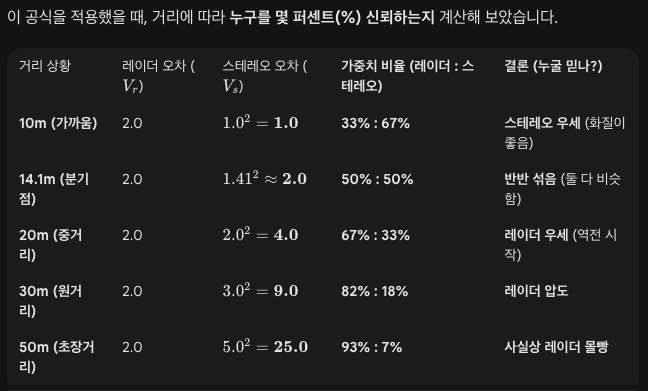

In [65]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "final_red_alert")
os.makedirs(DUAL_DIR, exist_ok=True)

# ★ 영상 설정
TARGET_FPS = 10

# ★ 안전 필터 설정 (사용자 요청 반영)
SAFE_DISTANCE_LIMIT = 50.0
MIN_BOX_HEIGHT_FOR_WARN = 40
MIN_APPROACH_SPEED = 0.1     # 보행자 감지를 위해 민감하게 설정
LANE_WIDTH_RATIO = 1.0       # 화면 전체 감지

# ★ 필터 설정
MAX_JUMP_PER_FRAME = 3.0
WARNING_PERSISTENCE = 1      # 1로 설정하여 즉시 빨간불 뜨게 함 (딜레이 없음)

# ==========================================
# 2. 칼만 필터
# ==========================================
class GatedKalmanFilter:
    def __init__(self, initial_dist, dt=0.1):
        self.x = np.array([initial_dist, 0.0])
        self.P = np.eye(2) * 100.0
        self.F = np.array([[1, dt], [0, 1]])
        self.H = np.array([1, 0])
        self.R = 5.0
        self.Q = np.array([[0.1, 0], [0, 0.1]])
        self.missed_frames = 0

    def predict(self, dt):
        self.F[0, 1] = dt
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[0]

    def update(self, z):
        if z is None or np.isnan(z):
            self.missed_frames += 1
            return self.x[0]
        predicted_dist = self.x[0]
        jump = abs(z - predicted_dist)
        if self.missed_frames < 5 and jump > MAX_JUMP_PER_FRAME:
            self.missed_frames += 1
            return predicted_dist
        self.missed_frames = 0
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, self.H.T) / S
        y = z - np.dot(self.H, self.x)
        self.x = self.x + K * y
        self.P = np.dot((np.eye(2) - np.outer(K, self.H)), self.P)
        return self.x[0]

    def get_velocity(self):
        return self.x[1]

# ==========================================
# 3. 유틸리티 & 퓨전 함수
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0: return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

def is_in_my_lane(x1, x2, img_w):
    box_center_x = (x1 + x2) / 2
    limit = (img_w * LANE_WIDTH_RATIO) / 2
    return abs(box_center_x - img_w / 2) < limit

def fuse_measurements(r_dist, s_dist):
    if r_dist is None and s_dist is None: return None
    if r_dist is None: return s_dist
    if s_dist is None: return r_dist
    var_radar = 2.0
    var_stereo = (s_dist * 0.1) ** 2
    w_r = 1.0 / var_radar
    w_s = 1.0 / (var_stereo + 1e-6)
    fused_dist = (r_dist * w_r + s_dist * w_s) / (w_r + w_s)
    return fused_dist

# ★★★ 핵심 수정: 위험도 판단 로직 변경 ★★★
def get_base_risk(dist, velocity, x1, x2, img_w, box_h=100):
    # 1. 예외 (데이터 없음 / 너무 멈 / 너무 작음)
    if dist is None or np.isnan(dist) or np.isinf(dist): return 0, "N/A"
    if dist >= SAFE_DISTANCE_LIMIT: return 0, "SAFE"
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN: return 0, "SAFE(Err)"

    # 2. [최우선] 거리 10m 이내면 무조건 빨강 (WARN)
    # 정지해 있든, 옆에 있든 상관없이 10m 안이면 무조건 위험!
    if dist < 10.0:
        return 2, "WARN"

    # 3. 그 외 (10m ~ 20m 구간)
    # 여기서부터는 정지 물체나 옆차선 물체는 봐줌
    approach_speed = -velocity
    if approach_speed < MIN_APPROACH_SPEED: return 0, "STATIC" # 멈춰있으면 초록
    if not is_in_my_lane(x1, x2, img_w): return 0, "SIDE"      # 옆에 있으면 초록

    # 4. 10m~20m 사이이고 움직이면 주의 (CAUTION)
    if dist < 20.0:
        return 1, "CAUTION"

    return 0, "SAFE"

# ==========================================
# 4. 파이프라인
# ==========================================
risk_persistence = {}

def attach_info_fusion(dets, curr_time_s, prev_dets, prev_time_s, img_h, img_w, iou_thr=0.30):
    global risk_persistence
    out = []
    max_risk_frame = 0
    dt = 0.1
    if prev_time_s and curr_time_s:
        dt = float(curr_time_s - prev_time_s)
        if dt <= 0: dt = 0.1

    for d in dets:
        if is_bonnet(d, img_h): continue
        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        prev_d, _ = match_prev_det(d, prev_dets, iou_thr)

        if prev_d and "track_id" in prev_d: track_id = prev_d["track_id"]
        else: track_id = hash(f"{x1}{y1}{curr_time_s}")

        r_raw = d.get("radar_dist_m")
        s_raw = d.get("stereo_dist_m")
        z_fused = fuse_measurements(r_raw, s_raw)

        kf = prev_d["kf_fused"] if (prev_d and "kf_fused" in prev_d) else GatedKalmanFilter(z_fused if z_fused else 50.0, dt)
        kf.predict(dt)
        fused_dist = kf.update(z_fused)
        fused_vel = kf.get_velocity()

        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        risk, status_txt = get_base_risk(fused_dist, fused_vel, x1, x2, img_w, box_h)

        # Persistence Check
        if track_id not in risk_persistence: risk_persistence[track_id] = 0
        if risk > 0: risk_persistence[track_id] += 1
        else: risk_persistence[track_id] = 0

        final_risk = 0
        if risk_persistence[track_id] >= WARNING_PERSISTENCE:
            final_risk = risk

        # 색상 결정
        if final_risk == 2:      # WARN (빨강)
            color = (0, 0, 255)  # RGB에서는 Red, OpenCV BGR에서는 (0,0,255)
            status_txt = "WARN"  # 강제 표시
        elif final_risk == 1:    # CAUTION (노랑)
            color = (0, 255, 255)
        elif status_txt == "SIDE":
            color = (0, 255, 0)
        elif status_txt == "STATIC":
            color = (0, 255, 0)
        else:
            status_txt = "SAFE"
            color = (0, 255, 0)

        max_risk_frame = max(max_risk_frame, final_risk)

        dd = dict(d)
        dd["fused_dist"] = fused_dist
        dd["kf_fused"] = kf
        dd["track_id"] = track_id
        dd["vis_color"] = color
        dd["vis_txt"] = f"{cls} {status_txt} {fused_dist:.1f}m"
        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수
# ==========================================
def draw_fusion_result(img_gray, dets):
    if len(img_gray.shape) == 2:
        bgr = cv2.cvtColor(img_gray.copy(), cv2.COLOR_GRAY2BGR)
    else:
        bgr = cv2.cvtColor(img_gray.copy(), cv2.COLOR_RGB2BGR)

    for d in dets:
        # 값이 없으면 그리지 않음
        dist = d.get("fused_dist")
        if dist is None or np.isnan(dist): continue

        color = d.get("vis_color", (0, 255, 0))
        label = "[Fusion] " + d.get("vis_txt")

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(bgr, (x1, y1 - 20), (x1 + w, y1), color, -1)
        cv2.putText(bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)

    return bgr

# ==========================================
# 6. 메인 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
start_idx = 0
step = 1
end_idx = min(start_idx + 1800, len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

print(f"▶ [Red Alert Mode] 10m 이내 무조건 빨간색 표시 (FPS: {TARGET_FPS})")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    frame = get_frame(DATA_ROOT, int(t))

    # 단순 Undistort (흑백 유지 - 안정성)
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)

    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # Fusion Pipeline
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_fused, max_risk = attach_info_fusion(dets, curr_time_s, prev_dets, prev_time_s,
                                              img_h=left_u.shape[0], img_w=left_u.shape[1])

    # Audio Sync
    duration = 1.0 / TARGET_FPS
    if max_risk == 2:   tone = generate_tone(1000, duration, volume=0.5)
    elif max_risk == 1: tone = generate_tone(500, duration, volume=0.3)
    else:               tone = generate_tone(0, duration)
    audio_buffer.append(tone)

    # Draw
    vis_fusion = draw_fusion_result(left_u, dets_fused)
    cv2.putText(vis_fusion, f"Fusion vision Mode ({TARGET_FPS} FPS)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_fusion)

    state = {"prev_dets": dets_fused, "prev_time_s": curr_time_s}

▶ [Red Alert Mode] 10m 이내 무조건 빨간색 표시 (FPS: 10)


#### 영상 변환

In [68]:
full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "final_red_alert.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_Fusion.mp4")

!ffmpeg -y -framerate {TARGET_FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 빨간맛 영상 생성 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

## [센서 퓨전]중앙 차선에 관해서 정지차량 탐지 로직 추가

- 중앙 차선 감지: LANE_WIDTH_RATIO = 0.3 (화면 중앙 30% 영역) 안에 들어왔는가?

- 정차 확인: 접근 속도가 0.5 m/s 미만인가? (거리가 줄어들지 않고 유지됨)

- 결과: 위 두 조건을 만족하면 거리가 3m여도 SAFE(초록색) 처리.

---

> 이제 이렇게 바뀝니다차가 달리다가 앞차 꽁무니에 붙어서 멈추면?이전: 거리 5m! WARN! 삐- 삐- (시끄러움)지금: 거리 5m지만... 속도 0이네? $\rightarrow$ [Fusion] STOPPED 5.0m (초록색, 조용함) 🤫

In [ ]:
import os, glob
import cv2
import numpy as np
from scipy.io import wavfile
from IPython.display import Video

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "final_traffic_jam_assist")
os.makedirs(DUAL_DIR, exist_ok=True)

# ★ 영상 설정
TARGET_FPS = 10

# ★ 안전 필터 설정
SAFE_DISTANCE_LIMIT = 50.0
MIN_BOX_HEIGHT_FOR_WARN = 40
MIN_APPROACH_SPEED = 0.1     # 기본 움직임 감지 역치
LANE_WIDTH_RATIO = 0.3       # ★ 내 정면(중앙 30%) 집중 감시

# ★ 필터 설정
MAX_JUMP_PER_FRAME = 3.0
WARNING_PERSISTENCE = 1      # 즉시 반응

# ==========================================
# 2. 칼만 필터
# ==========================================
class GatedKalmanFilter:
    def __init__(self, initial_dist, dt=0.1):
        self.x = np.array([initial_dist, 0.0])
        self.P = np.eye(2) * 100.0
        self.F = np.array([[1, dt], [0, 1]])
        self.H = np.array([1, 0])
        self.R = 5.0
        self.Q = np.array([[0.1, 0], [0, 0.1]])
        self.missed_frames = 0

    def predict(self, dt):
        self.F[0, 1] = dt
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x[0]

    def update(self, z):
        if z is None or np.isnan(z):
            self.missed_frames += 1
            return self.x[0]
        predicted_dist = self.x[0]
        jump = abs(z - predicted_dist)
        if self.missed_frames < 5 and jump > MAX_JUMP_PER_FRAME:
            self.missed_frames += 1
            return predicted_dist
        self.missed_frames = 0
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(self.P, self.H.T) / S
        y = z - np.dot(self.H, self.x)
        self.x = self.x + K * y
        self.P = np.dot((np.eye(2) - np.outer(K, self.H)), self.P)
        return self.x[0]

    def get_velocity(self):
        return self.x[1]

# ==========================================
# 3. 유틸리티 & 퓨전 함수
# ==========================================
def generate_tone(frequency, duration_sec, sample_rate=44100, volume=0.5):
    t = np.linspace(0, duration_sec, int(sample_rate * duration_sec), endpoint=False)
    if frequency == 0: return np.zeros_like(t)
    return volume * np.sin(2 * np.pi * frequency * t)

def is_bonnet(d, img_h):
    x1, y1, x2, y2 = map(int, d['xyxy'])
    if y2 > img_h * 0.90: return True
    return False

def is_in_my_lane(x1, x2, img_w):
    box_center_x = (x1 + x2) / 2
    limit = (img_w * LANE_WIDTH_RATIO) / 2
    return abs(box_center_x - img_w / 2) < limit

def fuse_measurements(r_dist, s_dist):
    if r_dist is None and s_dist is None: return None
    if r_dist is None: return s_dist
    if s_dist is None: return r_dist
    var_radar = 2.0
    var_stereo = (s_dist * 0.1) ** 2
    w_r = 1.0 / var_radar
    w_s = 1.0 / (var_stereo + 1e-6)
    fused_dist = (r_dist * w_r + s_dist * w_s) / (w_r + w_s)
    return fused_dist

# ★★★ 핵심 수정: 정차 예외 처리 로직 추가 ★★★
def get_base_risk(dist, velocity, x1, x2, img_w, box_h=100):
    # 1. 예외
    if dist is None or np.isnan(dist) or np.isinf(dist): return 0, "N/A"
    if dist >= SAFE_DISTANCE_LIMIT: return 0, "SAFE"
    if dist < 20.0 and box_h < MIN_BOX_HEIGHT_FOR_WARN: return 0, "SAFE(Err)"

    # 접근 속도 계산 (-velocity가 클수록 빨리 다가오는 것)
    approach_speed = -velocity

    # 2. ★ [NEW] 정차 중인 앞차 예외 처리 (Traffic Jam Assist)
    # 조건: 내 차선(중앙)에 있고 + 거리는 가깝지만 + 접근 속도가 거의 0임 (0.5 m/s 미만)
    in_center = is_in_my_lane(x1, x2, img_w)

    if in_center and dist < 15.0 and approach_speed < 0.5:
        # 가깝지만 속도 차이가 없음 -> 같이 멈춰있거나 같은 속도로 주행 중
        return 0, "STOPPED" # 초록색

    # 3. 거리 10m 이내면 무조건 빨강 (위의 정차 예외를 통과하지 못한 경우만)
    if dist < 10.0:
        return 2, "WARN"

    # 4. 그 외 필터링
    if approach_speed < MIN_APPROACH_SPEED: return 0, "STATIC" # 움직임 없으면 무시
    if not in_center: return 0, "SIDE"      # 옆차선이면 무시

    # 5. 주의 구간
    if dist < 20.0:
        return 1, "CAUTION"

    return 0, "SAFE"

# ==========================================
# 4. 파이프라인
# ==========================================
risk_persistence = {}

def attach_info_fusion(dets, curr_time_s, prev_dets, prev_time_s, img_h, img_w, iou_thr=0.30):
    global risk_persistence
    out = []
    max_risk_frame = 0
    dt = 0.1
    if prev_time_s and curr_time_s:
        dt = float(curr_time_s - prev_time_s)
        if dt <= 0: dt = 0.1

    for d in dets:
        if is_bonnet(d, img_h): continue
        x1, y1, x2, y2 = map(int, d['xyxy'])
        box_h = y2 - y1

        prev_d, _ = match_prev_det(d, prev_dets, iou_thr)

        if prev_d and "track_id" in prev_d: track_id = prev_d["track_id"]
        else: track_id = hash(f"{x1}{y1}{curr_time_s}")

        r_raw = d.get("radar_dist_m")
        s_raw = d.get("stereo_dist_m")
        z_fused = fuse_measurements(r_raw, s_raw)

        kf = prev_d["kf_fused"] if (prev_d and "kf_fused" in prev_d) else GatedKalmanFilter(z_fused if z_fused else 50.0, dt)
        kf.predict(dt)
        fused_dist = kf.update(z_fused)
        fused_vel = kf.get_velocity()

        cls = d.get("cls_name", "Obj")
        conf = d.get("conf", 0.0)

        risk, status_txt = get_base_risk(fused_dist, fused_vel, x1, x2, img_w, box_h)

        # Persistence Check
        if track_id not in risk_persistence: risk_persistence[track_id] = 0
        if risk > 0: risk_persistence[track_id] += 1
        else: risk_persistence[track_id] = 0

        final_risk = 0
        if risk_persistence[track_id] >= WARNING_PERSISTENCE:
            final_risk = risk

        # 색상 결정
        if status_txt == "STOPPED": color = (0, 255, 0) # 정차 중 -> 초록
        elif final_risk == 2:
            color = (0, 0, 255)
            status_txt = "WARN"
        elif final_risk == 1:
            color = (0, 255, 255)
        elif status_txt == "SIDE":
            color = (0, 255, 0)
        elif status_txt == "STATIC":
            color = (0, 255, 0)
        else:
            status_txt = "SAFE"
            color = (0, 255, 0)

        max_risk_frame = max(max_risk_frame, final_risk)

        dd = dict(d)
        dd["fused_dist"] = fused_dist
        dd["kf_fused"] = kf
        dd["track_id"] = track_id
        dd["vis_color"] = color
        dd["vis_txt"] = f"{cls} {status_txt} {fused_dist:.1f}m"
        out.append(dd)

    return out, max_risk_frame

# ==========================================
# 5. 그리기 함수
# ==========================================
def draw_fusion_result(img_gray, dets):
    if len(img_gray.shape) == 2:
        bgr = cv2.cvtColor(img_gray.copy(), cv2.COLOR_GRAY2BGR)
    else:
        bgr = cv2.cvtColor(img_gray.copy(), cv2.COLOR_RGB2BGR)

    for d in dets:
        dist = d.get("fused_dist")
        if dist is None or np.isnan(dist): continue

        color = d.get("vis_color", (0, 255, 0))
        label = "[Fusion] " + d.get("vis_txt")

        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(bgr, (x1, y1), (x2, y2), color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(bgr, (x1, y1 - 20), (x1 + w, y1), color, -1)
        cv2.putText(bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)

    return bgr

# ==========================================
# 6. 메인 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
start_idx = 0
step = 1
end_idx = min(start_idx + 1800, len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

print(f"▶ [Traffic Jam Assist] 정차 시 경고 해제 모드 (FPS: {TARGET_FPS})")

audio_buffer = []
state = None

for k, t in enumerate(ts_list):
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)

    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # Fusion Pipeline
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_fused, max_risk = attach_info_fusion(dets, curr_time_s, prev_dets, prev_time_s,
                                              img_h=left_u.shape[0], img_w=left_u.shape[1])

    # Audio Sync
    duration = 1.0 / TARGET_FPS
    if max_risk == 2:   tone = generate_tone(1000, duration, volume=0.5)
    elif max_risk == 1: tone = generate_tone(500, duration, volume=0.3)
    else:               tone = generate_tone(0, duration)
    audio_buffer.append(tone)

    # Draw
    vis_fusion = draw_fusion_result(left_u, dets_fused)
    cv2.putText(vis_fusion, f"Traffic Jam Mode ({TARGET_FPS} FPS)", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_fusion)

    state = {"prev_dets": dets_fused, "prev_time_s": curr_time_s}

▶ [Traffic Jam Assist] 정차 시 경고 해제 모드 (FPS: 10)


#### 영상 변환

In [71]:
full_audio = np.concatenate(audio_buffer)
wav_path = os.path.join(OUT_DIR, "traffic_jam.wav")
wav_data = (full_audio * 32767).astype(np.int16)
wavfile.write(wav_path, 44100, wav_data)

mp4_path = os.path.join(OUT_DIR, "Final_Traffic_Jam_Assist.mp4")

!ffmpeg -y -framerate {TARGET_FPS} -i {DUAL_DIR}/frame_%04d.png -i {wav_path} \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -c:a aac -shortest -movflags +faststart {mp4_path}

print(f"✅ 정차 보조 기능 적용 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

# 레이더 / 스테레오 따로 영상 추출하는 코드

[주의] - 최종(횡방향 필터) 고도화의 기법이 안들어간 상태임.

### 스테레오기반 영상 추출

In [54]:
import os, glob
import cv2
import numpy as np
from IPython.display import Video

# ==========================================
# 1. 저장 경로 설정
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
STEREO_DIR = os.path.join(OUT_DIR, "stereo_independent_final")
os.makedirs(STEREO_DIR, exist_ok=True)

# ==========================================
# 2. 독립적인 시각화 함수 (Stereo Only)
# ==========================================
def draw_stereo_only(img_rgb, dets):
    # 원본 이미지 복사 (깨끗한 도화지)
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    for d in dets:
        # 1) 스테레오 거리값만 쏙 빼옵니다. (Fusion 로직 무시)
        dist = d.get("stereo_dist_m")

        # 2) 거리 값이 없거나 이상하면 건너뜀 (혹은 회색 처리)
        if dist is None or np.isnan(dist):
            continue

        # 3) 님만의 독립적인 위험 감지 로직 (10m / 20m)
        if dist < 10.0:
            color = (0, 0, 255)       # 빨강 (위험)
            label = f"WARN! {dist:.1f}m"
        elif dist < 20.0:
            color = (0, 255, 255)     # 노랑 (주의)
            label = f"{dist:.1f}m"
        else:
            color = (0, 255, 0)       # 초록 (안전)
            label = f"{dist:.1f}m"

        # 4) 그리기
        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(img_bgr, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img_bgr, f"Stereo:{label}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return img_bgr

# ==========================================
# 3. 메인 루프 (영상 생성)
# ==========================================
# 타임스탬프 로드 (싱크를 맞추기 위해 레이더 기준 사용)
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

# 프레임 범위 설정 (1800장)
start_idx = 0
step = 1
end_idx = min(start_idx + 1800, len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

print(f"▶ [독립 모드] 스테레오 거리 기반 영상 생성 시작 (총 {len(ts_list)}장)...")

state = None
for k, t in enumerate(ts_list):
    # 1. 파이프라인 실행
    # (여기서 vis는 '섞인' 결과이므로 버리고, dets와 frame을 챙깁니다)
    vis_mixed, dets, state, control, frame_data = run_pipeline_once(
        DATA_ROOT, t,
        det_conf=0.25, det_iou=0.45, min_conf=0.30,
        prev_state=state
    )

    # 2. 깨끗한 원본 이미지 가져오기 (frame_data 안에 있음)
    # run_pipeline_once가 리턴해주는 frame_data['left_img']는 RGB 원본입니다.
    raw_img = frame_data['left_img']

    # 3. 스테레오 데이터만 사용하여 다시 그리기
    vis_stereo = draw_stereo_only(raw_img, dets)

    # 4. 저장
    out_png = os.path.join(STEREO_DIR, f"frame_{k:04d}.png")
    cv2.imwrite(out_png, vis_stereo)

print(f"프레임 저장 완료: {STEREO_DIR}")

▶ [독립 모드] 스테레오 거리 기반 영상 생성 시작 (총 252장)...
프레임 저장 완료: /content/robotcar_outputs/stereo_independent_final


#### 영상 추출 및 실행

In [56]:
# ==========================================
# 4. 동영상 변환 (ffmpeg)
# ==========================================
mp4_path = os.path.join(OUT_DIR, "video_stereo_independent.mp4")
fps = 10

!ffmpeg -y -framerate {fps} -i {STEREO_DIR}/frame_%04d.png \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -movflags +faststart {mp4_path}

print(f"영상 생성 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

### 레이더기반 영상 추출

- 퓨전된 결과(vis)를 버리고 레이더 값(radar_dist_m)만 강제로 가져와서 그리는 코드

In [62]:
import os, glob
import cv2
import numpy as np
from IPython.display import Video

# ==========================================
# 1. 저장 경로 설정 (레이더 전용 폴더)
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
RADAR_ONLY_DIR = os.path.join(OUT_DIR, "radar_independent_final")
os.makedirs(RADAR_ONLY_DIR, exist_ok=True)

# ==========================================
# 2. 순수 레이더 그리기 함수
# ==========================================
def draw_radar_only(img_rgb, dets):
    # 원본 이미지 복사
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    for d in dets:
        # ★ 핵심: 퓨전된 결과 무시하고 '레이더' 값만 꺼냄
        dist = d.get("radar_dist_m")

        # 레이더 값이 없으면(매칭 실패 등) 안 그림
        if dist is None or np.isnan(dist):
            continue

        # 위험 감지 로직 (10m / 20m)
        if dist < 10.0:
            color = (0, 0, 255)       # 빨강 (위험)
            label = f"WARN! {dist:.1f}m"
        elif dist < 20.0:
            color = (0, 255, 255)     # 노랑 (주의)
            label = f"{dist:.1f}m"
        else:
            color = (0, 255, 0)       # 초록 (안전)
            label = f"{dist:.1f}m"

        # 그리기
        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(img_bgr, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img_bgr, f"Radar:{label}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return img_bgr

# ==========================================
# 3. 메인 루프
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))

# 1800장 설정
start_idx = 0
step = 1
n_frames = 1800
end_idx = min(start_idx + (n_frames * step), len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

print(f"▶ [독립 모드] 레이더 거리 기반 영상 생성 시작 (총 {len(ts_list)}장)...")

state = None
for k, t in enumerate(ts_list):
    # 1. 파이프라인 실행
    # 반환되는 vis는 퓨전된 것이므로 버리고, dets와 frame 데이터를 챙깁니다.
    vis_mixed, dets, state, control, frame_data = run_pipeline_once(
        DATA_ROOT, t,
        det_conf=0.25, det_iou=0.45, min_conf=0.30,
        prev_state=state
    )

    # 2. 깨끗한 원본 이미지 가져오기
    raw_img = frame_data['left_img']

    # 3. 레이더 데이터만 사용하여 다시 그리기
    vis_radar = draw_radar_only(raw_img, dets)

    # 4. 저장
    cv2.imwrite(os.path.join(RADAR_ONLY_DIR, f"frame_{k:04d}.png"), vis_radar)

print(f"저장 완료: {RADAR_ONLY_DIR}")

▶ [독립 모드] 레이더 거리 기반 영상 생성 시작 (총 252장)...
저장 완료: /content/robotcar_outputs/radar_independent_final


#### 영상 실행

- fps = 10 : 재생용
- fps = 5 : 분석용(느림)

In [64]:

# ==========================================
# 4. 동영상 변환
# ==========================================
mp4_path = os.path.join(OUT_DIR, "video_radar_independent.mp4")
fps = 10

!ffmpeg -y -framerate {fps} -i {RADAR_ONLY_DIR}/frame_%04d.png \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -movflags +faststart {mp4_path}

print(f"영상 생성 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

#### 레이더 vs 스테레오 영상 생성

- 좌측은 기존 레이더 결과, 우측은 스테레오 거리 기반 결과
- *위험 감지 로직(10m/20m/색상)**을 양쪽에 동일하게 적용

In [61]:
import os, glob
import cv2
import numpy as np
from IPython.display import Video

# ==========================================
# 1. 공통 설정
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
RADAR_OUT = os.path.join(OUT_DIR, "video_radar_only")
STEREO_OUT = os.path.join(OUT_DIR, "video_stereo_only")
os.makedirs(RADAR_OUT, exist_ok=True)
os.makedirs(STEREO_OUT, exist_ok=True)

# 1800장 설정
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
start_idx = 0
step = 1
n_frames = 1800
end_idx = min(start_idx + n_frames, len(radar_ts))
ts_list = radar_ts[start_idx : end_idx : step]

# ==========================================
# 2. 그리기 함수 (핵심: 퓨전 무시하고 특정 센서만 봄)
# ==========================================
def draw_sensor_specific(img_rgb, dets, mode="radar"):
    """
    mode: 'radar' 또는 'stereo'
    해당 모드의 거리값만 강제로 시각화합니다.
    """
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    for d in dets:
        # ★ 핵심: 퓨전된 결과(dist_m)를 무시하고 원본 값을 직접 꺼냄
        if mode == "radar":
            dist = d.get("radar_dist_m")
            raw_src = "R"
        else:
            dist = d.get("stereo_dist_m")
            raw_src = "S"

        # 값이 없거나(None) 이상하면(NaN) 그리지 않음
        if dist is None or np.isnan(dist):
            continue

        # 위험도 판단 (독립적)
        if dist < 10.0:
            color = (0, 0, 255)       # 빨강 (위험)
            label = f"WARN! {dist:.1f}m"
        elif dist < 20.0:
            color = (0, 255, 255)     # 노랑 (주의)
            label = f"{dist:.1f}m"
        else:
            color = (0, 255, 0)       # 초록 (안전)
            label = f"{dist:.1f}m"

        # 박스 그리기
        x1, y1, x2, y2 = map(int, d['xyxy'])
        cv2.rectangle(img_bgr, (x1, y1), (x2, y2), color, 2)

        # 텍스트: 어떤 센서인지 명시 (R: Radar, S: Stereo)
        cv2.putText(img_bgr, f"{raw_src}:{label}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return img_bgr

# ==========================================
# 3. 메인 루프 (한 번 돌려서 두 가지 영상 소스 저장)
# ==========================================
print(f"▶ 독립 비교 영상 생성 시작 (총 {len(ts_list)}장)...")
state = None

for k, t in enumerate(ts_list):
    # 파이프라인은 한 번만 실행 (데이터 계산용)
    # 여기서 vis, control 등은 퓨전 결과이므로 안 씁니다.
    _, dets, state, _, frame_data = run_pipeline_once(
        DATA_ROOT, t,
        det_conf=0.25, det_iou=0.45, min_conf=0.30,
        prev_state=state
    )

    # 원본 이미지 가져오기
    raw_img = frame_data['left_img']

    # [1] 레이더 전용 이미지 생성
    vis_radar = draw_sensor_specific(raw_img, dets, mode="radar")
    cv2.imwrite(os.path.join(RADAR_OUT, f"frame_{k:04d}.png"), vis_radar)

    # [2] 스테레오 전용 이미지 생성
    vis_stereo = draw_sensor_specific(raw_img, dets, mode="stereo")
    cv2.imwrite(os.path.join(STEREO_OUT, f"frame_{k:04d}.png"), vis_stereo)

    if k % 100 == 0:
        print(f"Processed {k}/{len(ts_list)}...")

# ==========================================
# 4. 동영상 변환 (2개 생성)
# ==========================================
fps = 10

# 1) 레이더 영상 만들기
mp4_radar = os.path.join(OUT_DIR, "Independent_Radar_Only.mp4")
print("Generating Radar Video...")
!ffmpeg -y -framerate {fps} -i {RADAR_OUT}/frame_%04d.png \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -movflags +faststart {mp4_radar}

# 2) 스테레오 영상 만들기
mp4_stereo = os.path.join(OUT_DIR, "Independent_Stereo_Only.mp4")
print("Generating Stereo Video...")
!ffmpeg -y -framerate {fps} -i {STEREO_OUT}/frame_%04d.png \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -movflags +faststart {mp4_stereo}

print("\n===== 완료! =====")
print(f"1. 레이더 영상: {mp4_radar}")
print(f"2. 스테레오 영상: {mp4_stereo}")

# 하나만 미리보기 (원하시면 파일명 바꿔서 다시 실행)
Video(mp4_radar, embed=True)

Output hidden; open in https://colab.research.google.com to view.

In [60]:
from IPython.display import Video
import os

fps = 10
# 1) 저장할 경로 설정 (합쳐진 영상)
mp4_merged = os.path.join(OUT_DIR, "Comparison_SideBySide.mp4")

print("▶ 두 영상을 하나로 합치는 중입니다 (Side-by-Side)...")

# 2) ffmpeg hstack 명령어로 좌우 결합
# -filter_complex hstack: 가로로 붙이기
!ffmpeg -y -i {mp4_radar} -i {mp4_stereo} \
    -filter_complex "[0:v][1:v]hstack=inputs=2[v]" \
    -map "[v]" \
    -c:v libx264 -pix_fmt yuv420p -movflags +faststart {mp4_merged}

print(f"\n✅ 최종 비교 영상 생성 완료: {mp4_merged}")

# 3) 재생 (왼쪽: 레이더 / 오른쪽: 스테레오)
Video(mp4_merged, embed=True)

Output hidden; open in https://colab.research.google.com to view.

#### 영상 변환

In [50]:
# ==========================================
# 3. 동영상 저장 (ffmpeg 에러 방지 포함)
# ==========================================
mp4_path = os.path.join(OUT_DIR, "radar_vs_stereo_fixed.mp4")
fps = 10

# 'pad=ceil(iw/2)*2...' 옵션을 넣어 홀수 해상도 에러를 자동 해결합니다.
!ffmpeg -y -framerate {fps} -i {COMPARE_DIR}/frame_%04d.png \
  -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" \
  -c:v libx264 -pix_fmt yuv420p -movflags +faststart {mp4_path}

print(f"\n✅ 영상 생성 완료: {mp4_path}")
Video(mp4_path, embed=True)

Output hidden; open in https://colab.research.google.com to view.

# 평가

### GPT가 짜준 코드

▶ 설정 확인: Alpha=0.3, Spike Threshold=1.0m, Trend Window=21
⚠️ 기존 결과 변수를 찾지 못했습니다. 파이프라인 재실행을 시도합니다...
▶ 파이프라인 재실행 중... (Max 100 frames)
✅ 재실행 완료. 100 프레임 수집됨.

📊 [1] 센서별 안정성 비교 테이블 (Mean/Median)


mad_abs_dr           p95_abs_dr           spike_rate_dd            \
                  mean    median       mean    median          mean    median   
sensor mode                                                                     
radar  filt   0.330570  0.262297   2.992670  1.821112      0.141887  0.000000   
       raw    0.333257  0.216000   8.571395  3.319920      0.328527  0.333333   
stereo filt   0.708146  0.454418   3.296064  2.420982      0.266711  0.000000   
       raw    2.015548  0.590916   8.114644  4.581931      0.532451  0.562500   

            trend_resid_mad            
                       mean    median  
sensor mode                            
radar  filt        2.050277  2.050277  
       raw         3.302743  3.302743  
stereo filt        4.771908  4.771908  
       raw         3.974512  3.974512


📊 [2] 거리 구간별 요약 테이블 (Median 기준)


mad_abs_dr  p95_abs_dr  spike_rate_dd  trend_resid_mad
sensor mode dist_bin                                                        
radar  filt [10–20)     0.370797    1.887039       0.000000              NaN
            [20–40)     0.237231    1.605518       0.000000              NaN
            [40–80)     0.262297    1.821112       0.074074         2.050277
            [80–200)    0.616269    2.207087       0.555556              NaN
       raw  [10–20)     0.324000    2.263680       0.050000              NaN
            [20–40)     0.216000    2.211840       0.000000              NaN
            [40–80)     0.172800    4.637520       0.333333         3.302743
            [80–200)    1.382400   10.212480       0.666667              NaN
stereo filt [10–20)     0.502477    2.342596       0.000000              NaN
            [20–40)     0.425805    1.640356       0.000000              NaN
            [40–80)     0.691371    3.149778       0.375000         4.771908
            [80–200)    1.437125    6.738594       0.777778              NaN
       raw  [10–20)     0.635430    3.220347       0.293750              NaN
            [20–40)     0.289800    2.837565       0.333333              NaN
            [40–80)     1.022658    7.191085       0.666667         3.974512
            [80–200)    2.395294   12.049712       0.777778              NaN

/tmp/ipython-input-1534355137.py:335: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_data = df.groupby("track_id").apply(lambda x: pd.DataFrame({
/tmp/ipython-input-1534355137.py:349: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filt_data = df.groupby("track_id").apply(lambda x: pd.DataFrame({


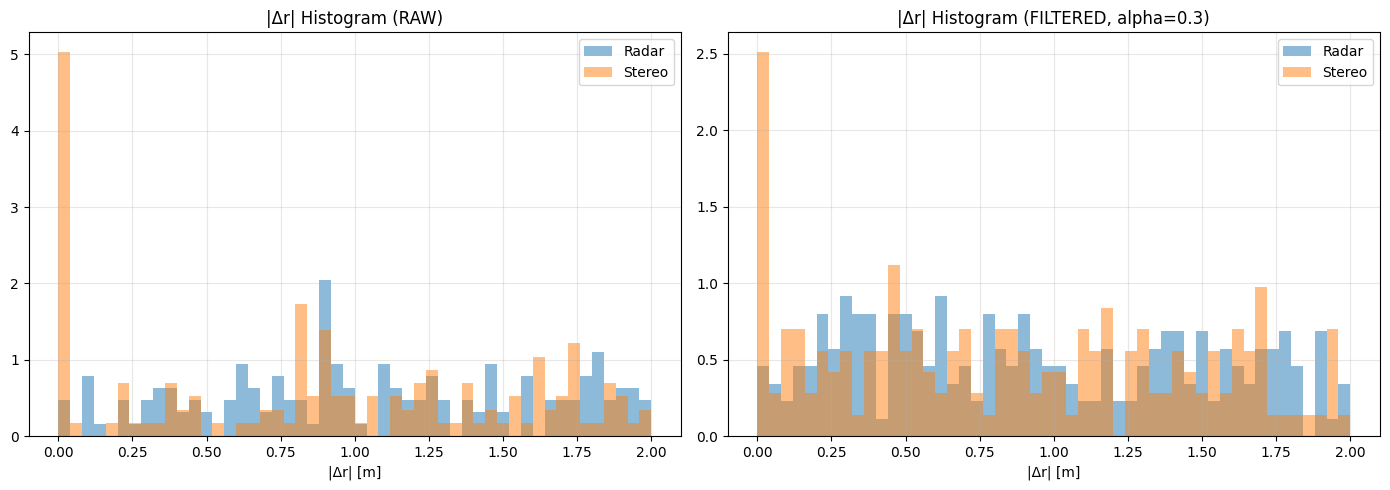

In [118]:
# @title [최종] 멀티센서 거리 안정성 정밀 평가 (Auto-Detect)
# ============================================================
# 목적: 레이더 vs 스테레오 거리 안정성(Stability) 비교 평가
# 특징:
# 1. 기존 파이프라인 변수(dets_seq 등) 자동 탐색
# 2. 데이터 부재 시, 기존 함수(get_frame, detect 등)를 찾아 자동 재실행
# 3. 요구된 모든 안정성 지표(MAD, Spike, Trend Resid) 및 시각화 포함
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# -----------------------------
# 1. 유틸리티 및 통계 함수
# -----------------------------
def _get_first_existing(names, default=None):
    """전역 변수 중 존재하는 첫 번째 값을 반환"""
    for n in names:
        if n in globals() and globals()[n] is not None:
            return globals()[n]
    return default

def _resolve_func(candidates):
    """함수 이름 리스트 중 실행 가능한 첫 번째 함수 반환"""
    for n in candidates:
        f = globals().get(n, None)
        if callable(f):
            return f, n
    return None, None

def _mad(x):
    """Median Absolute Deviation"""
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    if x.size == 0: return np.nan
    med = np.median(x)
    return np.median(np.abs(x - med))

def _p95(x):
    """95 Percentile"""
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    if x.size == 0: return np.nan
    return float(np.percentile(x, 95))

def _ema_filter(values, alpha=0.4):
    """Exponential Moving Average (NaN safe)"""
    v = np.asarray(values, dtype=float)
    out = np.full_like(v, np.nan, dtype=float)
    prev = np.nan
    for i in range(len(v)):
        if not np.isfinite(v[i]):
            out[i] = prev # Keep previous value or NaN
            continue
        if not np.isfinite(prev):
            prev = v[i]
        else:
            prev = alpha * v[i] + (1 - alpha) * prev
        out[i] = prev
    return out

def _trend_residual_mad(t, r, win=11):
    """Sliding Window Linear Regression 후 Residual의 MAD 계산"""
    t = np.asarray(t, dtype=float)
    r = np.asarray(r, dtype=float)
    m = np.isfinite(t) & np.isfinite(r)
    t, r = t[m], r[m]
    n = len(r)
    if n < max(5, win): return np.nan # 데이터 부족

    if win % 2 == 0: win += 1
    half = win // 2
    resid = []

    # 윈도우 단위로 회귀분석 수행
    for i in range(n):
        lo = max(0, i - half)
        hi = min(n, i + half + 1)
        tt = t[lo:hi]
        rr = r[lo:hi]
        if len(rr) < 3: continue

        # Linear Regression (Least Squares)
        A = np.vstack([tt, np.ones_like(tt)]).T
        try:
            coef, *_ = np.linalg.lstsq(A, rr, rcond=None)
            pred = coef[0]*t[i] + coef[1] # 현재 시점의 추세값
            resid.append(r[i] - pred)     # 잔차
        except Exception:
            continue

    return _mad(resid) if resid else np.nan

# -----------------------------
# 2. 설정 및 데이터 확보 (자동 탐색 로직)
# -----------------------------
TAU = 1.0  # Spike threshold (m)
DIST_BINS = [(0,10), (10,20), (20,40), (40,80), (80,200)]
DIST_BIN_LABELS = [f"[{a}–{b})" for a,b in DIST_BINS]

# 파라미터 자동 탐색 (없으면 기본값)
EMA_ALPHA = _get_first_existing(["ALPHA", "EMA_ALPHA", "alpha", "ema_alpha"], default=0.4)
TREND_WIN = _get_first_existing(["TREND_WIN", "trend_win", "trend_window"], default=11)

print(f"▶ 설정 확인: Alpha={EMA_ALPHA}, Spike Threshold={TAU}m, Trend Window={TREND_WIN}")

# (A) 기존 결과 컨테이너 탐색
SEQ_CANDIDATES = ["dets_seq", "dets_list", "all_dets", "all_tracks", "frames_dets", "timeline_dets"]
TIME_CANDIDATES = ["time_seq", "t_seq", "ts_seq", "times_s", "frame_times_s"]

dets_seq = _get_first_existing(SEQ_CANDIDATES, default=None)
time_seq = _get_first_existing(TIME_CANDIDATES, default=None)

collected = None

# 프레임 리스트인지 확인하는 헬퍼
def _is_framepack_list(x):
    if not isinstance(x, list) or len(x) == 0: return False
    # Case 1: list of lists (dets)
    if isinstance(x[0], list): return True
    # Case 2: list of dicts with 'dets' key
    if isinstance(x[0], dict) and ("dets" in x[0] or "detections" in x[0]): return True
    return False

if _is_framepack_list(dets_seq):
    print(f"✅ 기존 결과 변수(길이: {len(dets_seq)})를 발견하여 데이터를 로드합니다.")
    tmp = []
    # 포맷 정규화: (time, dets) 튜플 리스트로 변환
    if isinstance(dets_seq[0], list):
        if isinstance(time_seq, (list, np.ndarray)) and len(time_seq) == len(dets_seq):
            for t, dets in zip(time_seq, dets_seq):
                tmp.append((float(t), dets))
        else:
            for k, dets in enumerate(dets_seq):
                tmp.append((float(k), dets))
    else:
        for k, pack in enumerate(dets_seq):
            dets = pack.get("dets", pack.get("detections", []))
            t = pack.get("time_s", pack.get("t", pack.get("ts", k)))
            tmp.append((float(t), dets))
    collected = tmp

else:
    # (B) 없으면 파이프라인 함수 찾아 재실행
    print("⚠️ 기존 결과 변수를 찾지 못했습니다. 파이프라인 재실행을 시도합니다...")
    ts_list = _get_first_existing(["ts_list", "radar_ts", "stereo_ts", "timestamps"], default=None)

    if ts_list is None:
        warnings.warn("❌ 'ts_list'조차 찾을 수 없어 평가를 진행할 수 없습니다.")
    else:
        # 함수 매핑
        get_frame_f, _ = _resolve_func(["get_frame"])
        detect_f, _ = _resolve_func(["detect_objects", "detect", "yolo_detect"])
        filter_f, _ = _resolve_func(["filter_dets", "filter_out_hood_dets"])
        attach_stereo_f, _ = _resolve_func(["attach_stereo_range_to_dets"])
        attach_radar_f, _ = _resolve_func(["attach_radar_range_to_dets_radar_only", "attach_radar_range_to_dets"])
        attach_info_f, _  = _resolve_func(["attach_info_final", "attach_info", "attach_tracking_info"])

        # 모델/캘리브레이션 변수
        undistort_left = _get_first_existing(["model_left"], default=None)
        undistort_right = _get_first_existing(["model_right"], default=None)
        get_fx_cx_f, _ = _resolve_func(["get_fx_and_cx"])
        disp_f, _ = _resolve_func(["compute_disparity_sgbm"])
        depth_f, _ = _resolve_func(["disparity_to_depth"])
        radar_polar_f, _ = _resolve_func(["load_radar_polar", "load_radar"])
        BASELINE_M = _get_first_existing(["BASELINE_M", "baseline_m"], default=None)

        # 필수 요소 검사
        required = [get_frame_f, detect_f, attach_stereo_f, attach_radar_f, attach_info_f, disp_f, depth_f, radar_polar_f]
        if any(x is None for x in required) or BASELINE_M is None:
             warnings.warn("❌ 필수 함수나 변수(모델 등)가 누락되어 재실행할 수 없습니다.")
        else:
            # 재실행 시작
            conf = _get_first_existing(["conf"], default=0.25)
            max_frames = min(len(ts_list), 100) # 시간 관계상 최대 100프레임만 (필요시 수정)
            print(f"▶ 파이프라인 재실행 중... (Max {max_frames} frames)")

            state = None
            tmp = []

            # DATA_ROOT 확인
            dr = _get_first_existing(["DATA_ROOT", "data_root"], default=None)

            for k in range(max_frames):
                t = ts_list[k]
                # get_frame 호출
                frame = get_frame_f(dr, int(t)) if dr else get_frame_f(None, int(t))

                # Undistort & Depth
                left_u  = undistort_left.undistort(frame["left_img"])
                right_u = undistort_right.undistort(frame["right_img"])
                fx = float(undistort_left.focal_length[0])
                disp = disp_f(left_u, right_u)
                depth = depth_f(disp, fx, BASELINE_M)

                # Detection
                dets = detect_f({"left_img": left_u, "right_img": right_u}, conf=conf, use_img="left")
                if filter_f:
                    try: dets = filter_f(dets)
                    except: pass

                # Attach Ranges
                dets = attach_stereo_f(dets, depth_m=depth)

                fx2, cx = get_fx_cx_f(undistort_left, left_u.shape[1])
                r_pol = radar_polar_f(dr, frame["t_radar"]) if dr else radar_polar_f(None, frame["t_radar"])
                dets = attach_radar_f(dets, r_pol, fx=fx2, cx=cx)

                # Tracking Info (Temporal Matching)
                curr_time_s = float(k) * 0.06 # 타임스탬프 없으면 대략 16Hz 가정
                if "t_stereo" in frame:
                    curr_time_s = float(frame["t_stereo"]) / 1e6

                prev_dets = state["prev_dets"] if state else []
                prev_time = state["prev_time_s"] if state else None

                dets_dual, _ = attach_info_f(dets, curr_time_s, prev_dets, prev_time, img_h=left_u.shape[0], img_w=left_u.shape[1])

                tmp.append((curr_time_s, dets_dual))
                state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}

            collected = tmp
            print(f"✅ 재실행 완료. {len(collected)} 프레임 수집됨.")

# -----------------------------
# 3. 데이터프레임 변환 및 필터링
# -----------------------------
if collected:
    rows = []
    for t, dets in collected:
        if not dets: continue
        for d in dets:
            # Track ID 확보
            tid = d.get("track_id", d.get("id", d.get("track", None)))
            if tid is None: continue # ID 없으면 분석 불가

            s_raw = d.get("stereo_dist_m", d.get("stereo_range_m", np.nan))
            r_raw = d.get("radar_dist_m", d.get("radar_range_m", np.nan))

            rows.append({
                "time": float(t),
                "track_id": tid,
                "stereo_raw": float(s_raw) if s_raw is not None else np.nan,
                "radar_raw": float(r_raw) if r_raw is not None else np.nan
            })

    df = pd.DataFrame(rows)

    if not df.empty:
        df = df.sort_values(["track_id", "time"]).reset_index(drop=True)

        # EMA Filtering 적용
        df["stereo_filt"] = df.groupby("track_id")["stereo_raw"].transform(lambda x: _ema_filter(x.values, EMA_ALPHA))
        df["radar_filt"] = df.groupby("track_id")["radar_raw"].transform(lambda x: _ema_filter(x.values, EMA_ALPHA))

        # 거리 구간(Bin) 할당 (Track Median 기준)
        track_stats = df.groupby("track_id")[["stereo_raw", "radar_raw"]].median()
        track_stats["ref_dist"] = track_stats.mean(axis=1) # 두 센서 평균값으로 구간 결정

        def get_bin(d):
            if np.isnan(d): return np.nan
            for (a,b), lab in zip(DIST_BINS, DIST_BIN_LABELS):
                if a <= d < b: return lab
            return np.nan

        track_bin_map = track_stats["ref_dist"].apply(get_bin)
        df["dist_bin"] = df["track_id"].map(track_bin_map)

        # -----------------------------
        # 4. 안정성 지표 계산 (Track 단위)
        # -----------------------------
        METRICS = ["mad_abs_dr", "p95_abs_dr", "spike_rate_dd", "trend_resid_mad"]

        def calc_track_metrics(t, r):
            # t: time, r: range
            t, r = np.array(t), np.array(r)
            mask = np.isfinite(r)
            t, r = t[mask], r[mask]

            res = {m: np.nan for m in METRICS}
            if len(r) < 4: return res

            # 1) Delta r
            dr = np.diff(r)
            abs_dr = np.abs(dr)
            res["mad_abs_dr"] = _mad(abs_dr)
            res["p95_abs_dr"] = _p95(abs_dr)

            # 2) Spike (2nd deriv)
            dd = r[2:] - 2*r[1:-1] + r[:-2]
            res["spike_rate_dd"] = np.mean(np.abs(dd) > TAU)

            # 3) Trend Residual
            res["trend_resid_mad"] = _trend_residual_mad(t, r, win=TREND_WIN)
            return res

        results = []
        for (tid, bin_label), group in df.groupby(["track_id", "dist_bin"]):
            if len(group) < 5: continue

            # 4가지 조합 계산
            for sens in ["radar", "stereo"]:
                for mode in ["raw", "filt"]:
                    col = f"{sens}_{mode}"
                    m = calc_track_metrics(group["time"], group[col])
                    m.update({"sensor": sens, "mode": mode, "dist_bin": bin_label})
                    results.append(m)

        res_df = pd.DataFrame(results)

        # -----------------------------
        # 5. 최종 출력
        # -----------------------------
        if not res_df.empty:
            # (1) 센서별 안정성 비교 테이블
            summary = res_df.groupby(["sensor", "mode"])[METRICS].agg(["mean", "median"])
            print("\n📊 [1] 센서별 안정성 비교 테이블 (Mean/Median)")
            display(summary)

            # (2) 거리 구간별 요약 테이블
            print("\n📊 [2] 거리 구간별 요약 테이블 (Median 기준)")
            bin_summary = res_df.groupby(["sensor", "mode", "dist_bin"])[METRICS].median()
            # 보기 좋게 정렬
            bin_summary = bin_summary.reindex(DIST_BIN_LABELS, level="dist_bin")
            display(bin_summary)

            # (3) 히스토그램 시각화 (|Δr|)
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))

            # RAW
            ax = axes[0]
            raw_data = df.groupby("track_id").apply(lambda x: pd.DataFrame({
                "radar": np.abs(np.diff(x["radar_raw"])),
                "stereo": np.abs(np.diff(x["stereo_raw"]))
            })).reset_index(drop=True)

            ax.hist(raw_data["radar"].dropna(), bins=50, alpha=0.5, density=True, range=(0,2), label="Radar")
            ax.hist(raw_data["stereo"].dropna(), bins=50, alpha=0.5, density=True, range=(0,2), label="Stereo")
            ax.set_title(f"|Δr| Histogram (RAW)")
            ax.set_xlabel("|Δr| [m]")
            ax.legend()
            ax.grid(alpha=0.3)

            # FILTERED
            ax = axes[1]
            filt_data = df.groupby("track_id").apply(lambda x: pd.DataFrame({
                "radar": np.abs(np.diff(x["radar_filt"])),
                "stereo": np.abs(np.diff(x["stereo_filt"]))
            })).reset_index(drop=True)

            ax.hist(filt_data["radar"].dropna(), bins=50, alpha=0.5, density=True, range=(0,2), label="Radar")
            ax.hist(filt_data["stereo"].dropna(), bins=50, alpha=0.5, density=True, range=(0,2), label="Stereo")
            ax.set_title(f"|Δr| Histogram (FILTERED, alpha={EMA_ALPHA})")
            ax.set_xlabel("|Δr| [m]")
            ax.legend()
            ax.grid(alpha=0.3)

            plt.tight_layout()
            plt.show()

        else:
            print("⚠️ 통계를 산출할 유효한 트랙 데이터가 부족합니다.")
    else:
        print("⚠️ 데이터프레임을 생성했으나 내용이 비어있습니다.")
else:
    print("❌ 최종적으로 데이터를 확보하지 못했습니다.")

## 평가

> 기존 process_and_draw 함수를 확장하여 평가 데이터를 수집할 수 있도록 수정한 코드입니다. 이 코드를 실행하여 데이터를 모은 뒤 그래프를 그림



- 상관계수(Correlation)가 1에 가까울수록: 두 센서가 매우 일관되게 거리를 측정하고 있다는 뜻입니다. (신뢰도 높음)

- MAE(평균 차이)가 작을수록: 두 센서 간의 스케일(Scale)이나 보정(Calibration)이 잘 맞다는 뜻입니다.

- 오차 분포(Histogram)가 0을 중심으로 좁게 모여있으면: 시스템이 안정적임을 의미합니다. 만약 한쪽으로 치우쳐 있다면(Bias), 특정 센서의 보정이 필요하다는 신호입니다.

In [111]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리기용
from IPython.display import Video

# ==========================================
# 0. 평가를 위한 변수 초기화 (루프 시작 전)
# ==========================================
eval_data = {
    'radar': [],
    'stereo': []
}

# ==========================================
# 1. 설정 및 경로
# ==========================================
OUT_DIR = "/content/robotcar_outputs"
DUAL_DIR = os.path.join(OUT_DIR, "dual_comparison_fixed")
os.makedirs(DUAL_DIR, exist_ok=True)

# ... (기존 is_bonnet, get_risk_color_and_label, attach_info_dual, draw_sensor_mode 함수들은 그대로 유지) ...

# ==========================================
# 5. 메인 루프 실행
# ==========================================
radar_ts = load_timestamps(os.path.join(DATA_ROOT, "radar.timestamps"))
ts_list = radar_ts[0:1800:1]

print(f"▶ 본넷 제거 & 로직 수정된 영상 생성 시작 ({len(ts_list)}장)...")

state = None
for k, t in enumerate(ts_list):
    # (A) 파이프라인 기본 실행
    frame = get_frame(DATA_ROOT, int(t))
    left_u = model_left.undistort(frame["left_img"])
    right_u = model_right.undistort(frame["right_img"])

    # Depth & YOLO
    fx = float(model_left.focal_length[0])
    disp = compute_disparity_sgbm(left_u, right_u)
    depth = disparity_to_depth(disp, fx, BASELINE_M)

    dets = detect_objects({"left_img": left_u, "right_img": right_u}, conf=0.25, iou=0.45, max_det=50, use_img="left")
    dets = filter_dets(dets, min_conf=0.30)

    # 거리 Attach
    dets = attach_stereo_range_to_dets(dets, depth_m=depth)
    fx2, cx = get_fx_and_cx(model_left, left_u.shape[1])
    radar_polar = load_radar_polar(DATA_ROOT, frame["t_radar"])
    dets = attach_radar_range_to_dets_radar_only(dets, radar_polar, fx=fx2, cx=cx)

    # (B) 듀얼 정보 부착 (여기서 본넷 필터링 수행됨)
    curr_time_s = float(frame["t_stereo"]) / 1e6
    prev_dets = [] if state is None else state.get("prev_dets", [])
    prev_time_s = None if state is None else state.get("prev_time_s", None)

    dets_dual = attach_info_dual(dets, curr_time_s, prev_dets, prev_time_s, img_h=left_u.shape[0])

    # ============================================================
    # [추가됨] ★ 평가 데이터 수집 구간
    # ============================================================
    for d in dets_dual:
        r_d = d.get("R_dist")
        s_d = d.get("S_dist")

        # 두 값이 모두 존재하고, 유효한 숫자(NaN/Inf 아님)인 경우만 수집
        if r_d is not None and s_d is not None:
            if not np.isnan(r_d) and not np.isnan(s_d) and not np.isinf(r_d) and not np.isinf(s_d):
                # 50m 이내 데이터만 신뢰하여 평가에 사용
                if r_d < 50.0 and s_d < 50.0:
                    eval_data['radar'].append(r_d)
                    eval_data['stereo'].append(s_d)
    # ============================================================

    # (C) 그리기 (좌: Radar, 우: Stereo)
    vis_radar = draw_sensor_mode(left_u, dets_dual, mode="Radar")
    vis_stereo = draw_sensor_mode(left_u, dets_dual, mode="Stereo")

    vis_combined = np.hstack([vis_radar, vis_stereo])

    # 상단 텍스트
    cv2.putText(vis_combined, "LEFT: Radar Logic", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(vis_combined, "RIGHT: Stereo Logic", (vis_combined.shape[1]//2 + 50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imwrite(os.path.join(DUAL_DIR, f"frame_{k:04d}.png"), vis_combined)
    state = {"prev_dets": dets_dual, "prev_time_s": curr_time_s}

    if k % 100 == 0:
        print(f"... {k} frames processed (Collected {len(eval_data['radar'])} samples)")

print("영상 생성 완료!")

# ==========================================
# 6. 평가 결과 출력 및 그래프 그리기 (루프 종료 후)
# ==========================================
radar_arr = np.array(eval_data['radar'])
stereo_arr = np.array(eval_data['stereo'])

if len(radar_arr) > 0:
    # 지표 계산
    mae = np.mean(np.abs(radar_arr - stereo_arr))
    rmse = np.sqrt(np.mean((radar_arr - stereo_arr)**2))
    corr = np.corrcoef(radar_arr, stereo_arr)[0, 1]

    print("\n" + "="*40)
    print(f"   [Quantitative Evaluation Result]   ")
    print("="*40)
    print(f"Total Samples : {len(radar_arr)}")
    print(f"MAE (Mean Absolute Error) : {mae:.2f} m")
    print(f"RMSE (Root Mean Sq Error) : {rmse:.2f} m")
    print(f"Correlation Coefficient   : {corr:.4f}")
    print("="*40)

    # 그래프 그리기
    plt.figure(figsize=(12, 5))

    # 산점도
    plt.subplot(1, 2, 1)
    plt.scatter(radar_arr, stereo_arr, alpha=0.5, s=15, label='Samples')
    plt.plot([0, 50], [0, 50], 'r--', label='Ideal (y=x)')
    plt.xlabel("Radar Distance (m)")
    plt.ylabel("Stereo Distance (m)")
    plt.title(f"Consistency Check (Corr: {corr:.3f})")
    plt.legend()
    plt.grid(True)

    # 오차 히스토그램
    plt.subplot(1, 2, 2)
    diff = radar_arr - stereo_arr
    plt.hist(diff, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(0, color='r', linestyle='--')
    plt.xlabel("Difference (Radar - Stereo) [m]")
    plt.title(f"Error Distribution (Mean: {np.mean(diff):.2f}m)")
    plt.grid(True)

    plt.tight_layout()
    plt.show() # 그래프 출력
else:
    print("수집된 유효 데이터가 없습니다. (탐지된 객체가 없거나 거리가 50m 이상임)")

▶ 본넷 제거 & 로직 수정된 영상 생성 시작 (502장)...


TypeError: bad operand type for unary -: 'NoneType'